# ML PROJECT | TO GRANT OR NOT TO GRANT

**`Group 35`**

  - Filipe Ferreira -20240741
  - Helena Duarte- 20240530
  - Iris Moreira-20240659
  - João Freire-20240528
  - Osmainy Raimundo-e20191506



# THE MAIN GOAL

* New York Workers' Compensation Board (WCB) handles and reviews a lot of claims for workplace injuries
* Our job is to predict the "Claim Injury Type" (type of injury) that represents the deliberation of WCB relative to benefits awarded to the injured worker
* <strong>"Claim Injury Type"</strong> is our main target variable, and it’s a multiclass classification problem
* The injury type indicates the severity of the injury , and the model will predict the most appropriate injury type for each new claim


## Other goal

* To create a model that predicts: **Agreement Reached**
* To check whether using these variables as features improves the performance of your models.

## Metadata

- *Accident Date* - Injury date of the claim. 
- *Age at Injury* - Age of injured worker when the injury occurred.
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.
- *Assembly Date* - The date the claim was first assembled.
- *Attorney/Representative* - Is the claim being represented by an Attorney?
- *Average Weekly Wage*  - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.
- *Birth Year* - The reported year of birth of the injured worker.
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- *C-3 Date* -  Date Form C-3 (Employee Claim Form) was received.
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.
- *Claim Identifier* - Unique identifier for each claim, assigned by WCB
- *County of Injury* - Name of the New York County where the injury occurred.
- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.
- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.
- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
- *Gender* - The reported gender of the injured worker.
- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.
- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.
  
- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at bls.gov/iif/oiics_manual_2007.pemployees_train .
- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pemployees_train .
- *WCIO Cause of Injury Description* - See description of field above.
- *WCIO Nature of Injury Code* -The WCIO nature of injury are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Nature of Injury Description* - See description of field above.
- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Part Of Body Description* - See description of field above.
- *Zip Code* - The reported ZIP code of the injured worker’s home address.
- *Agreement Reached* - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.
- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.
- <strong> *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity. </strong>




<div class="alert alert-block alert-info">

# Table of Contents
- [1. Importing the necessary libraries](#1)<br>
- [2. Data Exploration](#2)<br>
    - [2.1 Missing Values](#2.1) <br>
    - [2.2 In-depth Exploration](#2.2) <br>
- [3. Data Exporting](#3)


    
</div>

<a class="anchor" id="1">

# 1. Import the dataset and the libraries
    
</a>

In [449]:
#Basic libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from itertools import combinations
from math import ceil

#Exploratory Data Analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency
import pgeocode



#Data Pre-Processing
from scipy.stats import f_oneway
import calendar


#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# encoders
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix



#Extras
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

In [450]:
# Importing the train data into a variable employees_train
employees_train = pd.read_csv('../Data/train_data.csv')
# Importing the test data into a variable employees_test
employees_test = pd.read_csv('../Data/test_data.csv')


<a class="anchor" id="2">

# 2. Exploratory Data Analysis
    
</a>

In [451]:
original_train_data=employees_train.copy()

In [452]:
employees_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

In [453]:
employees_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

## Duplicate rows

In [454]:
employees_train.duplicated().sum()  ## there are no duplicated rows

0

`Claim Identifier` is an unique identifier for each claim, assigned by WCB, so it's going to be our index

In [455]:
employees_train["Claim Identifier"].duplicated().sum()  ## there's one claim that is duplicated, let's find it

1

In [456]:
employees_train["Claim Identifier"].value_counts(ascending = False) ## there's one ID in two different rows 

Claim Identifier
292668076    2
5393875      1
5906249      1
5906224      1
5906957      1
            ..
5650784      1
5650745      1
5650625      1
5649719      1
818961390    1
Name: count, Length: 593470, dtype: int64

In [457]:
employees_train[employees_train["Claim Identifier"] == 292668076] ## it's full of NaN, so it's gonna be dropped

Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
257901      NaN      NaN          NaN          NaN         292668076   
526445      NaN      NaN          NaN          NaN         292668076   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
257901               NaN              NaN                NaN           NaN   
526445               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
257901                NaN    NaN          NaN            NaN   
526445                NaN    NaN          NaN            NaN   

       Industry Code Description Medical Fee Region  \
257901                       NaN                NaN   
526445                       NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
257901                                 NaN                        NaN   
526445                                 NaN                        NaN   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
257901                              NaN                         NaN   
526445                              NaN                         NaN   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
257901                               NaN                     NaN   
526445                               NaN                     NaN   

       WCIO Part Of Body Description Zip Code  Agreement Reached WCB Decision  \
257901                           NaN      NaN                NaN          NaN   
526445                           NaN      NaN                NaN          NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN

In [458]:
employees_train.drop_duplicates(subset=['Claim Identifier'], inplace=True)

In [459]:
employees_train['Claim Identifier'].isna().sum() #There are no missing values on Claim Identifier

0

In [460]:
employees_train.set_index('Claim Identifier', inplace=True)

In [461]:
employees_test.set_index('Claim Identifier', inplace=True)

## Data types

Overview of this chapter:


| **Column**                            | **Old Data Type**    | **New Data Type**        | **Changed**          |
|---------------------------------------|----------------------|--------------------------|-----------------------------|
| Accident Date                         | object               | datetime64[ms]           | Yes    |
| Age at Injury                         | float64              | Int64                    | Yes            |
| Alternative Dispute Resolution        | object               | object                   | No change                  |
| Assembly Date                         | object               | datetime64[ms]           | Yes    |
| Attorney/Representative               | object               | object                   |No change                   |
| Average Weekly Wage                   | float64              | float64                  | No change                   |
| Birth Year                            | float64              | Int64                    | Yes           |
| C-2 Date                               | object               | datetime64[ms]           | Yes| 
| C-3 Date                               | object               | datetime64[ms]           | Yes    |
| Carrier Name                          | object               | object                   | No change                   |
| Carrier Type                          | object               | object                   | No change                   |
| Claim Identifier                      | int64                | int64                    | No change                   |
| Claim Injury Type                     | object               | object                   | No change                   |
| County of Injury                      | object               | object                   | No change                   |
| COVID-19 Indicator                     | object               | int64                   | Yes                  |
| District Name                         | object               | object                   | No change                   |
| First Hearing Date                    | object               | datetime64[ms]           |Yes    |
| Gender                                | object               | object                   | No change                   |
| IME-4 Count                           | float64              | Int64                    | Yes            |
| Industry Code                         | float64              | object                   | Yes            |
| Industry Code Description             | object               |   object                 |  No change   |
| Medical Fee Region                    | object               | object                   | No change                  |
| WCIO Cause of Injury Code             | float64              | object                   | Yes         |
| WCIO Cause of Injury Description      | object               | object                   |  No change   |
| WCIO Nature of Injury Code            | float64              | object                   | Yes        |
| WCIO Nature of Injury Description     | object               | object                   |  No change          |
| WCIO Part Of Body Code                | float64              | object                   |Yes             |
| WCIO Part Of Body Description         | object               | object                   | No change                   |
| Zip Code                              | object               | string                   | Yes         |
| Number of Dependents                  | float64              | int32                    | Yes         |

**`Datatypes changes of training dataset`**

In [462]:
employees_train["Accident Date"] = employees_train["Accident Date"].astype("datetime64[ms]")

employees_train["Age at Injury"] = pd.to_numeric(employees_train["Age at Injury"], errors="coerce").astype("Int64")

employees_train['Agreement Reached']=employees_train['Agreement Reached'].astype("Int64")


employees_train["Assembly Date"] = employees_train["Assembly Date"].astype("datetime64[ms]")

employees_train["Attorney/Representative"] = employees_train["Attorney/Representative"].map({'N': 0, 'Y': 1})
employees_train["Attorney/Representative"]= employees_train["Attorney/Representative"].astype("Int64")

employees_train["Birth Year"]  = pd.to_numeric(employees_train["Birth Year"], errors="coerce").astype("Int64")

employees_train["C-2 Date"] = employees_train["C-2 Date"].astype("datetime64[ms]")

employees_train["C-3 Date"] = employees_train["C-3 Date"].astype("datetime64[ms]")

employees_train["COVID-19 Indicator"] = employees_train["COVID-19 Indicator"].map({'N': 0, 'Y': 1})
employees_train["COVID-19 Indicator"]= employees_train["COVID-19 Indicator"].astype("Int64")

employees_train["First Hearing Date"] = employees_train["First Hearing Date"].astype("datetime64[ms]")

employees_train["IME-4 Count"]  = pd.to_numeric(employees_train["IME-4 Count"], errors="coerce").astype("Int64")

employees_train["Industry Code"] = employees_train["Industry Code"].astype("object")

employees_train["WCIO Cause of Injury Code"] = employees_train["WCIO Cause of Injury Code"].astype("object")

employees_train["WCIO Nature of Injury Code"] = employees_train["WCIO Nature of Injury Code"].astype("object")

employees_train["WCIO Part Of Body Code"] = employees_train["WCIO Part Of Body Code"].astype("object")

employees_train["Zip Code"] = employees_train["Zip Code"].astype("string")

employees_train["Number of Dependents"] = employees_train["Number of Dependents"].astype("Int64")

**`Dataypes changes of test dataset`**

In [463]:
employees_test["Accident Date"] = employees_test["Accident Date"].astype("datetime64[ms]")

employees_test["Age at Injury"] = pd.to_numeric(employees_test["Age at Injury"], errors="coerce").astype("Int64")



employees_test["Assembly Date"] = employees_test["Assembly Date"].astype("datetime64[ms]")

employees_test["Attorney/Representative"] = employees_test["Attorney/Representative"].map({'N': 0, 'Y': 1})
employees_test["Attorney/Representative"]= employees_test["Attorney/Representative"].astype("Int64")

employees_test["Birth Year"]  = pd.to_numeric(employees_test["Birth Year"], errors="coerce").astype("Int64")

employees_test["C-2 Date"] = employees_test["C-2 Date"].astype("datetime64[ms]")

employees_test["C-3 Date"] = employees_test["C-3 Date"].astype("datetime64[ms]")

employees_test["COVID-19 Indicator"] = employees_test["COVID-19 Indicator"].map({'N': 0, 'Y': 1})
employees_test["COVID-19 Indicator"]= employees_test["COVID-19 Indicator"].astype("Int64")

employees_test["First Hearing Date"] = employees_test["First Hearing Date"].astype("datetime64[ms]")

employees_test["IME-4 Count"]  = pd.to_numeric(employees_test["IME-4 Count"], errors="coerce").astype("Int64")

employees_test["Industry Code"] = employees_test["Industry Code"].astype("object")

employees_test["WCIO Cause of Injury Code"] = employees_test["WCIO Cause of Injury Code"].astype("object")

employees_test["WCIO Nature of Injury Code"] = employees_test["WCIO Nature of Injury Code"].astype("object")

employees_test["WCIO Part Of Body Code"] = employees_test["WCIO Part Of Body Code"].astype("object")

employees_test["Zip Code"] = employees_test["Zip Code"].astype("string")

employees_test["Number of Dependents"] = employees_test["Number of Dependents"].astype("Int64")

**`Variables to drop`**

**OIICS Nature of Injury Description**

* Since this column has 100% of NaN we decided to drop it

In [464]:
employees_train.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

OIICS Nature of Injury Description- Test Data

In [465]:
employees_test.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

**WCB Decision**

* We decided to drop the column since it doesn't have usefull information, and since for this part of the project our main target variable is `Claim Injury Type`.

In [466]:
employees_train["WCB Decision"].value_counts(normalize=True)*100

WCB Decision
Not Work Related    100.0
Name: proportion, dtype: float64

In [467]:
employees_train.drop(columns=["WCB Decision"], inplace=True)

## Describe statistics

In [468]:
len(employees_train)

593470

In [469]:
employees_train.describe(include="object").T

count unique  \
Alternative Dispute Resolution       574026      3   
Carrier Name                         574026   2046   
Carrier Type                         574026      8   
Claim Injury Type                    574026      8   
County of Injury                     574026     63   
District Name                        574026      8   
Gender                               574026      4   
Industry Code                      564068.0   24.0   
Industry Code Description            564068     20   
Medical Fee Region                   574026      5   
WCIO Cause of Injury Code          558386.0   77.0   
WCIO Cause of Injury Description     558386     74   
WCIO Nature of Injury Code         558369.0   56.0   
WCIO Nature of Injury Description    558369     56   
WCIO Part Of Body Code             556944.0   57.0   
WCIO Part Of Body Description        556944     54   

                                                                 top      freq  
Alternative Dispute Resolution                                     N    571412  
Carrier Name                                    STATE INSURANCE FUND    111144  
Carrier Type                                             1A. PRIVATE    285368  
Claim Injury Type                                        2. NON-COMP    291078  
County of Injury                                             SUFFOLK     60430  
District Name                                                    NYC    270779  
Gender                                                             M    335218  
Industry Code                                                   62.0  114339.0  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE    114339  
Medical Fee Region                                                IV    265981  
WCIO Cause of Injury Code                                       56.0   46610.0  
WCIO Cause of Injury Description                             LIFTING     46610  
WCIO Nature of Injury Code                                      52.0  153373.0  
WCIO Nature of Injury Description                     STRAIN OR TEAR    153373  
WCIO Part Of Body Code                                          42.0   51862.0  
WCIO Part Of Body Description                        LOWER BACK AREA     51862

In [470]:
employees_train.describe().T

count                        mean  \
Accident Date              570337  2021-04-28 21:00:27.892000   
Age at Injury            574026.0                    42.11427   
Assembly Date              593470  2021-07-19 03:24:38.155000   
Attorney/Representative  574026.0                    0.316597   
Average Weekly Wage      545375.0                  491.088321   
Birth Year               544948.0                 1886.767604   
C-2 Date                   559466  2021-07-16 20:11:19.865000   
C-3 Date                   187245  2021-07-26 21:31:28.449000   
COVID-19 Indicator       574026.0                    0.047944   
First Hearing Date         150798  2022-03-19 05:07:38.218000   
IME-4 Count              132803.0                    3.207337   
Agreement Reached        574026.0                    0.046665   
Number of Dependents     574026.0                    3.006559   

                                         min                  25%  \
Accident Date            1961-09-06 00:00:00  2020-09-14 00:00:00   
Age at Injury                            0.0                 31.0   
Assembly Date            2020-01-01 00:00:00  2020-10-26 00:00:00   
Attorney/Representative                  0.0                  0.0   
Average Weekly Wage                      0.0                  0.0   
Birth Year                               0.0               1965.0   
C-2 Date                 1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date                 1992-11-13 00:00:00  2020-10-27 00:00:00   
COVID-19 Indicator                       0.0                  0.0   
First Hearing Date       2020-01-30 00:00:00  2021-06-01 00:00:00   
IME-4 Count                              1.0                  1.0   
Agreement Reached                        0.0                  0.0   
Number of Dependents                     0.0                  1.0   

                                         50%                  75%  \
Accident Date            2021-06-27 00:00:00  2022-03-21 00:00:00   
Age at Injury                           42.0                 54.0   
Assembly Date            2021-07-29 00:00:00  2022-04-19 00:00:00   
Attorney/Representative                  0.0                  1.0   
Average Weekly Wage                      0.0                841.0   
Birth Year                            1977.0               1989.0   
C-2 Date                 2021-08-09 00:00:00  2022-04-26 00:00:00   
C-3 Date                 2021-07-21 00:00:00  2022-04-20 00:00:00   
COVID-19 Indicator                       0.0                  0.0   
First Hearing Date       2022-03-09 00:00:00  2023-01-11 00:00:00   
IME-4 Count                              2.0                  4.0   
Agreement Reached                        0.0                  0.0   
Number of Dependents                     3.0                  5.0   

                                         max         std  
Accident Date            2023-09-29 00:00:00         NaN  
Age at Injury                          117.0   14.256432  
Assembly Date            2022-12-31 00:00:00         NaN  
Attorney/Representative                  1.0    0.465149  
Average Weekly Wage                2828079.0  6092.91812  
Birth Year                            2018.0  414.644423  
C-2 Date                 2024-06-01 00:00:00         NaN  
C-3 Date                 2024-05-31 00:00:00         NaN  
COVID-19 Indicator                       1.0    0.213648  
First Hearing Date       2024-06-07 00:00:00         NaN  
IME-4 Count                             73.0    2.832303  
Agreement Reached                        1.0    0.210921  
Number of Dependents                     6.0    2.000801

* `Accident Date`, `Assembly Date`, `C-2 Date`, `C-3 Date`:
    - The accident date has a bigger range of dates compared to all the other date columns, from 1961 until 2023.
* `Age at Injury`:
    - The minimum age at injury is zero which seems a strange value as well as the maximum at 117, that will require further analysis.
* `Average Weekly Wage`:
    - Giving this is a project related to workers compensation, it's strange to find that half of the claims has no income.
* `Birth Year`:
    - There are birth years equal to zero, which also does not make sense.
* `COVID-19 Indicator`:
    - At least 75% of the claims report not having COVID-19.
* `IME-4 Count`:
    -  The value between the 75% percentile and the maximum value seems to have a great difference 

<a class="anchor" id="2.1">

## Missing Values
    
</a>

### Percentage of NaN

In [471]:
# define a function that collects some basic information
def overview(data):
    column = []
    dtypes = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in data.columns:
        column.append(item) # feature name
        dtypes.append(data[item].dtype) # data type
        unique.append(len(data[item].unique())) # how many unique values in the feature
        missing.append(data[item].isna().sum()) # amount of missing values
        pc_missing.append(round((data[item].isna().sum() / len(data[item])) * 100, 2)) # percentage of missing values
    
    result = pd.DataFrame({
        'Column': column, 
        'Type': dtypes,
        'Unique': unique,
        'Missing': missing, 
        'Percentage Missing': pc_missing
    })
    
    return result

In [472]:
overview(employees_train)

Column            Type  Unique  Missing  \
0                       Accident Date  datetime64[ms]    5540    23133   
1                       Age at Injury           Int64     109    19444   
2      Alternative Dispute Resolution          object       4    19444   
3                       Assembly Date  datetime64[ms]    1096        0   
4             Attorney/Representative           Int64       3    19444   
5                 Average Weekly Wage         float64  120025    48095   
6                          Birth Year           Int64     108    48522   
7                            C-2 Date  datetime64[ms]    2476    34004   
8                            C-3 Date  datetime64[ms]    1649   406225   
9                        Carrier Name          object    2047    19444   
10                       Carrier Type          object       9    19444   
11                  Claim Injury Type          object       9    19444   
12                   County of Injury          object      64    19444   
13                 COVID-19 Indicator           Int64       3    19444   
14                      District Name          object       9    19444   
15                 First Hearing Date  datetime64[ms]    1095   442672   
16                             Gender          object       5    19444   
17                        IME-4 Count           Int64      42   460667   
18                      Industry Code          object      25    29402   
19          Industry Code Description          object      21    29402   
20                 Medical Fee Region          object       6    19444   
21          WCIO Cause of Injury Code          object      78    35084   
22   WCIO Cause of Injury Description          object      75    35084   
23         WCIO Nature of Injury Code          object      57    35101   
24  WCIO Nature of Injury Description          object      57    35101   
25             WCIO Part Of Body Code          object      58    36526   
26      WCIO Part Of Body Description          object      55    36526   
27                           Zip Code  string[python]   10061    48081   
28                  Agreement Reached           Int64       3    19444   
29               Number of Dependents           Int64       8    19444   

    Percentage Missing  
0                 3.90  
1                 3.28  
2                 3.28  
3                 0.00  
4                 3.28  
5                 8.10  
6                 8.18  
7                 5.73  
8                68.45  
9                 3.28  
10                3.28  
11                3.28  
12                3.28  
13                3.28  
14                3.28  
15               74.59  
16                3.28  
17               77.62  
18                4.95  
19                4.95  
20                3.28  
21                5.91  
22                5.91  
23                5.91  
24                5.91  
25                6.15  
26                6.15  
27                8.10  
28                3.28  
29                3.28

* `Assembly Date` is the only row that doesn't have NaN
* We decided to find out if there are rows with only NaN values on their columns, besides `Assembly Date`

In [473]:
only_nan_rows = employees_train.loc[employees_train.drop(columns=["Assembly Date"]).isna().all(axis=1)]

In [474]:
only_nan_rows.isna().sum()

Accident Date                        19444
Age at Injury                        19444
Alternative Dispute Resolution       19444
Assembly Date                            0
Attorney/Representative              19444
Average Weekly Wage                  19444
Birth Year                           19444
C-2 Date                             19444
C-3 Date                             19444
Carrier Name                         19444
Carrier Type                         19444
Claim Injury Type                    19444
County of Injury                     19444
COVID-19 Indicator                   19444
District Name                        19444
First Hearing Date                   19444
Gender                               19444
IME-4 Count                          19444
Industry Code                        19444
Industry Code Description            19444
Medical Fee Region                   19444
WCIO Cause of Injury Code            19444
WCIO Cause of Injury Description     19444
WCIO Nature

In [475]:
len(only_nan_rows)/len(employees_train) * 100

3.276323992788178

* This subset is composed of 19 444 empty cells besides `Assembly Date`, or 3.27% of the whole dataset. Since these columns have no usefull information, we should remove them. 

In [476]:
employees_train = employees_train.drop(only_nan_rows.index)

* After removing the rows with no information, the number of columns without NaN increases from 1 to 14

In [477]:
overview(employees_train)

Column            Type  Unique  Missing  \
0                       Accident Date  datetime64[ms]    5540     3689   
1                       Age at Injury           Int64     108        0   
2      Alternative Dispute Resolution          object       3        0   
3                       Assembly Date  datetime64[ms]     897        0   
4             Attorney/Representative           Int64       2        0   
5                 Average Weekly Wage         float64  120025    28651   
6                          Birth Year           Int64     108    29078   
7                            C-2 Date  datetime64[ms]    2476    14560   
8                            C-3 Date  datetime64[ms]    1649   386781   
9                        Carrier Name          object    2046        0   
10                       Carrier Type          object       8        0   
11                  Claim Injury Type          object       8        0   
12                   County of Injury          object      63        0   
13                 COVID-19 Indicator           Int64       2        0   
14                      District Name          object       8        0   
15                 First Hearing Date  datetime64[ms]    1095   423228   
16                             Gender          object       4        0   
17                        IME-4 Count           Int64      42   441223   
18                      Industry Code          object      25     9958   
19          Industry Code Description          object      21     9958   
20                 Medical Fee Region          object       5        0   
21          WCIO Cause of Injury Code          object      78    15640   
22   WCIO Cause of Injury Description          object      75    15640   
23         WCIO Nature of Injury Code          object      57    15657   
24  WCIO Nature of Injury Description          object      57    15657   
25             WCIO Part Of Body Code          object      58    17082   
26      WCIO Part Of Body Description          object      55    17082   
27                           Zip Code  string[python]   10061    28637   
28                  Agreement Reached           Int64       2        0   
29               Number of Dependents           Int64       7        0   

    Percentage Missing  
0                 0.64  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 4.99  
6                 5.07  
7                 2.54  
8                67.38  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13                0.00  
14                0.00  
15               73.73  
16                0.00  
17               76.86  
18                1.73  
19                1.73  
20                0.00  
21                2.72  
22                2.72  
23                2.73  
24                2.73  
25                2.98  
26                2.98  
27                4.99  
28                0.00  
29                0.00

### Missing values in Categorical features

**Search for missing values that are not represented as NaN or NaT**

In [478]:
for i in employees_train.columns:
    x=(employees_train[i].value_counts()).index[(employees_train[i].value_counts()).index.astype('str').str.contains('unknown|undetermined|UK|UNKNO', case=False)]
    if len(x)!=0:
        print(x)

Index(['*** CARRIER UNDETERMINED ***', 'PFL NI CARRIER UNDETERMINED',
       'PFL DC CARRIER UNDETERMINED', 'MILWAUKEE CASUALTY INSURANCE C',
       'MONTAUK UFSD'],
      dtype='object', name='Carrier Name')
Index(['UNKNOWN', '5D. SPECIAL FUND - UNKNOWN'], dtype='object', name='Carrier Type')
Index(['UNKNOWN'], dtype='object', name='County of Injury')
Index(['UK'], dtype='object', name='Medical Fee Region')
Index(['UNKNO'], dtype='string', name='Zip Code')


In [479]:
employees_train[employees_train["Carrier Type"] == "UNKNOWN"]["Carrier Name"].value_counts()

Carrier Name
*** CARRIER UNDETERMINED ***    1774
Name: count, dtype: int64

In [480]:
employees_train[employees_train["Carrier Name"] == "*** CARRIER UNDETERMINED ***"]["Carrier Type"].value_counts()

Carrier Type
UNKNOWN    1774
Name: count, dtype: int64

**REPLACE TO UNKNOWN**
* '*** CARRIER UNDETERMINED ***' - In Carrier Name
* 'UK' - In Medical Fee Region
* 'U' - In gender

In [481]:
employees_train['Alternative Dispute Resolution'] = employees_train['Alternative Dispute Resolution'].replace('U', 'UNKNOWN')

In [482]:
employees_train['Carrier Name'] = employees_train['Carrier Name'].replace(['*** CARRIER UNDETERMINED ***'], "UNKNOWN")

In [483]:
employees_train['Medical Fee Region'] = employees_train['Medical Fee Region'].replace('UK', 'UNKNOWN')

In [484]:
employees_train['Gender'] = employees_train['Gender'].replace('U', 'UNKNOWN')

In [485]:
employees_train["Zip Code"] = employees_train["Zip Code"].replace("UNKNO", "UNKNOWN")

**REPLACE TO UNKNOWN- Test Data**

In [486]:
employees_test['Alternative Dispute Resolution'] = employees_test['Alternative Dispute Resolution'].replace('U', 'UNKNOWN')

In [487]:
employees_test['Carrier Name'] = employees_test['Carrier Name'].replace(['*** CARRIER UNDETERMINED ***'], "UNKNOWN")

In [488]:
employees_test['Medical Fee Region'] = employees_test['Medical Fee Region'].replace('UK', 'UNKNOWN')

In [489]:
employees_test['Gender'] = employees_test['Gender'].replace('U', 'UNKNOWN')

In [490]:
employees_test["Zip Code"] = employees_test["Zip Code"].replace("UNKNO", "UNKNOWN")

<a class="anchor" id="2.2">

## In-depth Exploration

    
</a>

In [491]:
employees_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

### Univariate Analysis

**`Accident Date`**

In [492]:
pd.DataFrame(employees_train["Accident Date"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count                        mean                  min  \
Accident Date  570337  2021-04-28 21:00:27.892000  1961-09-06 00:00:00   

                               10%                  25%                  50%  \
Accident Date  2020-03-03 00:00:00  2020-09-14 00:00:00  2021-06-27 00:00:00   

                               75%                  90%                  95%  \
Accident Date  2022-03-21 00:00:00  2022-08-26 00:00:00  2022-10-19 00:00:00   

                               99%                  max  
Accident Date  2022-12-07 00:00:00  2023-09-29 00:00:00

* Less that 10% of the claims have the accident date before 2020

**`Age at Injury`**
* There are claims with age at injury equal to zero, and through our research we found out that happens when  the necessary information needed for this calculation is missing from the case.
* The age at injury of 99% of the claims is less than 71 years old.
* There are some extreme values with ages that seems to start around 90 until 117, which will be investigate on the outlier analysis.
* There are claims where the age is less than 10 years old, probably cases that could involve, for example, child actors or newspaper carriers.

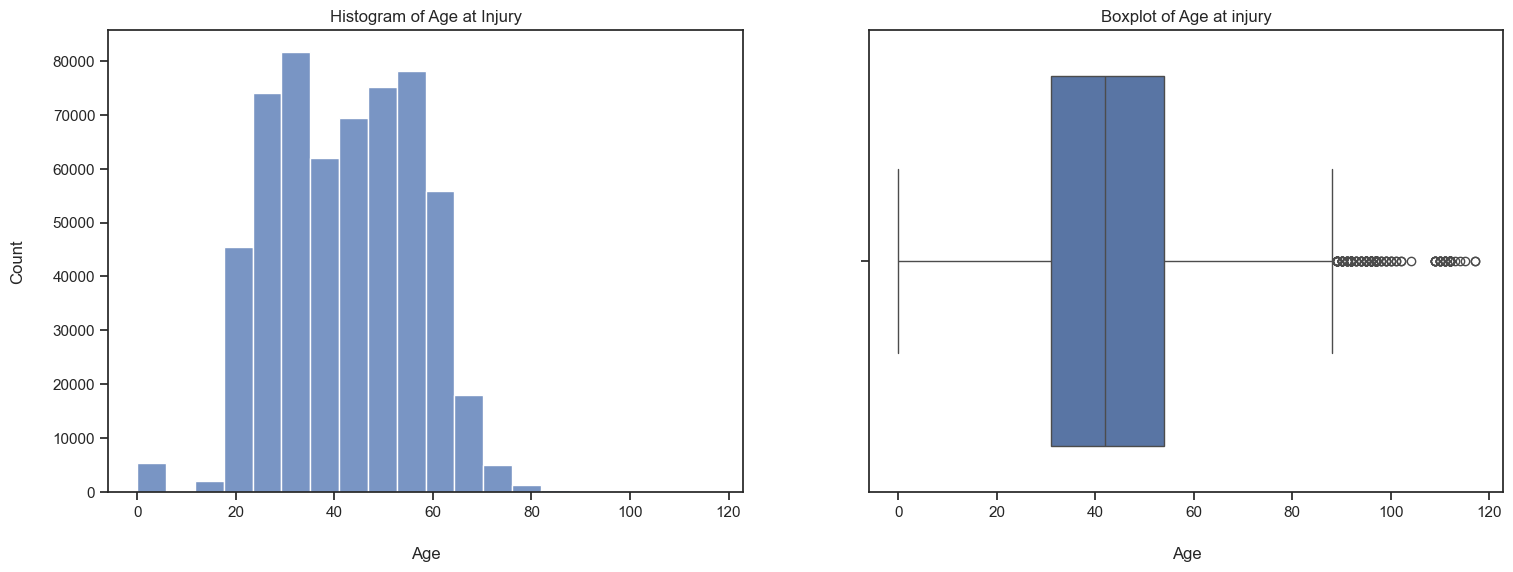

In [493]:
sns.set(style="ticks")
fig, axes = plt.subplots(1, 2,figsize=(18,6) )

sns.histplot(x=employees_train["Age at Injury"],ax=axes[0], bins=20) 
axes[0].set_title("Histogram of Age at Injury")  
axes[0].set_xlabel("Age", labelpad=20)
axes[0].set_ylabel("Count", labelpad=20)

sns.boxplot(x=employees_train["Age at Injury"], ax=axes[1])
axes[1].set_title("Boxplot of Age at injury")
axes[1].set_xlabel("Age", labelpad=20)


plt.show()

In [494]:
pd.DataFrame(employees_train["Age at Injury"].describe([0.01,0.05,.25,0.5,0.75,0.9,0.95,0.99])).T

count      mean        std  min    1%    5%   25%   50%  \
Age at Injury  574026.0  42.11427  14.256432  0.0  16.0  21.0  31.0  42.0   

                75%   90%   95%   99%    max  
Age at Injury  54.0  61.0  64.0  71.0  117.0

**`Alternative Dispute Resolution`**
* Claims subject to adjudication processes external to the Board.
* This variable shows a severe class imbalance.

In [495]:
employees_train["Alternative Dispute Resolution"].value_counts(normalize=True)*100

Alternative Dispute Resolution
N          99.544620
Y           0.454509
UNKNOWN     0.000871
Name: proportion, dtype: float64

**`Assembly Date`**

In [496]:
pd.DataFrame(employees_train["Assembly Date"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count                        mean                  min  \
Assembly Date  574026  2021-07-19 19:01:36.894000  2020-01-01 00:00:00   

                               10%                  25%                  50%  \
Assembly Date  2020-04-23 00:00:00  2020-10-27 00:00:00  2021-07-30 00:00:00   

                               75%                  90%                  95%  \
Assembly Date  2022-04-19 00:00:00  2022-09-19 00:00:00  2022-11-04 00:00:00   

                               99%                  max  
Assembly Date  2022-12-19 00:00:00  2022-12-31 00:00:00

* The claims were created between 2020 and 2022, as expected

**`Attorney/Representative`**

In [497]:
employees_train["Attorney/Representative"].value_counts(normalize=True)*100

Attorney/Representative
0    68.340284
1    31.659716
Name: proportion, dtype: Float64

**`Average Weekly Wage`**

"The wage used to calculate workers’ compensation benefits, disability benefits, or an employee’s Paid Family Leave wage replacement benefits. For workers’ compensation, the AWW is an employee’s average weekly gross earnings, including overtime and other compensation, for the previous 52 weeks. For short-term disability and Paid Family leave, the average weekly wage is defined as the average of the employee’s weekly wage for the last eight weeks worked. Blank means data was not provided." - From WCB Assembled Claims Data Dictionary

In [498]:
pd.DataFrame(employees_train["Average Weekly Wage"].describe(percentiles = [0.25, 0.5, 0.6, 0.7, 0.75, 0.99])).T

count        mean         std  min  25%  50%  60%  \
Average Weekly Wage  545375.0  491.088321  6092.91812  0.0  0.0  0.0  0.0   

                        70%    75%        99%        max  
Average Weekly Wage  660.09  841.0  2961.9652  2828079.0

1. The **median** or **second quartile** is **0**.
    * When we order all the AWW values, 50% are just **0**
2. The **third quartile** is **841**
    * When we order all the AWW values, 75% are below 841 dollars.
3. The **99% percentile** is **2961.965**
    * When we order all the AWW values, 99% are below 2961.965 dollars.
4. The **fourth quartile** is  **2 828 079**
    * This is an extreme value compared to the 99% percentile.

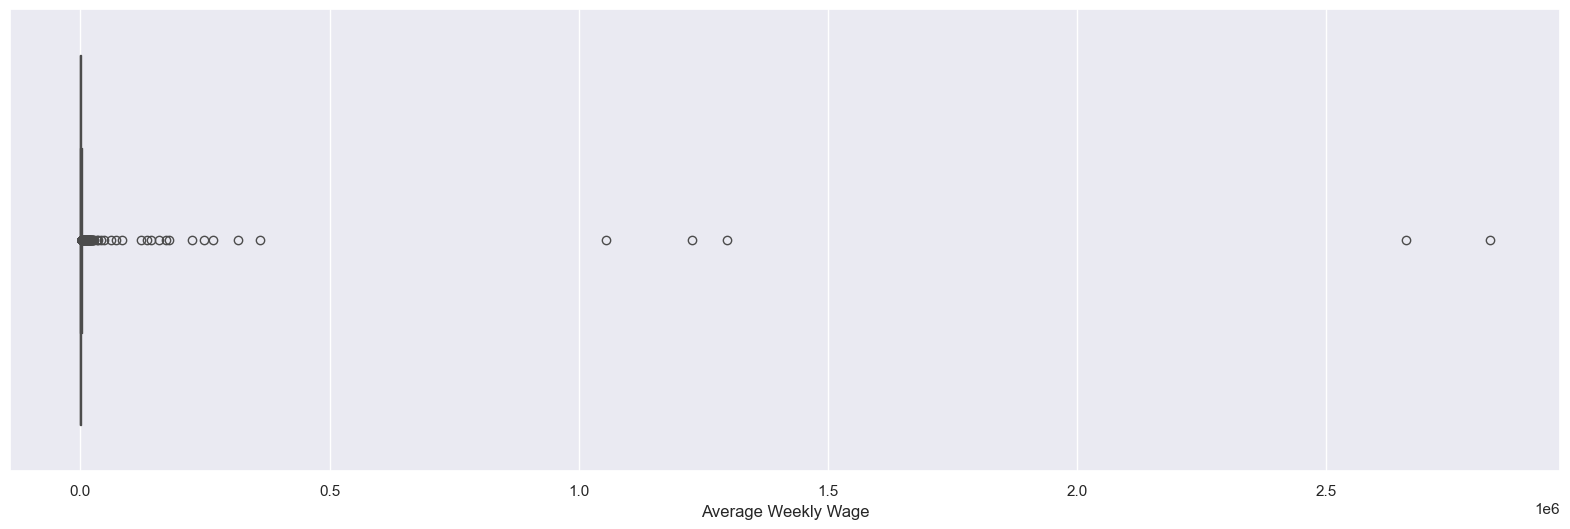

In [499]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.boxplot(data=employees_train[(employees_train["Average Weekly Wage"].notna())], x="Average Weekly Wage", ax=axes)
plt.show()

In [500]:
employees_dem_AWW_summary = pd.DataFrame({"Category" : ["AWW = 0", "AWW > 0", "AWW is NaN"], 
                                          " % ": [len(employees_train[employees_train["Average Weekly Wage"] == 0])/ len(employees_train) * 100,
                                                  len(employees_train[employees_train["Average Weekly Wage"] > 0])/len(employees_train) *100,
                                                  employees_train["Average Weekly Wage"].isna().sum()/len(employees_train)*100]})

In [501]:
employees_dem_AWW_summary

Category         % 
0     AWW = 0  58.438120
1     AWW > 0  36.570643
2  AWW is NaN   4.991237

* The fact that 58.4% of our AWW data is zero and our Q4 quartile is 2 828 079 explains why the plots have a representation hard to understand

**`Birth Year`** <BR>
* By the countplot, we can see there are a lot of claims with birth year at zero, which doesn't make any sense.
* After filtering the birth year to values above zero, we still observed some extreme values as birth year before 1920.

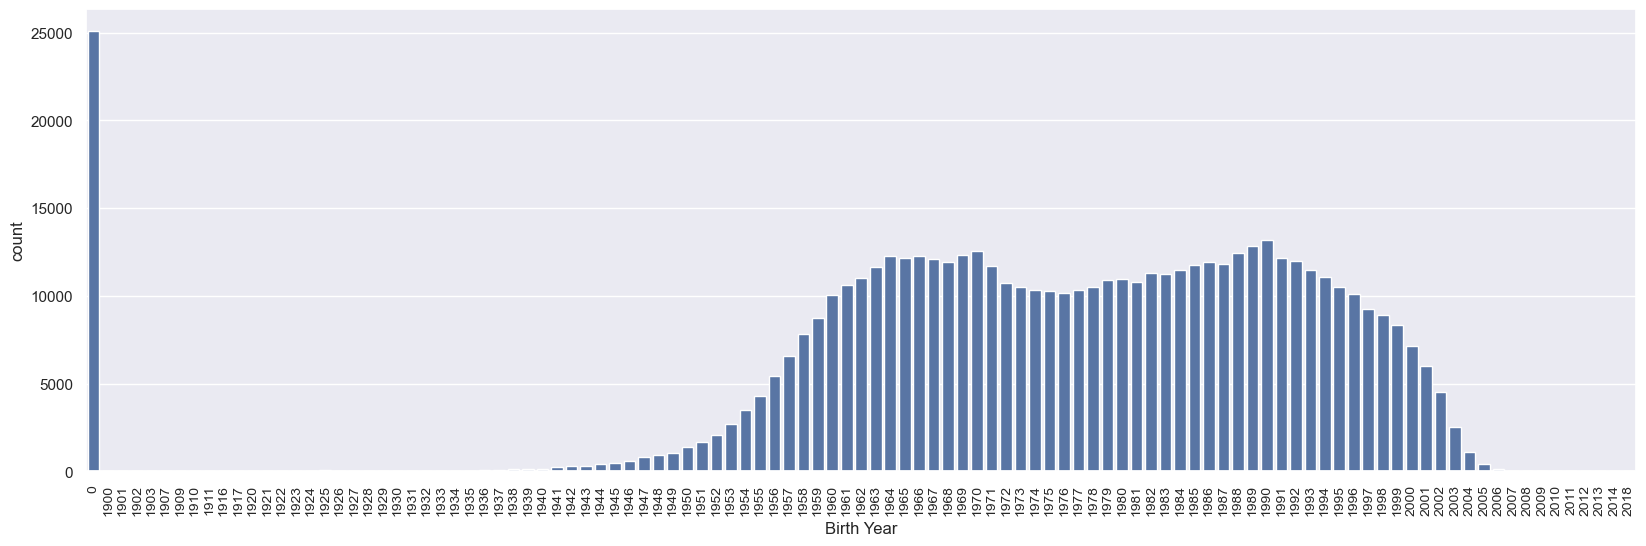

In [502]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train[employees_train["Birth Year"].notna()], x="Birth Year", ax=axes)
plt.xticks(rotation=90, fontsize="small")
plt.show()

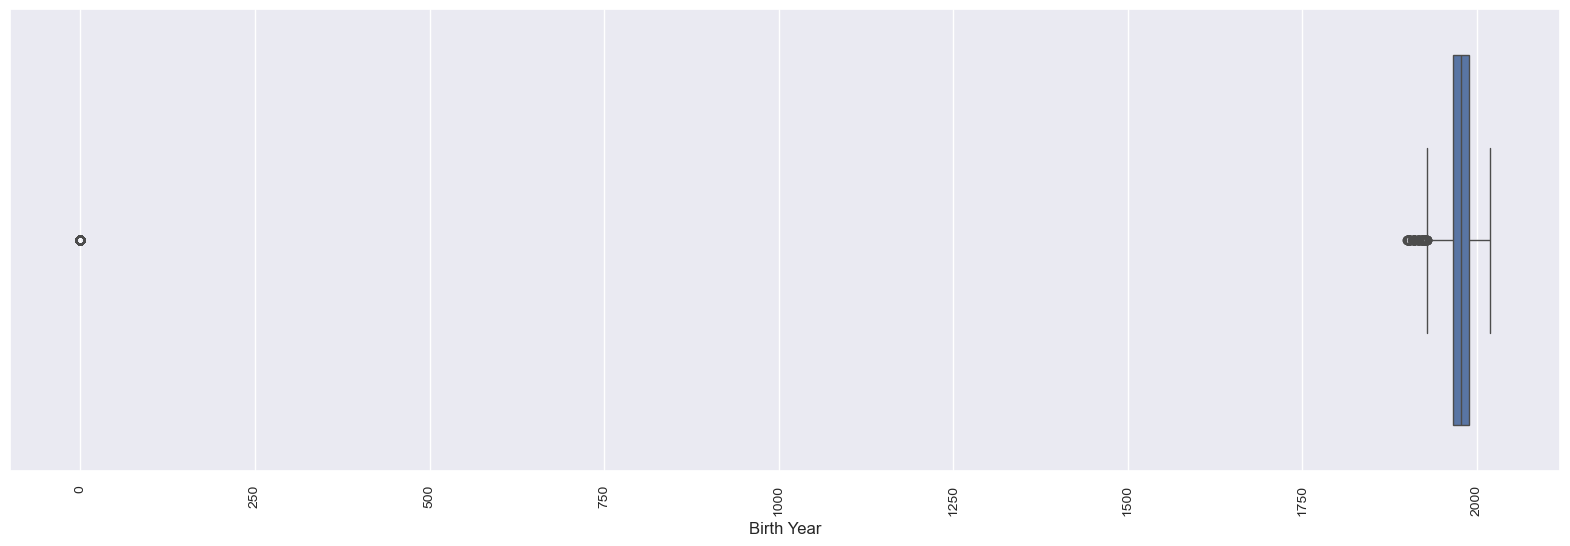

In [503]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.boxplot(data=employees_train[employees_train["Birth Year"].notna()], x="Birth Year", ax=axes)
plt.xticks(rotation=90, fontsize="small")
plt.show()

In [504]:
employees_train["Birth Year"].value_counts(normalize=True)*100

Birth Year
0       4.602457
1990    2.418579
1989    2.361143
1970    2.298751
1988    2.287007
          ...   
2013    0.000184
1907    0.000184
1911    0.000184
1921    0.000184
1909    0.000184
Name: proportion, Length: 107, dtype: Float64

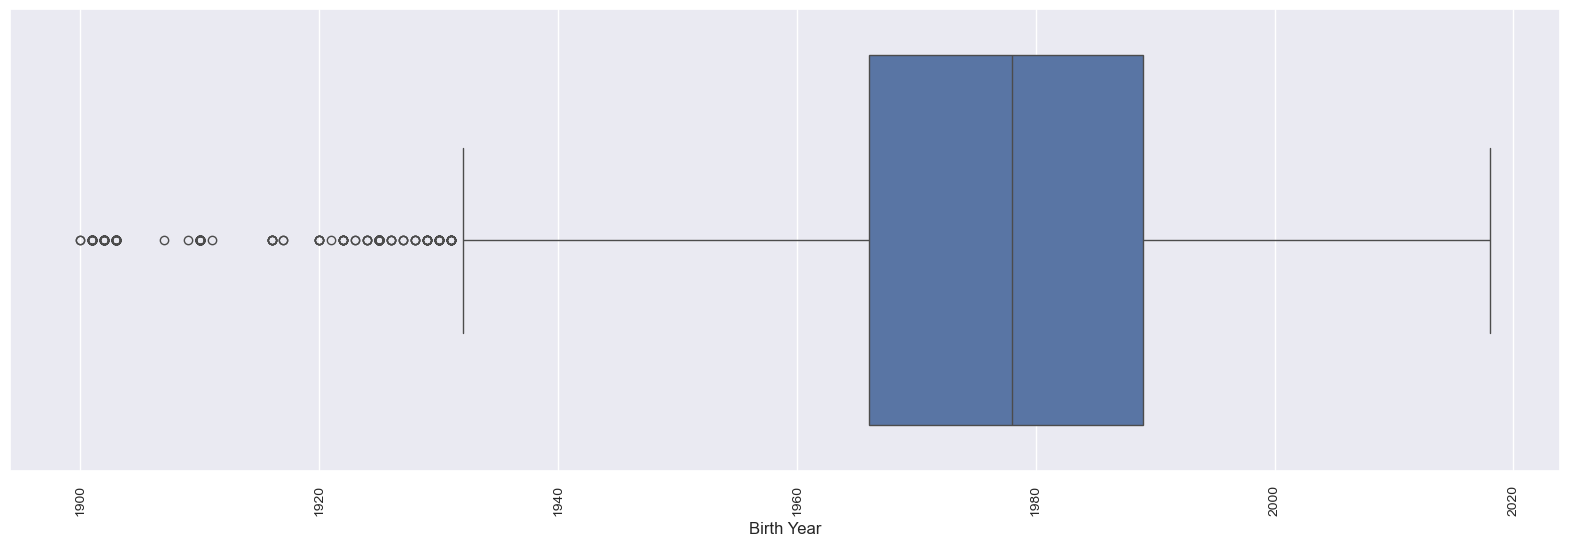

In [505]:
#Boxplot of the birth year, not considereing the values equal to 0
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.boxplot(data=employees_train[(employees_train["Birth Year"].notna()) & (employees_train["Birth Year"] > 0)], x="Birth Year", ax=axes)
plt.xticks(rotation=90, fontsize="small")
plt.show()

**`C-2 Date`**

"Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2). Blank indicates no form received."

In [506]:
pd.DataFrame(employees_train["C-2 Date"].describe(percentiles=[0.005,0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count                        mean                  min  \
C-2 Date  559466  2021-07-16 20:11:19.865000  1996-01-12 00:00:00   

                         0.5%                  10%                  25%  \
C-2 Date  2020-01-06 00:00:00  2020-04-27 00:00:00  2020-11-06 00:00:00   

                          50%                  75%                  90%  \
C-2 Date  2021-08-09 00:00:00  2022-04-26 00:00:00  2022-09-22 00:00:00   

                          95%                  99%                  max  
C-2 Date  2022-11-09 00:00:00  2022-12-22 00:00:00  2024-06-01 00:00:00

* There some claims whose C-2 Date was before 2020, which might me related to the accident date also before 2000

**`C-3 Date`**

In [507]:
pd.DataFrame(employees_train["C-3 Date"].describe(percentiles=[0.005,0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count                        mean                  min  \
C-3 Date  187245  2021-07-26 21:31:28.449000  1992-11-13 00:00:00   

                         0.5%                  10%                  25%  \
C-3 Date  2020-01-06 00:00:00  2020-05-11 00:00:00  2020-10-27 00:00:00   

                          50%                  75%                  90%  \
C-3 Date  2021-07-21 00:00:00  2022-04-20 00:00:00  2022-10-06 00:00:00   

                          95%                  99%                  max  
C-3 Date  2022-12-06 00:00:00  2023-06-07 00:00:00  2024-05-31 00:00:00

* The same situation of C-2 Date happens for C-3 Date

**`Carrier Name`**

* There are 2046 unique Carrier Name, with the `STATE INSURANCE FUND` being the most frequent, and found on 19.3% of the data.

In [508]:
#quantity of unique carrier names 
employees_train["Carrier Name"].nunique()

2046

In [509]:
employees_train["Carrier Name"].value_counts(ascending=False, normalize=True)*100

Carrier Name
STATE INSURANCE FUND            19.362189
POLICE, FIRE, SANITATION         3.763244
AMERICAN ZURICH INSURANCE CO     3.055611
CHARTER OAK FIRE INS CO          2.992199
INDEMNITY INS. OF N AMERICA      2.502674
                                  ...    
LOWES HOME CENTERS INC           0.000174
WEST BEND MUTUAL INSURANCE       0.000174
LIVINGSTON-STEUBEN-              0.000174
NEW YORK MUTUAL CASUALTY         0.000174
HERMON-DEKALB CENTRAL            0.000174
Name: proportion, Length: 2046, dtype: float64

**`Carrier Type`**
* There are 3 carrier types that appear with a very low frequency.
* Type 1A. Private is the most common.

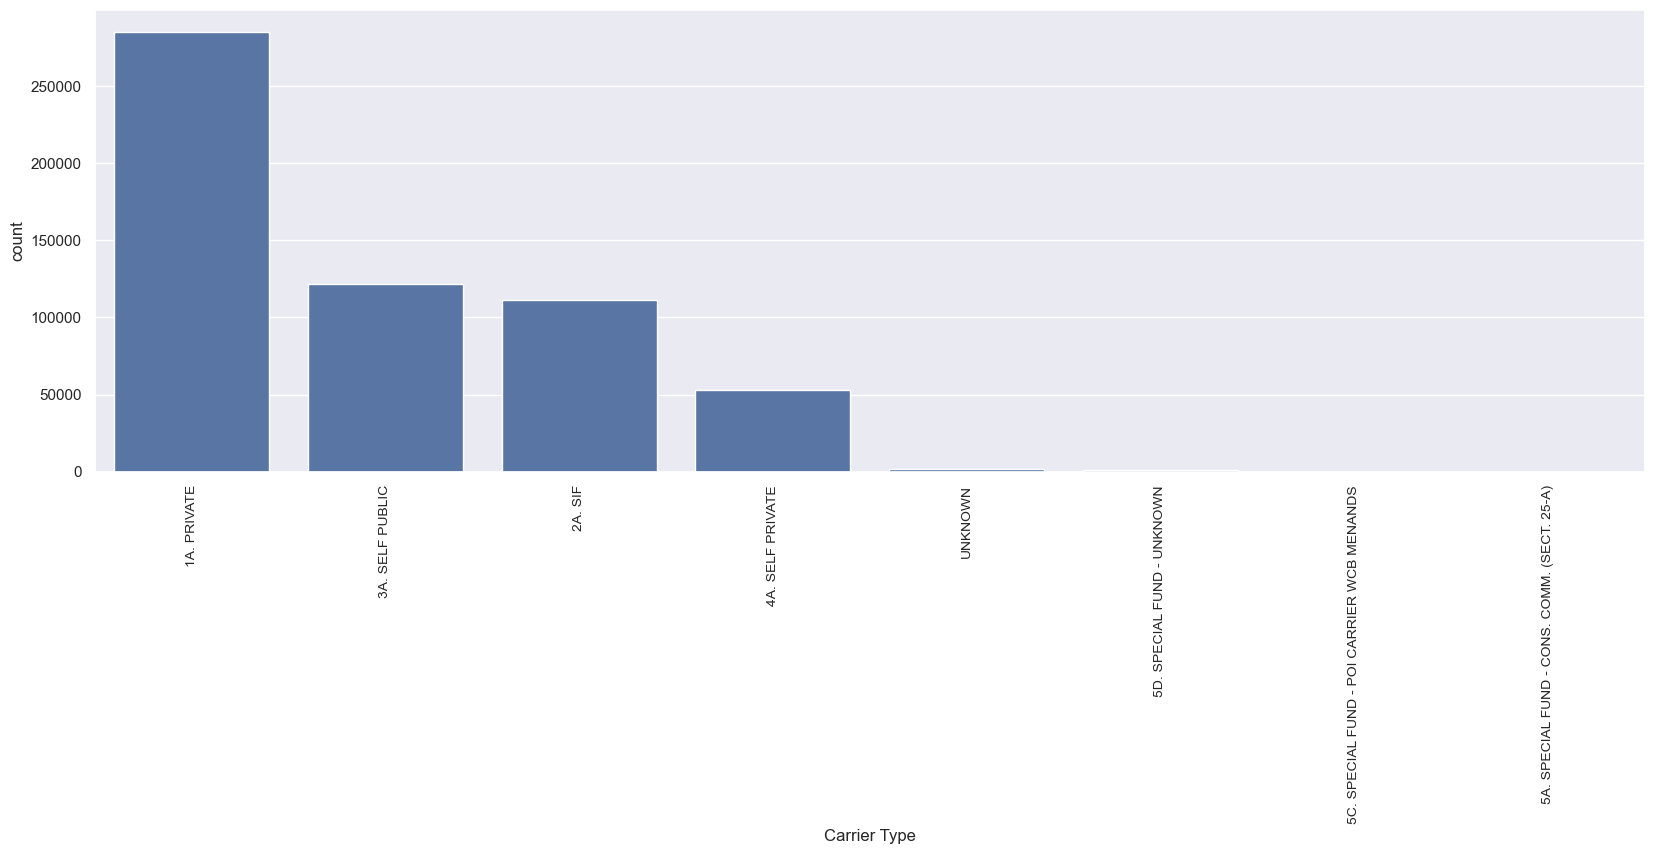

In [510]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train, x="Carrier Type", ax=axes, 
              order=employees_train["Carrier Type"].value_counts(ascending=False).index.unique())
plt.xticks(rotation=90, fontsize="small")
plt.show()

In [511]:
employees_train["Carrier Type"].value_counts(normalize=True)*100

Carrier Type
1A. PRIVATE                                    49.713428
3A. SELF PUBLIC                                21.239456
2A. SIF                                        19.362189
4A. SELF PRIVATE                                9.196099
UNKNOWN                                         0.309045
5D. SPECIAL FUND - UNKNOWN                      0.178215
5C. SPECIAL FUND - POI CARRIER WCB MENANDS      0.000871
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)     0.000697
Name: proportion, dtype: float64

* Almost 50% of the claims have private insurance

**`Claim Injury Type`**

In [512]:
employees_train["Claim Injury Type"].value_counts(normalize=True)*100

Claim Injury Type
2. NON-COMP        50.708156
4. TEMPORARY       25.871128
3. MED ONLY        12.003986
5. PPD SCH LOSS     8.410769
1. CANCELLED        2.173595
6. PPD NSL          0.733590
8. DEATH            0.081878
7. PTD              0.016898
Name: proportion, dtype: float64

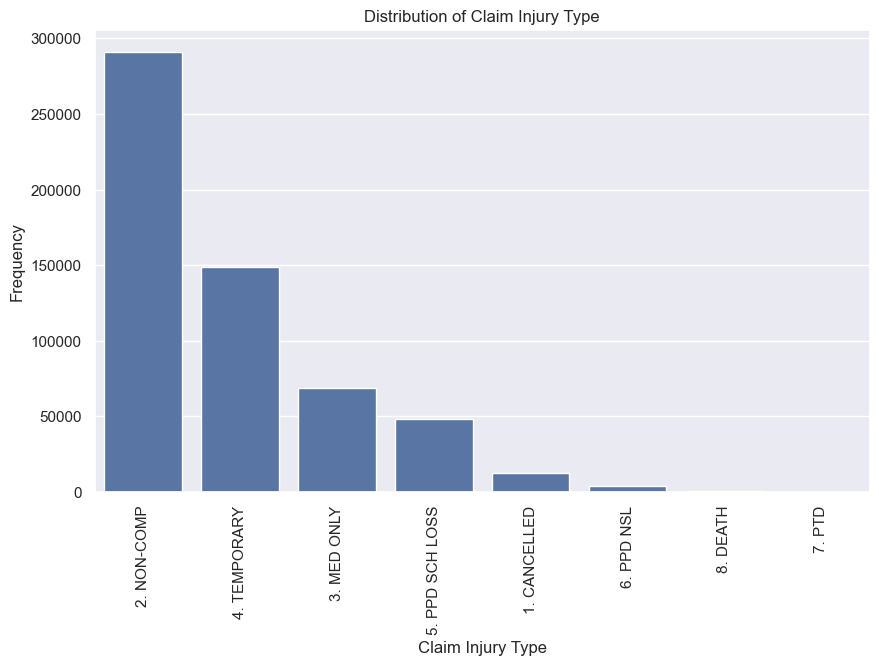

In [513]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Claim Injury Type', data=employees_train, order=employees_train['Claim Injury Type'].value_counts().index)
plt.title('Distribution of Claim Injury Type')
plt.xticks(rotation=90)
plt.xlabel('Claim Injury Type')
plt.ylabel('Frequency')
plt.show()


**`County of Injury`**

"Name of the New York County where the injury occurred."

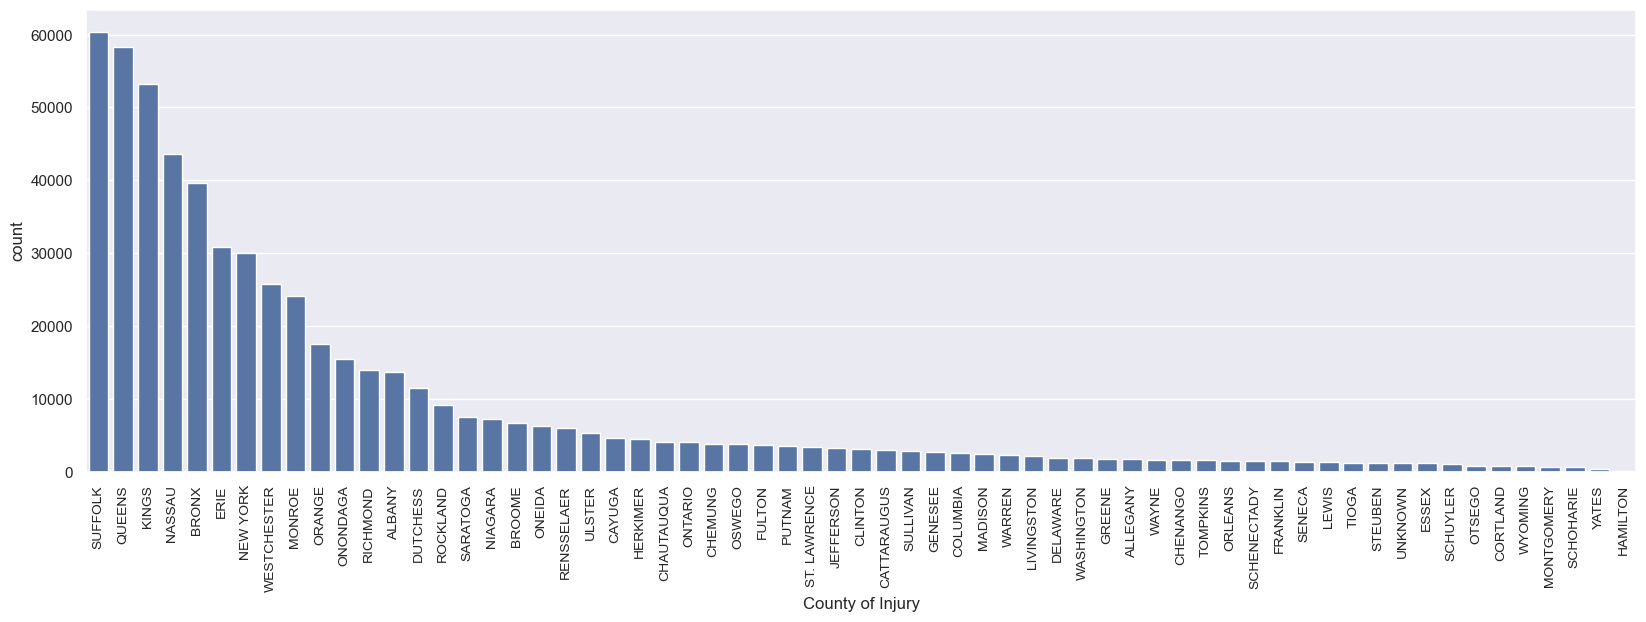

In [514]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train, x="County of Injury", ax=axes, 
              order=employees_train["County of Injury"].value_counts(ascending=False).index.unique())
plt.xticks(rotation=90, fontsize="small")
plt.show()

**`COVID-19 Indicator`**
* Although there is a class imbalance, it is not as severe as in 'Alternative Dispute Resolution' variable.

In [515]:
employees_train["COVID-19 Indicator"].value_counts(normalize=True)*100

COVID-19 Indicator
0    95.205618
1     4.794382
Name: proportion, dtype: Float64

In [516]:
employees_train[employees_train["COVID-19 Indicator"] == 1]["Claim Injury Type"].value_counts(normalize=True)*100

Claim Injury Type
2. NON-COMP        67.661059
4. TEMPORARY       21.975946
3. MED ONLY         8.113804
1. CANCELLED        1.420733
8. DEATH            0.603176
6. PPD NSL          0.116275
5. PPD SCH LOSS     0.061771
7. PTD              0.047237
Name: proportion, dtype: float64

**`District Name`**
* New York City is clearly much more frequent than the others.

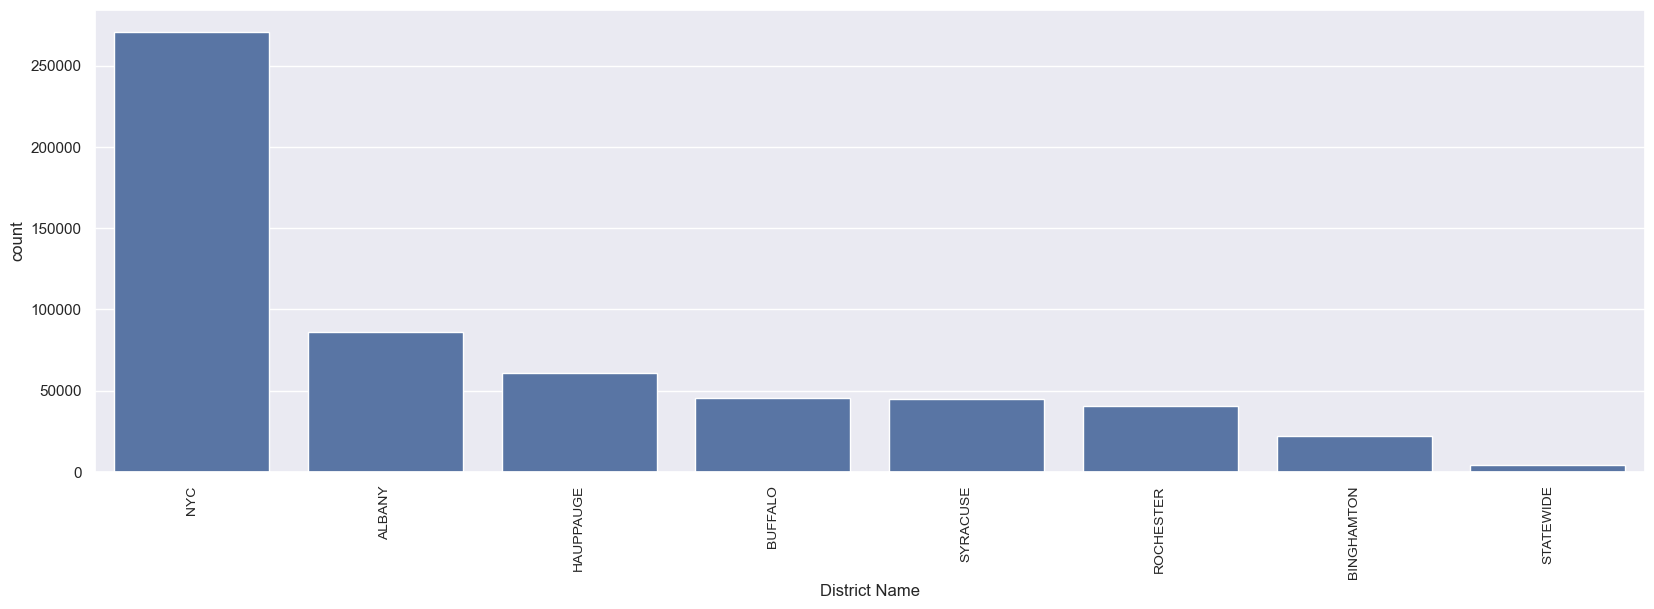

In [517]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train, x="District Name", ax=axes, 
              order=employees_train["District Name"].value_counts(ascending=False).index.unique())
plt.xticks(rotation=90, fontsize="small")
plt.show()

In [518]:
employees_train["District Name"].value_counts(normalize=True)*100

District Name
NYC           47.171905
ALBANY        15.011689
HAUPPAUGE     10.545864
BUFFALO        7.944762
SYRACUSE       7.777696
ROCHESTER      7.046545
BINGHAMTON     3.808887
STATEWIDE      0.692652
Name: proportion, dtype: float64

**`First Hearing Date`**

"Date the first hearing was held on a claim at a WCB hearing
location. A blank date means the claim has not yet had a hearing held"

In [519]:
pd.DataFrame(employees_train["First Hearing Date"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count                        mean                  min  \
First Hearing Date  150798  2022-03-19 05:07:38.218000  2020-01-30 00:00:00   

                                    10%                  25%  \
First Hearing Date  2020-11-16 00:00:00  2021-06-01 00:00:00   

                                    50%                  75%  \
First Hearing Date  2022-03-09 00:00:00  2023-01-11 00:00:00   

                                    90%                  95%  \
First Hearing Date  2023-07-13 00:00:00  2023-11-10 00:00:00   

                                    99%                  max  
First Hearing Date  2024-04-16 00:00:00  2024-06-07 00:00:00

**`Gender`**
* Considering the two world-known Genders, feminine and masculine, we can consider is is more and less balanced.
* Regarding the 'X' we can see it is very rare on our dataset, and the 'U' must mean unknown.

In [520]:
employees_train["Gender"].value_counts(normalize=True)*100

Gender
M          58.397703
F          40.773589
UNKNOWN     0.820695
X           0.008014
Name: proportion, dtype: float64

**`IME-4 Count`**

Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.

In [521]:
pd.DataFrame(employees_train["IME-4 Count"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])).T

count      mean       std  min  10%  25%  50%  75%  90%  95%  \
IME-4 Count  132803.0  3.207337  2.832303  1.0  1.0  1.0  2.0  4.0  7.0  9.0   

              99%   max  
IME-4 Count  14.0  73.0

* 99% of claims have 9 forms or fewer. Only 1% of claims exceed 9 forms, indicating that extremely high values are rare, probably associated with more complex claims.
* Claims that have more than 7 forms (in the 95th percentile or above) are relatively rare, but they seem from complex claims that probably require reports to make decisions.


In [522]:
employees_train["IME-4 Count"].value_counts(dropna=False, normalize=True).head(10)*100

IME-4 Count
<NA>    76.864637
1        6.987837
2        6.010878
3        2.811022
4        2.400762
5        1.337918
6        1.119636
7        0.668611
8        0.549801
9        0.333609
Name: proportion, dtype: Float64

* It's possible that claims with multiple IME-4 forms, there's a higher chance of claim resolution times being longer, since it may signal of a longer claim investigation or more complicated medical history of the worker.

**`Industry Code`/`Industry Code Description`**

In [523]:
len(employees_train["Industry Code"].unique()), len(employees_train["Industry Code Description"].unique())

(25, 21)

There are 25 different `Industry Code` for 21 different `Industry Code Description`, which means there are codes for the same descriptions, such as: <br>
    <br>* `MANUFACTURING`: 31,32,33
    <br>* `RETAIL TRADE`: 44,45
    <br>* `TRANSPORTATION AND WAREHOUSE`: 48, 49

In [524]:
employees_train[["Industry Code", "Industry Code Description"]].dropna().groupby("Industry Code Description").filter(lambda x: x["Industry Code"].nunique() > 1).drop_duplicates().sort_values(by="Industry Code Description")

Industry Code       Industry Code Description
Claim Identifier                                              
5394012                   31.0                   MANUFACTURING
5393066                   33.0                   MANUFACTURING
5393828                   32.0                   MANUFACTURING
5393875                   44.0                    RETAIL TRADE
5394026                   45.0                    RETAIL TRADE
5393811                   48.0  TRANSPORTATION AND WAREHOUSING
5393857                   49.0  TRANSPORTATION AND WAREHOUSING

In [525]:
def get_code_description_combinations(df, col_code, col_dsc):

    df[col_code] = df[col_code].astype("Int64")
    df[col_code] = df[col_code].astype("category")
    df[col_dsc] = df[col_dsc].astype("string")
    
    unique_comb = df[[col_code, col_dsc]].drop_duplicates()
    list_unique_comb = list(unique_comb.itertuples(index=False, name=None))
    dict_unique_comb = {}

    for i in sorted(list_unique_comb):
        dict_unique_comb[i[0]] = i[1]

    numeric_keys = [k for k in dict_unique_comb.keys() if not (k != k)]  
    nan_keys = [k for k in dict_unique_comb.keys() if k != k]
    sorted_keys = sorted(numeric_keys) + nan_keys
    
    result = {}
    for i in sorted_keys:
        result[i] = dict_unique_comb[i]
    df[col_code] = df[col_code].astype("object")
    df[col_dsc] = df[col_dsc].astype("object")
    return result

In [526]:
unique_comb_industry = get_code_description_combinations(employees_train, "Industry Code", "Industry Code Description")

In [527]:
unique_comb_industry

{11: 'AGRICULTURE, FORESTRY, FISHING AND HUNTING',
 21: 'MINING',
 22: 'UTILITIES',
 23: 'CONSTRUCTION',
 31: 'MANUFACTURING',
 32: 'MANUFACTURING',
 33: 'MANUFACTURING',
 42: 'WHOLESALE TRADE',
 44: 'RETAIL TRADE',
 45: 'RETAIL TRADE',
 48: 'TRANSPORTATION AND WAREHOUSING',
 49: 'TRANSPORTATION AND WAREHOUSING',
 51: 'INFORMATION',
 52: 'FINANCE AND INSURANCE',
 53: 'REAL ESTATE AND RENTAL AND LEASING',
 54: 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
 55: 'MANAGEMENT OF COMPANIES AND ENTERPRISES',
 56: 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
 61: 'EDUCATIONAL SERVICES',
 62: 'HEALTH CARE AND SOCIAL ASSISTANCE',
 71: 'ARTS, ENTERTAINMENT, AND RECREATION',
 72: 'ACCOMMODATION AND FOOD SERVICES',
 81: 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
 92: 'PUBLIC ADMINISTRATION',
 nan: <NA>}

**`Medical Fee Region`**

* I. Region 1: Rural areas outside of Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton.
* II. Region 2: Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton.
* III. Region 3: Westchester, Rockland & most of Suffolk, Orange, & Putnam.
* IV. Region 4: New York City, Nassau, and Western Suffolk.
* UK=Unknown

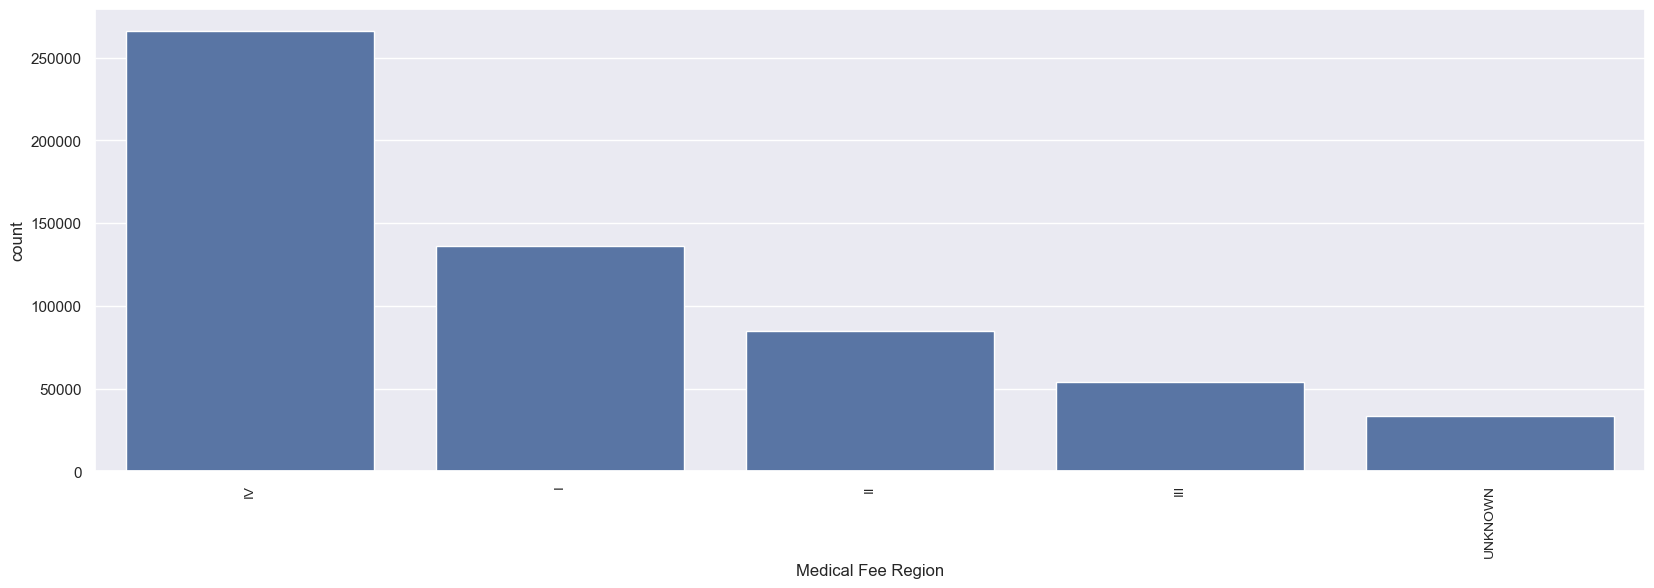

In [528]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train, x="Medical Fee Region", ax=axes, 
              order=employees_train["Medical Fee Region"].value_counts(ascending=False).index.unique())
plt.xticks(rotation=90, fontsize="small")
plt.show()

In [529]:
employees_train["Medical Fee Region"].value_counts(normalize=True)*100

Medical Fee Region
IV         46.336054
I          23.672273
II         14.813441
III         9.346963
UNKNOWN     5.831269
Name: proportion, dtype: float64

**`WCIO Cause of Injury Code`/`WCIO Cause of Injury Description`**

In [530]:
len(employees_train["WCIO Cause of Injury Code"].unique()), len(employees_train["WCIO Cause of Injury Description"].unique())

(78, 75)

* There are 78 different codes for 75 different descriptions, which means there are codes for the same descriptions, such as:
    <br>`REPETITIVE MOTION`: 94, 97
    <br>`OBJECT BEING LIFTED OR HANDLED`: 17, 66, 79

In [531]:
employees_train[["WCIO Cause of Injury Code", "WCIO Cause of Injury Description"]].dropna().groupby("WCIO Cause of Injury Description").filter(lambda x: x["WCIO Cause of Injury Code"].nunique() > 1).drop_duplicates()

WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                           
5393091                               97.0                REPETITIVE MOTION
5393889                               79.0   OBJECT BEING LIFTED OR HANDLED
5393948                               17.0   OBJECT BEING LIFTED OR HANDLED
5393880                               66.0   OBJECT BEING LIFTED OR HANDLED
5398012                               94.0                REPETITIVE MOTION

In [532]:
unique_comb_cause_injury = get_code_description_combinations(employees_train, "WCIO Cause of Injury Code", "WCIO Cause of Injury Description")

In [533]:
unique_comb_cause_injury

{1: 'CHEMICALS',
 2: 'HOT OBJECTS OR SUBSTANCES',
 3: 'TEMPERATURE EXTREMES',
 4: 'FIRE OR FLAME',
 5: 'STEAM OR HOT FLUIDS',
 6: 'DUST, GASES, FUMES OR VAPORS',
 7: 'WELDING OPERATION',
 8: 'RADIATION',
 9: 'CONTACT WITH, NOC',
 10: 'MACHINE OR MACHINERY',
 11: 'COLD OBJECTS OR SUBSTANCES',
 12: 'OBJECT HANDLED',
 13: 'CAUGHT IN, UNDER OR BETWEEN, NOC',
 14: 'ABNORMAL AIR PRESSURE',
 15: 'BROKEN GLASS',
 16: 'HAND TOOL, UTENSIL; NOT POWERED',
 17: 'OBJECT BEING LIFTED OR HANDLED',
 18: 'POWERED HAND TOOL, APPLIANCE',
 19: 'CUT, PUNCTURE, SCRAPE, NOC',
 20: 'COLLAPSING MATERIALS (SLIDES OF EARTH)',
 25: 'FROM DIFFERENT LEVEL (ELEVATION)',
 26: 'FROM LADDER OR SCAFFOLDING',
 27: 'FROM LIQUID OR GREASE SPILLS',
 28: 'INTO OPENINGS',
 29: 'ON SAME LEVEL',
 30: 'SLIP, OR TRIP, DID NOT FALL',
 31: 'FALL, SLIP OR TRIP, NOC',
 32: 'ON ICE OR SNOW',
 33: 'ON STAIRS',
 40: 'CRASH OF WATER VEHICLE',
 41: 'CRASH OF RAIL VEHICLE',
 45: 'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE',
 46: 'COLLISION

**`WCIO Nature of Injury Code`/`WCIO Nature of Injury Description`**

In [534]:
len(employees_train["WCIO Nature of Injury Code"].unique()), len(employees_train["WCIO Nature of Injury Description"].unique())

(57, 57)

In [535]:
unique_comb_nature_injury = get_code_description_combinations(employees_train, "WCIO Nature of Injury Code", "WCIO Nature of Injury Description")
unique_comb_nature_injury

{1: 'NO PHYSICAL INJURY',
 2: 'AMPUTATION',
 3: 'ANGINA PECTORIS',
 4: 'BURN',
 7: 'CONCUSSION',
 10: 'CONTUSION',
 13: 'CRUSHING',
 16: 'DISLOCATION',
 19: 'ELECTRIC SHOCK',
 22: 'ENUCLEATION',
 25: 'FOREIGN BODY',
 28: 'FRACTURE',
 30: 'FREEZING',
 31: 'HEARING LOSS OR IMPAIRMENT',
 32: 'HEAT PROSTRATION',
 34: 'HERNIA',
 36: 'INFECTION',
 37: 'INFLAMMATION',
 38: 'ADVERSE REACTION TO A VACCINATION OR INOCULATION',
 40: 'LACERATION',
 41: 'MYOCARDIAL INFARCTION',
 42: 'POISONING - GENERAL (NOT OD OR CUMULATIVE',
 43: 'PUNCTURE',
 46: 'RUPTURE',
 47: 'SEVERANCE',
 49: 'SPRAIN OR TEAR',
 52: 'STRAIN OR TEAR',
 53: 'SYNCOPE',
 54: 'ASPHYXIATION',
 55: 'VASCULAR',
 58: 'VISION LOSS',
 59: 'ALL OTHER SPECIFIC INJURIES, NOC',
 60: 'DUST DISEASE, NOC',
 61: 'ASBESTOSIS',
 62: 'BLACK LUNG',
 63: 'BYSSINOSIS',
 64: 'SILICOSIS',
 65: 'RESPIRATORY DISORDERS',
 66: 'POISONING - CHEMICAL, (OTHER THAN METALS)',
 67: 'POISONING - METAL',
 68: 'DERMATITIS',
 69: 'MENTAL DISORDER',
 70: 'RADIATION',


**`WCIO Part Of Body Code`/`WCIO Part Of Body Description`**

In [536]:
employees_train["WCIO Part Of Body Code"] = employees_train["WCIO Part Of Body Code"].astype("object")

WCIO Part of Body Injury / WCIO Part of Body Description- Test Data

In [537]:
employees_test["WCIO Part Of Body Code"] = employees_test["WCIO Part Of Body Code"].astype("object")

In [538]:
len(employees_train["WCIO Part Of Body Code"].unique()), len(employees_train["WCIO Part Of Body Description"].unique())

(58, 55)

There are 58 different `WCIO Part Of Body Code` for 55 different `WCIO Part Of Body Description`, which means there are codes for the same descriptions, such as: <br>
    <br>* `DISC`: 22, 43
    <br>* `SOFT TISSUE`: 18, 25
    <br>* `SPINAL CORD`: 23, 47

In [539]:
employees_train[["WCIO Part Of Body Code", "WCIO Part Of Body Description"]].dropna().groupby("WCIO Part Of Body Description").filter(lambda x: x["WCIO Part Of Body Code"].nunique() > 1).drop_duplicates().sort_values(by="WCIO Part Of Body Description")

WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                     
5393781                            43.0                          DISC
5394136                            22.0                          DISC
5393980                            18.0                   SOFT TISSUE
5394179                            25.0                   SOFT TISSUE
5393898                            23.0                   SPINAL CORD
5397921                            47.0                   SPINAL CORD

In [540]:
unique_comb_body_part = get_code_description_combinations(employees_train, "WCIO Part Of Body Code", "WCIO Part Of Body Description")
unique_comb_body_part

{-9: 'MULTIPLE',
 10: 'MULTIPLE HEAD INJURY',
 11: 'SKULL',
 12: 'BRAIN',
 13: 'EAR(S)',
 14: 'EYE(S)',
 15: 'NOSE',
 16: 'TEETH',
 17: 'MOUTH',
 18: 'SOFT TISSUE',
 19: 'FACIAL BONES',
 20: 'MULTIPLE NECK INJURY',
 21: 'VERTEBRAE',
 22: 'DISC',
 23: 'SPINAL CORD',
 24: 'LARYNX',
 25: 'SOFT TISSUE',
 26: 'TRACHEA',
 30: 'MULTIPLE UPPER EXTREMITIES',
 31: 'UPPER ARM',
 32: 'ELBOW',
 33: 'LOWER ARM',
 34: 'WRIST',
 35: 'HAND',
 36: 'FINGER(S)',
 37: 'THUMB',
 38: 'SHOULDER(S)',
 39: 'WRIST (S) & HAND(S)',
 40: 'MULTIPLE TRUNK',
 41: 'UPPER BACK AREA',
 42: 'LOWER BACK AREA',
 43: 'DISC',
 44: 'CHEST',
 45: 'SACRUM AND COCCYX',
 46: 'PELVIS',
 47: 'SPINAL CORD',
 48: 'INTERNAL ORGANS',
 49: 'HEART',
 50: 'MULTIPLE LOWER EXTREMITIES',
 51: 'HIP',
 52: 'UPPER LEG',
 53: 'KNEE',
 54: 'LOWER LEG',
 55: 'ANKLE',
 56: 'FOOT',
 57: 'TOES',
 58: 'GREAT TOE',
 60: 'LUNGS',
 61: 'ABDOMEN INCLUDING GROIN',
 62: 'BUTTOCKS',
 63: 'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA',
 64: 'ARTIFICIAL APPLIANCE',
 

**`Zip Code`**

In [541]:
employees_train["Zip Code"].value_counts(normalize=True)*100

Zip Code
11236    0.605439
10940    0.544749
11717    0.514679
11434    0.505877
11706    0.500193
           ...   
L7L7G    0.000183
48192    0.000183
11469    0.000183
11926    0.000183
07122    0.000183
Name: proportion, Length: 10060, dtype: Float64

**`Number of Dependents`**
* The values in this variable seem to be equally distributed, with each class around 14%.

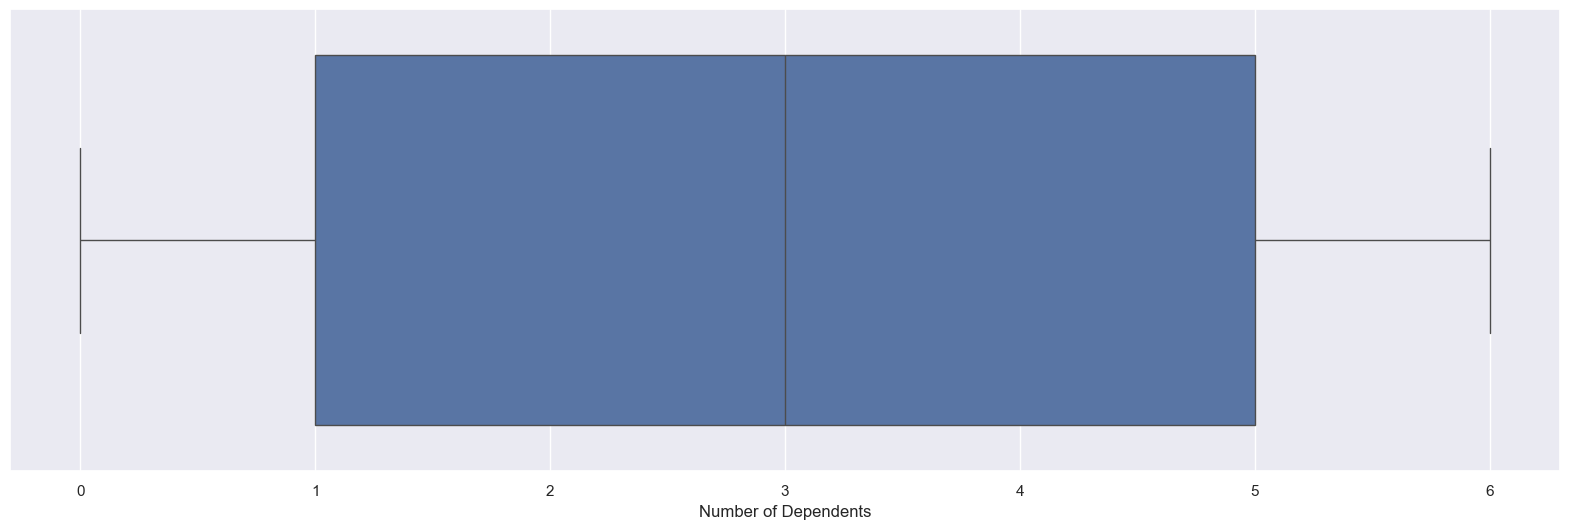

In [542]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.boxplot(data=employees_train[(employees_train["Number of Dependents"].notna())], x="Number of Dependents", ax=axes)
plt.show()

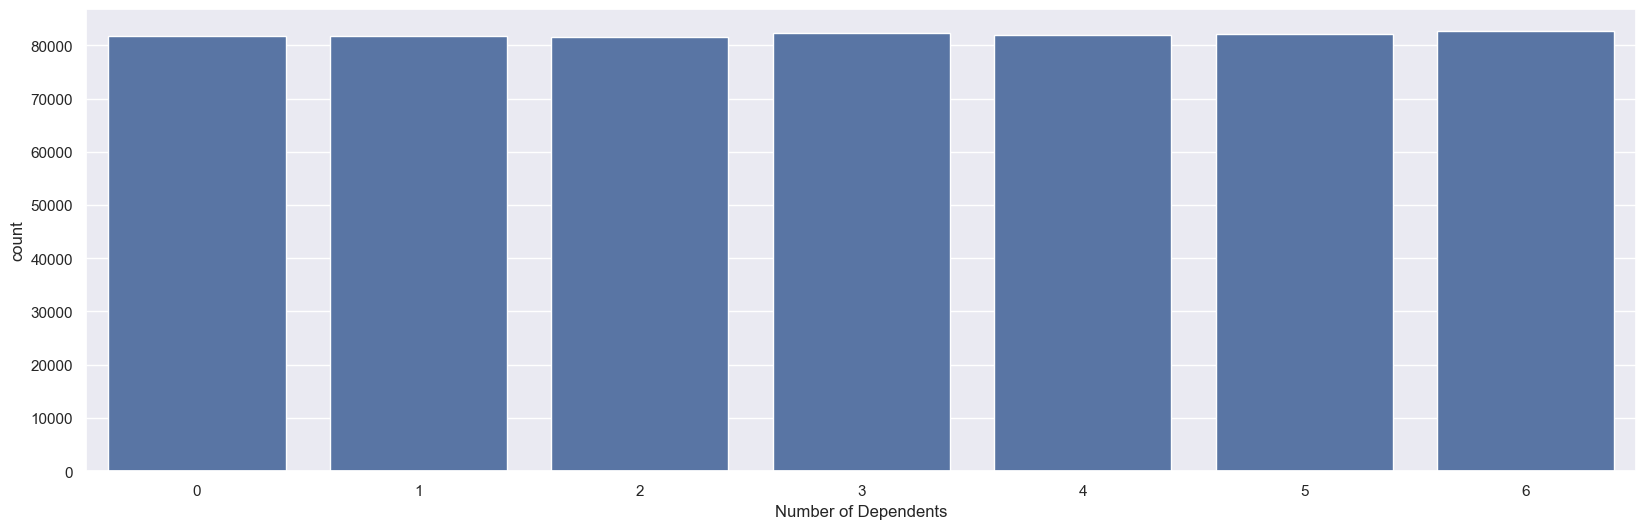

In [543]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=employees_train, x="Number of Dependents", ax=axes)
plt.show()

In [544]:
employees_train["Number of Dependents"].value_counts(normalize=True)*100

Number of Dependents
6    14.398825
3    14.337155
5    14.298133
4    14.268343
1    14.254232
0    14.226708
2    14.216603
Name: proportion, dtype: Float64

### Multivariate Analysis

In [545]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [546]:
ar_columns = ['Alternative Dispute Resolution',
            'Attorney/Representative',
            'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
            'District Name', 'Gender', 
            'Industry Code', 'Industry Code Description', 'Medical Fee Region',
            'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
            'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
            'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code', "Claim Injury Type" ,'Agreement Reached'
            ]

In [547]:
results_columns_ar = pd.DataFrame(index=ar_columns, columns=ar_columns)

for var1 in ar_columns:
    for var2 in ar_columns:
        if var1 != var2:
            results_columns_ar.loc[var1, var2] = cramers_v(employees_train[var1], employees_train[var2])
        else:
            results_columns_ar.loc[var1, var2] = 1  #perfect association with itself


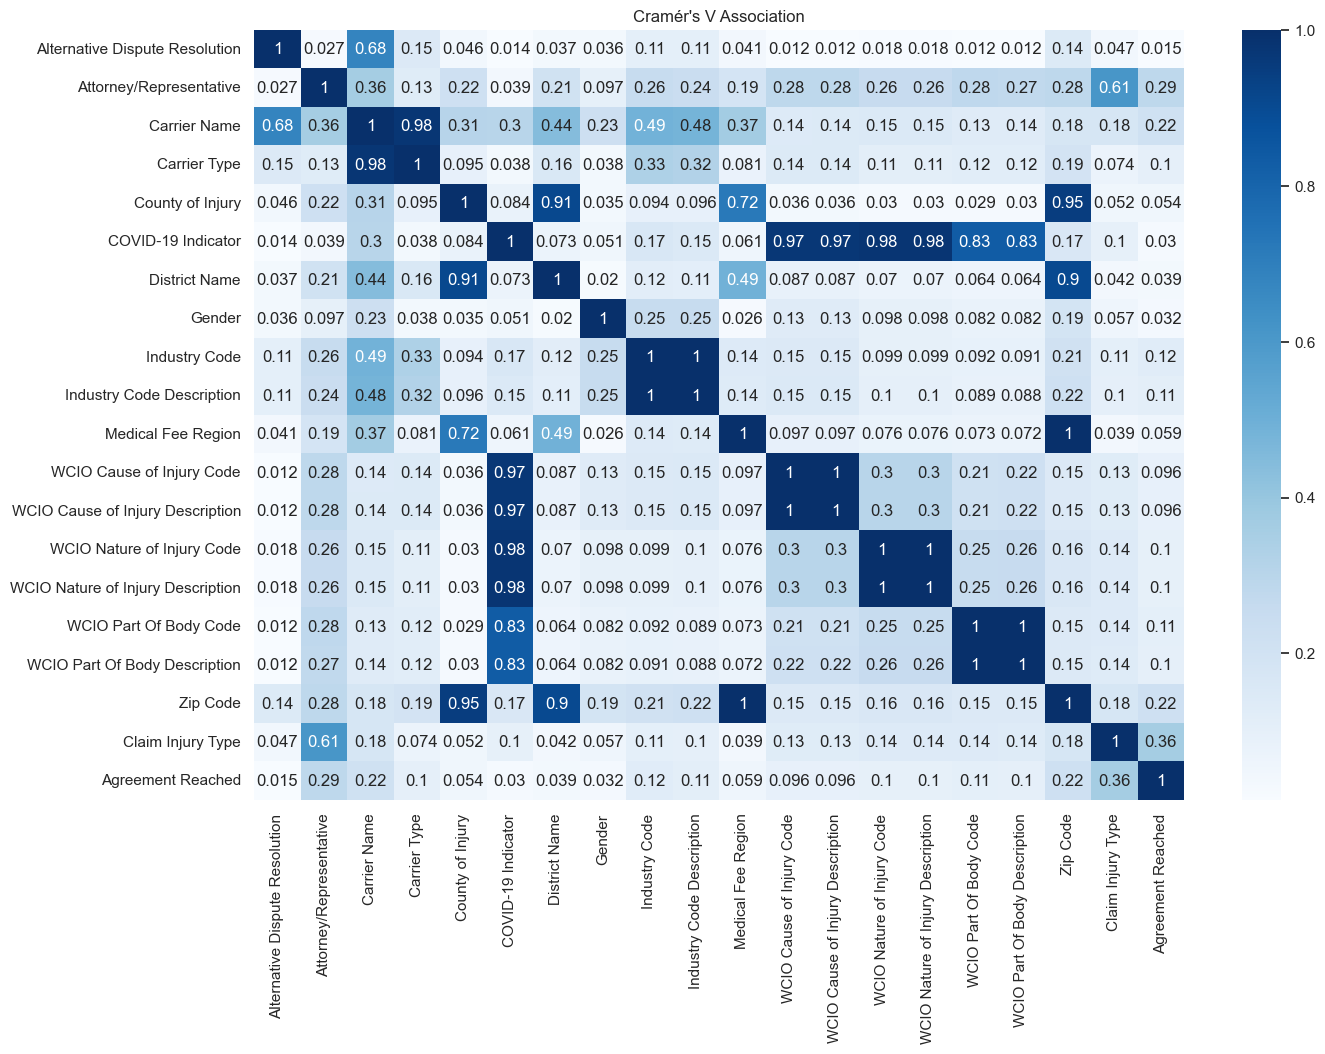

In [548]:
results_columns_ar = results_columns_ar.astype(float)
plt.figure(figsize=(15, 10))
sns.heatmap(results_columns_ar, annot=True, cmap="Blues", cbar=True)
plt.title("Cramér's V Association")
plt.show()

**`Age at Injury VS Average Weekly Wage`**

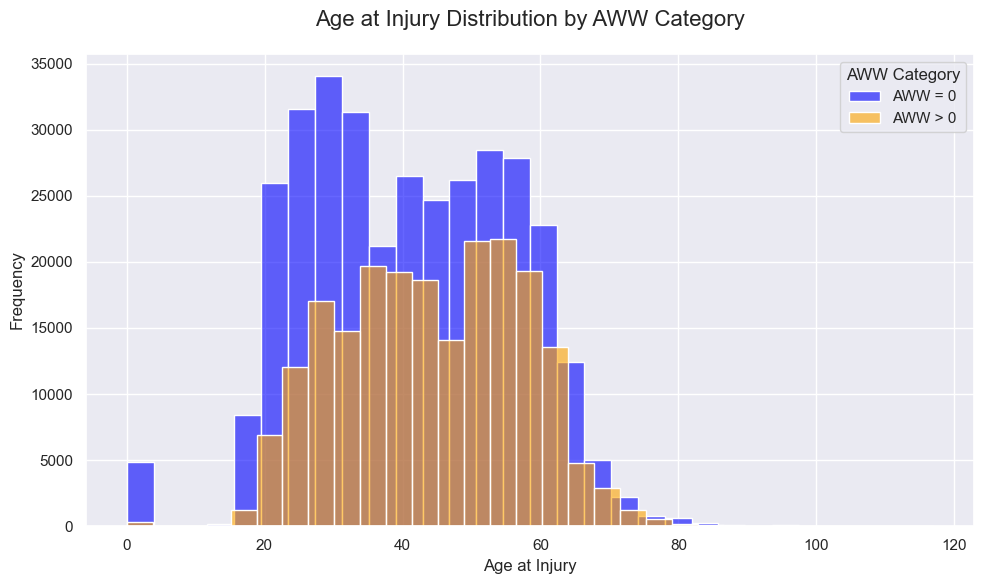

In [549]:
aww_zero = employees_train[employees_train['Average Weekly Wage'] == 0]['Age at Injury']
aww_positive = employees_train[employees_train['Average Weekly Wage'] > 0]['Age at Injury']

plt.figure(figsize=(10, 6))
sns.histplot(aww_zero, color='blue', label='AWW = 0',bins=30, alpha=0.6)
sns.histplot(aww_positive, color='orange', label='AWW > 0', bins=30, alpha=0.6)

plt.title('Age at Injury Distribution by AWW Category', fontsize=16, pad=20)
plt.xlabel('Age at Injury', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='AWW Category')

plt.tight_layout()
plt.show()

**`GENDER VS PART OF BODY`**

Wwe want to check what is the most common WCIO PART OF THE BODY DESCRIPTION for each gender. This could be usefull to understand how certain genders are predisposed to specific types of injuries, which can help the model better differentiate and predict outcomes for each group.

In [550]:
#Getting the actual values for the most common WCIO Part Of Body Description for each gender
def most_common_body_part(df, body_part_col, gender_col):
    
    # Grouping by gender and body part, then count the occurrences
    body_part_counts = df.groupby([gender_col, body_part_col]).size().reset_index(name='counts')
    
    # Finding the most common body part for each gender
    most_common_body_part = body_part_counts.loc[body_part_counts.groupby(gender_col)['counts'].idxmax()]
    
    for index, row in most_common_body_part.iterrows():
        print(f"Most common body part for \033[1;36m{row[gender_col]}\033[0m: \033[1;36m{row[body_part_col]}\033[0m (Count: {row['counts']})")

most_common_body_part(employees_train, "WCIO Part Of Body Description", "Gender")


Most common body part for F: KNEE (Count: 20490)
Most common body part for M: LOWER BACK AREA (Count: 32322)
Most common body part for UNKNOWN: LOWER BACK AREA (Count: 364)
Most common body part for X: MULTIPLE (Count: 33)


**`County of Injury VS District Name`**

County of Injury segments very well district name if we were to fill the missing values on District Name. The other way around, district name is not as good to segment county of injury, since it has much less variables, but in overall it seems a good option for the imputation.<br>
However, by taking into account the cramér's score, Zip Code is more correlated with County of Injury than the district name.

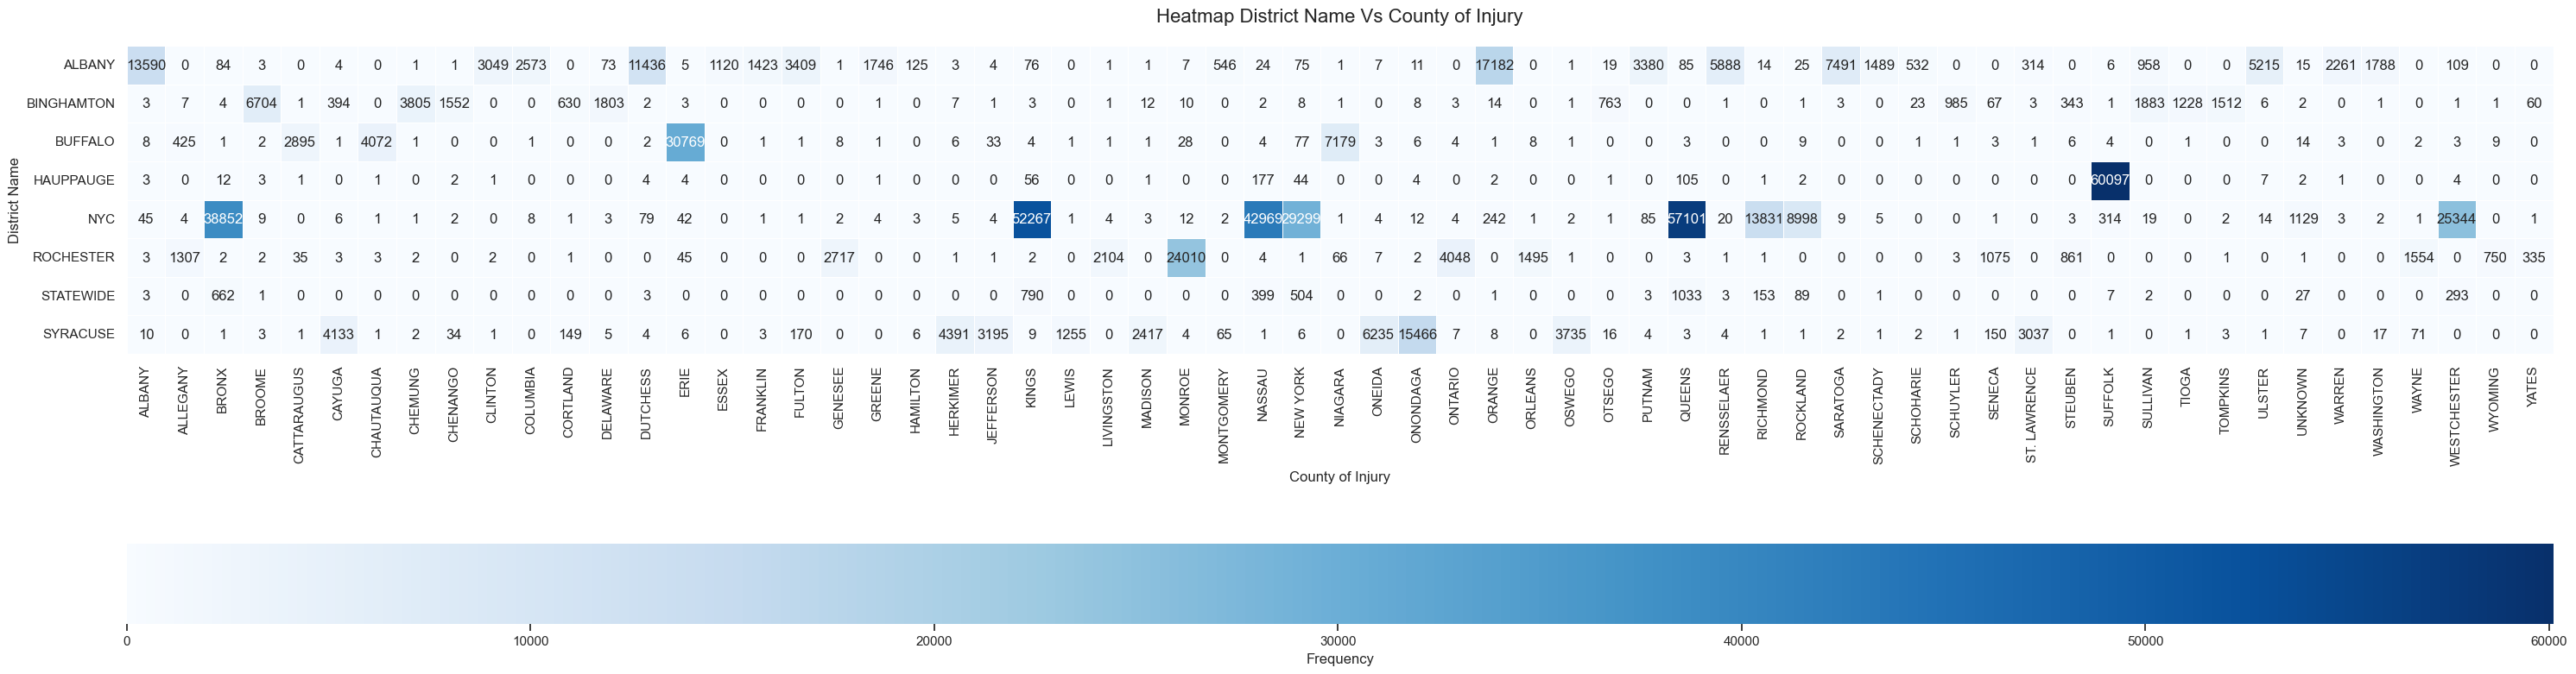

In [551]:
crosstab = pd.crosstab(employees_train['District Name'], employees_train['County of Injury'])

plt.figure(figsize=(30, 15))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frequency', 'orientation':'horizontal', 'aspect':30}, linewidths=0.5, square=True)
plt.ylabel('District Name')
plt.xlabel('County of Injury')
plt.title('Heatmap District Name Vs County of Injury', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

**`Medical Fee Region VS Region Variables`**

**Medical Fee Region Vs District Name** <br>
District Name doesn't seem to be able to segment the Medical Fee Region variable very well.

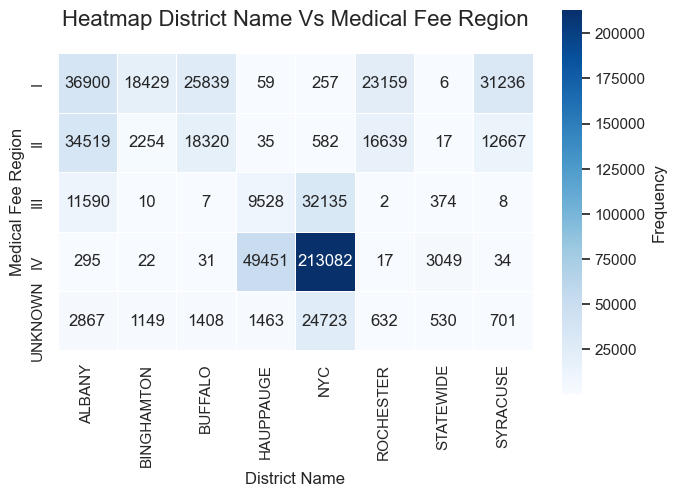

In [552]:
crosstab = pd.crosstab(employees_train['Medical Fee Region'], employees_train['District Name'],)

plt.figure(figsize=(7, 5))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frequency'}, linewidths=0.5, square=True)
plt.xlabel('District Name')
plt.ylabel('Medical Fee Region')
plt.title('Heatmap District Name Vs Medical Fee Region', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

**Medical Fee Region Vs County of Injury**<br>
By Cramér's V association, we found there is a relation between the county where the injury occured with where the injury was treated. And also, we can see by the crosstab below that for each county of injury, there is generally an obvious more common medical fee region associated.<br>

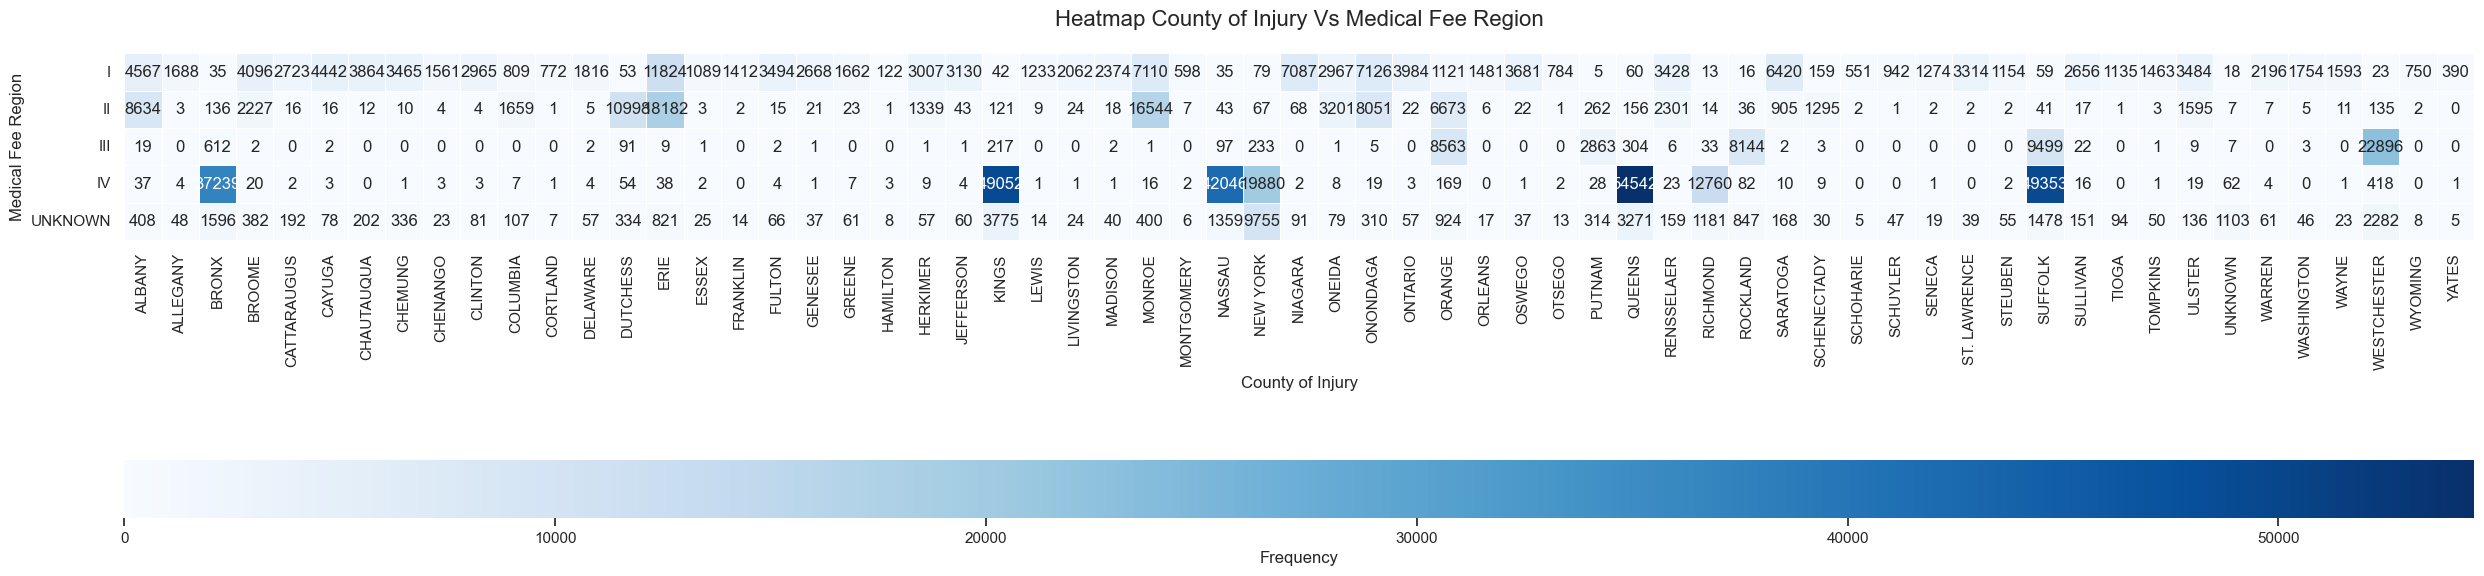

In [553]:
crosstab = pd.crosstab(employees_train['Medical Fee Region'], employees_train['County of Injury'])

plt.figure(figsize=(25, 15))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frequency', 'orientation': 'horizontal', 'aspect':40}, linewidths=0.5, square=True)
plt.xlabel('County of Injury')
plt.ylabel('Medical Fee Region')
plt.title('Heatmap County of Injury Vs Medical Fee Region', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

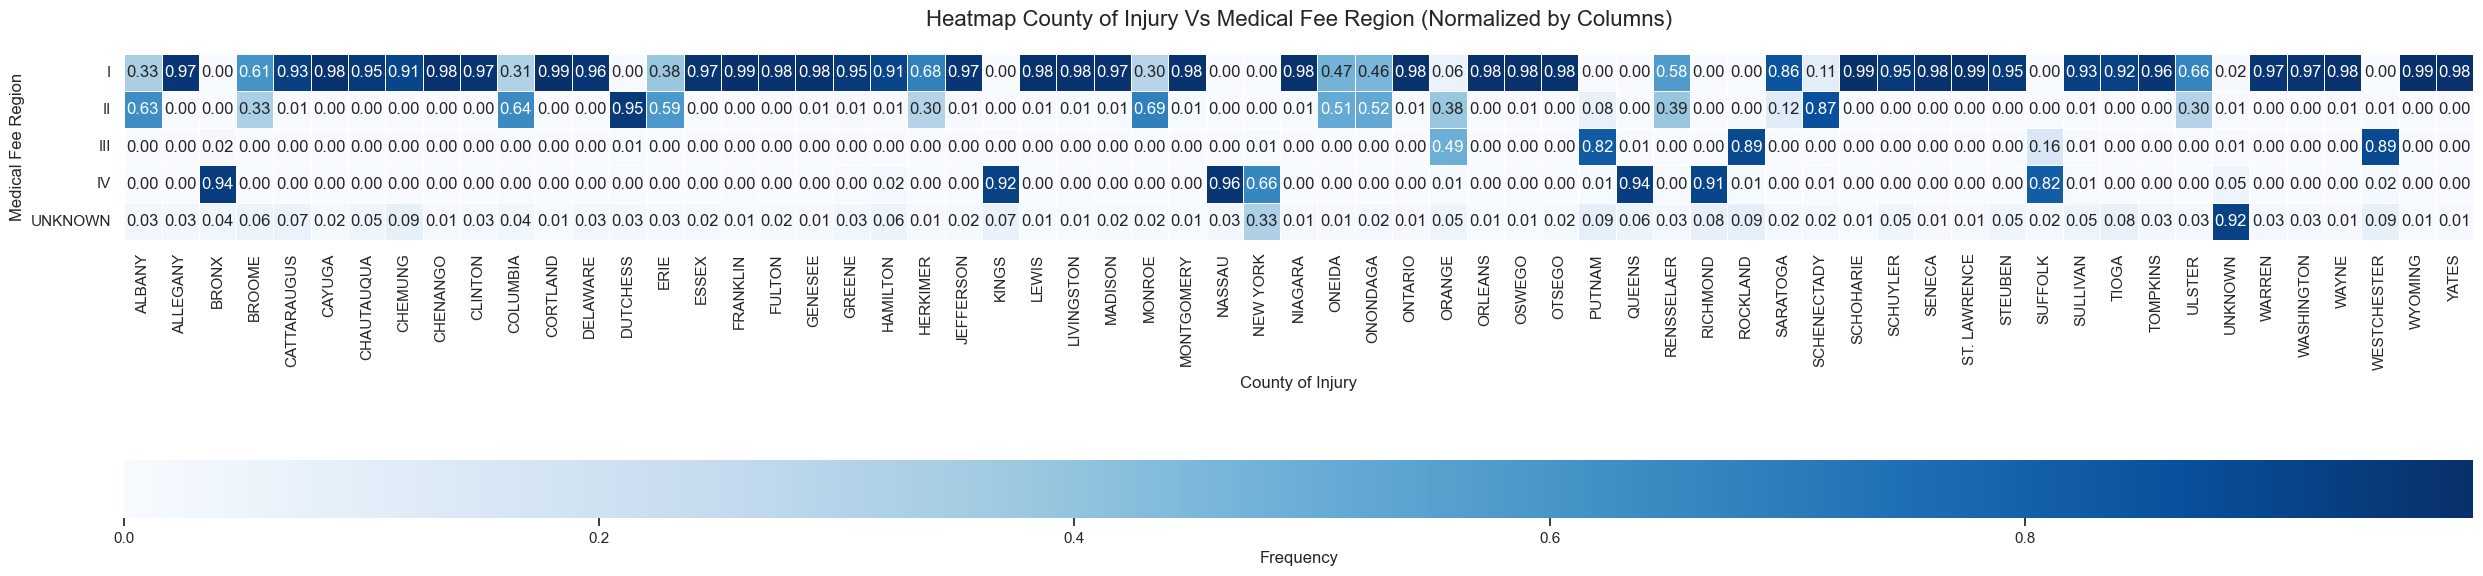

In [554]:
crosstab = pd.crosstab(employees_train['Medical Fee Region'], employees_train['County of Injury'], normalize='columns')

# Plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Frequency', 'orientation': 'horizontal', 'aspect': 40}, linewidths=0.5, square=True)
plt.xlabel('County of Injury')
plt.ylabel('Medical Fee Region')
plt.title('Heatmap County of Injury Vs Medical Fee Region (Normalized by Columns)', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

#### Multivariate Analysis for Claim Injury Type

**`Accident Date`, `Assembly Date`, `C-2 Date`, `C-3 Date`, `First Hearing Date`**

* There are claim whose accident date occured after the date when the claim was created, which doesn't make sense

In [555]:
accident_date_after_assembly= employees_train['Accident Date'] > employees_train['Assembly Date']

In [556]:
accident_date_after_assembly.value_counts()

False    572619
True       1407
Name: count, dtype: int64

In [557]:
employees_train[employees_train['Accident Date'] > employees_train['Assembly Date']].describe(include="object").T

count unique                           top  \
Alternative Dispute Resolution     1407      1                             N   
Carrier Name                       1407    195  CNY OTHER THAN ED, HED WATER   
Carrier Type                       1407      6               3A. SELF PUBLIC   
Claim Injury Type                  1407      8               5. PPD SCH LOSS   
County of Injury                   1407     55                        NASSAU   
District Name                      1407      8                           NYC   
Gender                             1407      4                             M   
Industry Code                      1393     23                            92   
Industry Code Description          1393     19         PUBLIC ADMINISTRATION   
Medical Fee Region                 1407      5                            IV   
WCIO Cause of Injury Code          1397     39                            97   
WCIO Cause of Injury Description   1397     36             REPETITIVE MOTION   
WCIO Nature of Injury Code         1397     28                            52   
WCIO Nature of Injury Description  1397     28                STRAIN OR TEAR   
WCIO Part Of Body Code             1396     40                            35   
WCIO Part Of Body Description      1396     38                          HAND   

                                   freq  
Alternative Dispute Resolution     1407  
Carrier Name                        300  
Carrier Type                        567  
Claim Injury Type                   723  
County of Injury                    162  
District Name                       706  
Gender                             1043  
Industry Code                       533  
Industry Code Description           533  
Medical Fee Region                  705  
WCIO Cause of Injury Code           706  
WCIO Cause of Injury Description    726  
WCIO Nature of Injury Code          392  
WCIO Nature of Injury Description   392  
WCIO Part Of Body Code              253  
WCIO Part Of Body Description       253

In [558]:
employees_train[employees_train['Accident Date'] > employees_train['Assembly Date']]["Claim Injury Type"].value_counts()

Claim Injury Type
5. PPD SCH LOSS    723
3. MED ONLY        350
4. TEMPORARY       255
2. NON-COMP         54
6. PPD NSL          14
1. CANCELLED         7
7. PTD               3
8. DEATH             1
Name: count, dtype: int64

In [559]:
employees_train[employees_train['Accident Date'] > employees_train['Assembly Date']]["Gender"].value_counts()

Gender
M          1043
F           359
UNKNOWN       4
X             1
Name: count, dtype: int64

In [560]:
employees_train[employees_train['Accident Date'] > employees_train['Assembly Date']]["WCIO Cause of Injury Description"].value_counts().head(5)

WCIO Cause of Injury Description
REPETITIVE MOTION             726
OTHER - MISCELLANEOUS, NOC    183
CUMULATIVE, NOC               147
CONTINUAL NOISE                75
STRAIN OR INJURY BY, NOC       70
Name: count, dtype: int64

**`Age at Injury`**

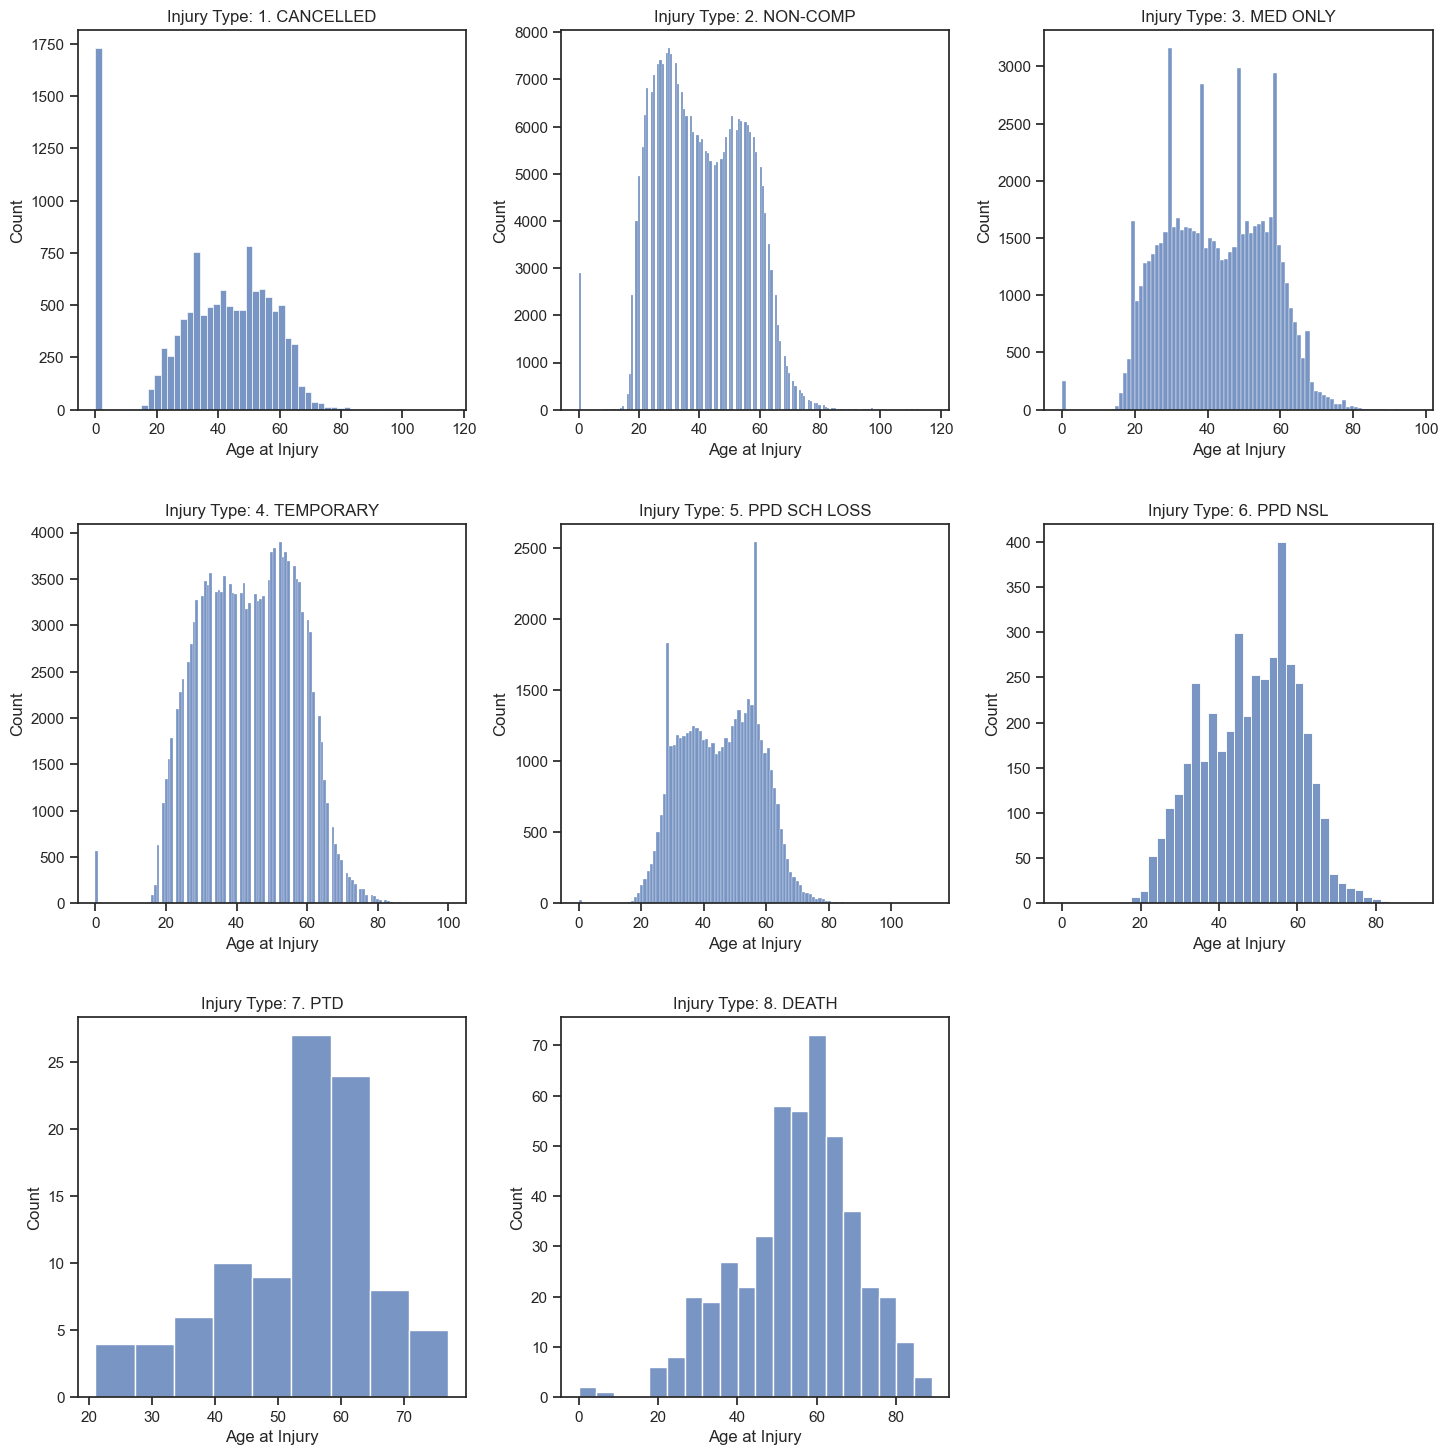

In [561]:
sns.set(style='ticks')
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
fig.tight_layout(pad=3.0)

injury_types = employees_train["Claim Injury Type"].dropna().sort_values().unique()
for i, j in enumerate(injury_types):
    row, col = divmod(i, 3)  # Arrange in a 3x3 grid
    sns.histplot(data=employees_train[employees_train["Claim Injury Type"] == j],
                 x="Age at Injury",
                 ax=axes[row, col])
    axes[row, col].set_title(f"Injury Type: {j}")
    axes[row, col].set_xlabel("Age at Injury")

# Hide any empty subplots (in case there are fewer than 9 claim injury types)
for j in range(i+1, 9):
    row, col = divmod(j, 3)
    axes[row, col].axis("off")

plt.subplots_adjust(hspace=0.3)
plt.show()

In [562]:
employees_train['age_at_injury_zero'] = (employees_train['Age at Injury'] == 0).astype(int)
frq_claim_ati = employees_train.groupby("Claim Injury Type")["age_at_injury_zero"].value_counts()
prp_claim_ati = employees_train.groupby("Claim Injury Type")["age_at_injury_zero"].value_counts(normalize=True)*100
claim_ati = pd.DataFrame({'Frequency': frq_claim_ati,'Proportion': prp_claim_ati}).sort_index(level=['Claim Injury Type', 'age_at_injury_zero'], ascending=[True, False])
claim_ati

Frequency  Proportion
Claim Injury Type age_at_injury_zero                       
1. CANCELLED      1                        1730   13.865513
                  0                       10747   86.134487
2. NON-COMP       1                        2891    0.993205
                  0                      288187   99.006795
3. MED ONLY       1                         251    0.364264
                  0                       68655   99.635736
4. TEMPORARY      1                         568    0.382474
                  0                      147939   99.617526
5. PPD SCH LOSS   1                          21    0.043496
                  0                       48259   99.956504
6. PPD NSL        1                           1    0.023747
                  0                        4210   99.976253
7. PTD            0                          97  100.000000
8. DEATH          1                           2    0.425532
                  0                         468   99.574468

* `1. CANCELLED` is the  claim injury with the highest proportion of value 0 on the age at injury

In [563]:
employees_train.drop(columns="age_at_injury_zero", inplace=True)

**`Alternative Dispute Resolution`**

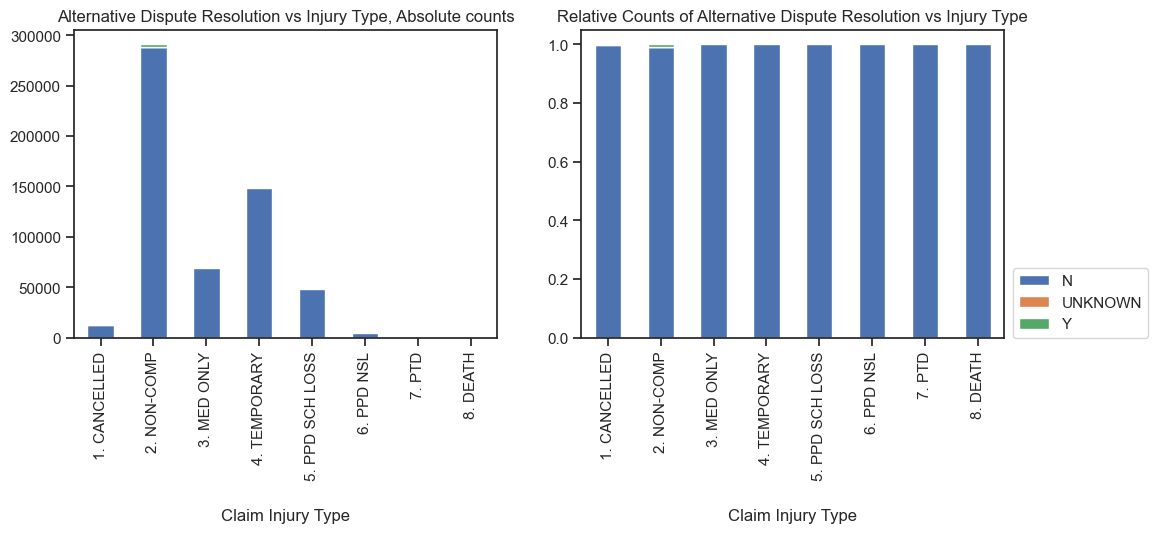

In [564]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Alternative Dispute Resolution'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Alternative Dispute Resolution vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'Alternative Dispute Resolution'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Alternative Dispute Resolution vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

In [565]:
employees_train.groupby("Alternative Dispute Resolution")["Claim Injury Type"].value_counts()

Alternative Dispute Resolution  Claim Injury Type
N                               2. NON-COMP          288483
                                4. TEMPORARY         148507
                                3. MED ONLY           68906
                                5. PPD SCH LOSS       48280
                                1. CANCELLED          12458
                                6. PPD NSL             4211
                                8. DEATH                470
                                7. PTD                   97
UNKNOWN                         2. NON-COMP               5
Y                               2. NON-COMP            2590
                                1. CANCELLED             19
Name: count, dtype: int64

**`Attorney/Representative`**

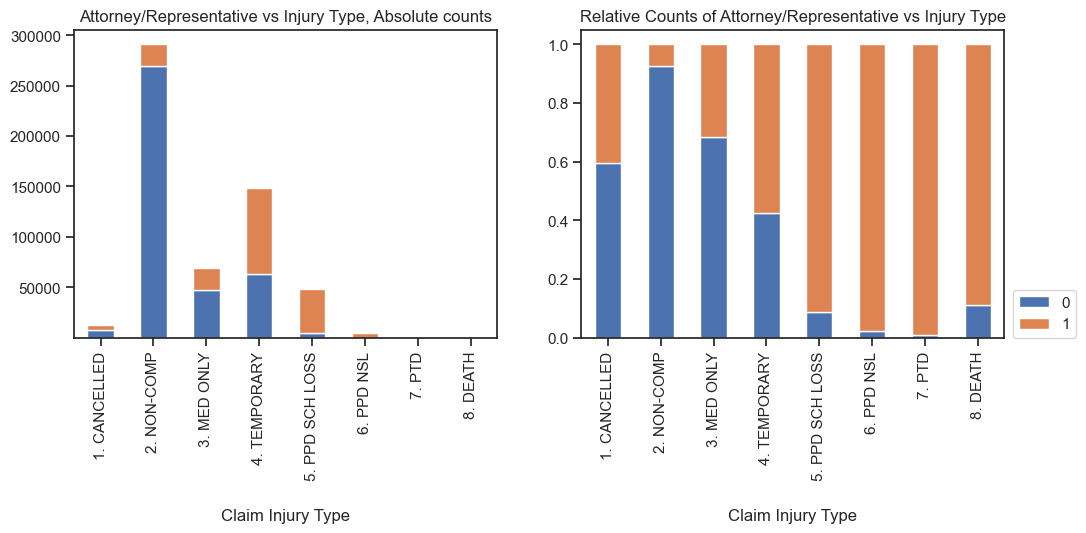

In [566]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Attorney/Representative'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Attorney/Representative vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'Attorney/Representative'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Attorney/Representative vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

In [567]:
frq_claim_ar = employees_train.groupby("Claim Injury Type")["Attorney/Representative"].value_counts()
prp_claim_ar = employees_train.groupby("Claim Injury Type")["Attorney/Representative"].value_counts(normalize=True)*100
claim_ar = pd.DataFrame({'Frequency': frq_claim_ar,'Proportion': prp_claim_ar}).sort_index(level=['Claim Injury Type', 'Attorney/Representative'], ascending=[True, False])
claim_ar

Frequency  Proportion
Claim Injury Type Attorney/Representative                       
1. CANCELLED      1                             5051   40.482488
                  0                             7426   59.517512
2. NON-COMP       1                            21109    7.252008
                  0                           269969   92.747992
3. MED ONLY       1                            21699   31.490726
                  0                            47207   68.509274
4. TEMPORARY      1                            85239   57.397294
                  0                            63268   42.602706
5. PPD SCH LOSS   1                            44001   91.137117
                  0                             4279    8.862883
6. PPD NSL        1                             4122   97.886488
                  0                               89    2.113512
7. PTD            1                               96   98.969072
                  0                                1    1.030928
8. DEATH          1                              418    88.93617
                  0                               52    11.06383

* The classes of 5.PPD SCH LOSS, 6.PPD NSL, 7.PTD, 8.DEATH have more than 85% of claims associated with an Attorney/Representative
* While the others classes, the classes with more claimss asscoiated have the contrary

* 1. Cancelled -> almost 60% didnt have an attorney, even though it's the most "balanced class"
* 2. Non - Comp -> more than 90% didn't have an attorney
* 3. Med Only -> more than 65% didn't have an attorney
* 4. Temporary -> around 57% didnt have an attorney
* 5. PPD SCH LOSS -> around 91% did have an attorney
* 6. PPD NSL -> around 97% did have an attorney
* 7. PTD -> around 98% did have an attorney
* 8. DEATH -> around 88.9 did have an attorney

**`Average Weekly Wage`**

In [568]:
employees_train["Average Weekly Wage"].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

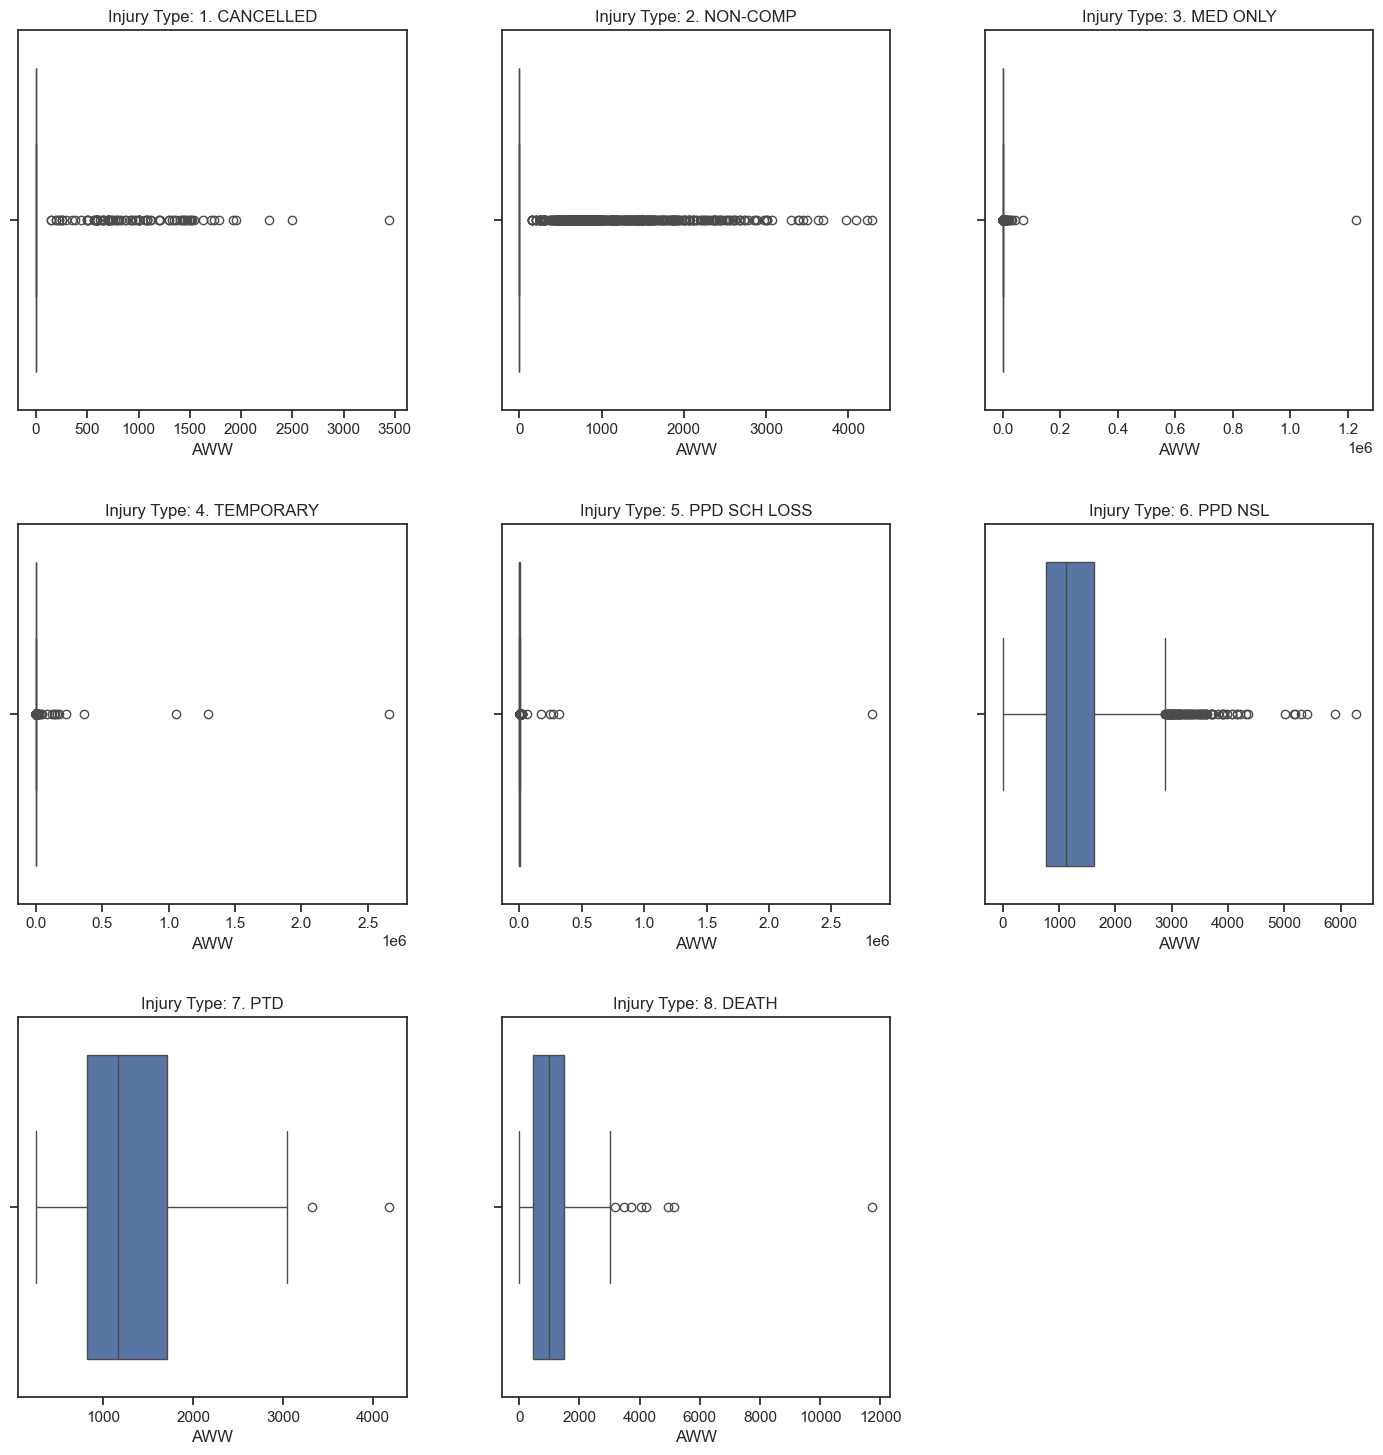

In [569]:
sns.set(style='ticks')
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
fig.tight_layout(pad=3.0)

injury_types = employees_train["Claim Injury Type"].dropna().sort_values().unique()
for i, j in enumerate(injury_types):
    row, col = divmod(i, 3)  # Arrange in a 3x3 grid
    sns.boxplot(data=employees_train[employees_train["Claim Injury Type"] == j],
                 x="Average Weekly Wage",
                 ax=axes[row, col])
    axes[row, col].set_title(f"Injury Type: {j}")
    axes[row, col].set_xlabel("AWW")

# Hide any empty subplots (in case there are fewer than 9 claim injury types)
for j in range(i+1, 9):
    row, col = divmod(j, 3)
    axes[row, col].axis("off")

plt.subplots_adjust(hspace=0.3)
plt.show()

**`Birth Year`**

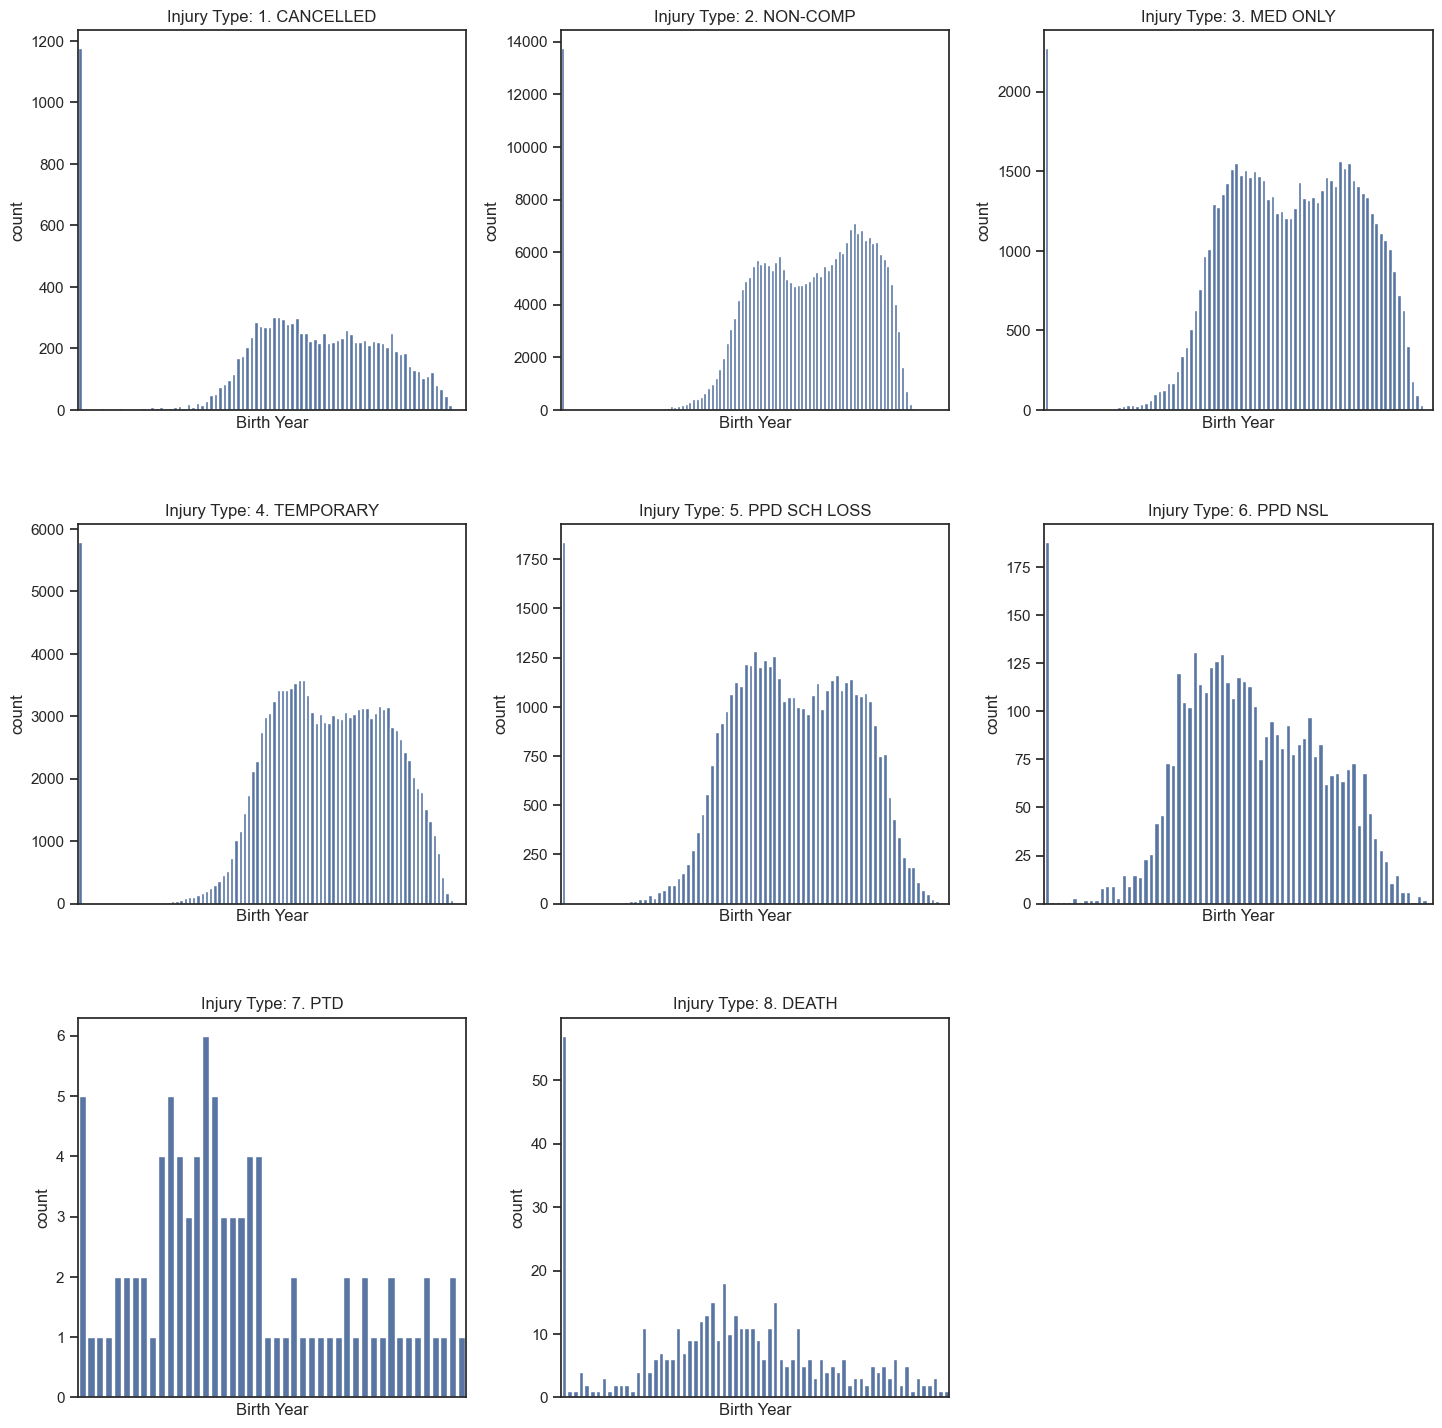

In [570]:
sns.set(style='ticks')
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
fig.tight_layout(pad=3.0)


injury_types = employees_train["Claim Injury Type"].dropna().sort_values().unique()
for i, j in enumerate(injury_types):
    row, col = divmod(i, 3)  # Arrange in a 3x3 grid
    sns.countplot(data=employees_train[(employees_train["Claim Injury Type"] == j) & 
                  employees_train["Birth Year"].notna()],
                 x="Birth Year",
                 ax=axes[row, col])
    axes[row, col].set_title(f"Injury Type: {j}")
    axes[row, col].set_xlabel("Birth Year")
    axes[row, col].set_xticks([])

    
# Hide any empty subplots (in case there are fewer than 9 claim injury types)
for j in range(i+1, 9):
    row, col = divmod(j, 3)
    axes[row, col].axis("off")


plt.subplots_adjust(hspace=0.3)
plt.show()

In [571]:
employees_train.groupby("Claim Injury Type")["Birth Year"].describe()

count         mean         std  min     25%     50%  \
Claim Injury Type                                                           
1. CANCELLED        11820.0  1778.021827  591.166631  0.0  1961.0  1971.0   
2. NON-COMP        276582.0  1880.803339  430.457708  0.0  1966.0  1979.0   
3. MED ONLY         65387.0  1909.129429  362.560063  0.0  1965.0  1977.0   
4. TEMPORARY       140772.0  1895.209331  392.769457  0.0  1965.0  1975.0   
5. PPD SCH LOSS     45839.0  1895.340431  387.561379  0.0  1964.0  1973.0   
6. PPD NSL           4012.0  1879.555583  416.967794  0.0  1961.0  1970.0   
7. PTD                 94.0  1861.680851   443.80089  0.0  1957.0  1962.0   
8. DEATH              442.0  1712.049774  659.637547  0.0  1951.0  1961.0   

                       75%     max  
Claim Injury Type                   
1. CANCELLED        1984.0  2009.0  
2. NON-COMP         1991.0  2018.0  
3. MED ONLY         1989.0  2014.0  
4. TEMPORARY        1987.0  2008.0  
5. PPD SCH LOSS     1984.0  2007.0  
6. PPD NSL          1981.0  2004.0  
7. PTD             1971.75  1999.0  
8. DEATH            1972.0  2011.0

* The most interesting thing is that for the category `7. PTD` the maximum birth year is before 2000
* We should see how many claims have the birth year before or after 2000

In [572]:
employees_train['born_after_2000'] = np.where(employees_train['Birth Year'].isnull(), np.nan, (employees_train['Birth Year'] >= 2000))
employees_train['born_after_2000'] = pd.to_numeric(employees_train['born_after_2000'], errors='coerce')

In [573]:
frq_claim_by = employees_train.groupby("Claim Injury Type")["born_after_2000"].value_counts()
prp_claim_by = employees_train.groupby("Claim Injury Type")["born_after_2000"].value_counts(normalize=True)*100
claim_by = pd.DataFrame({'Frequency': frq_claim_by,'Proportion': prp_claim_by}).sort_index(level=['Claim Injury Type', 'born_after_2000'], ascending=[True, False])
claim_by

Frequency  Proportion
Claim Injury Type born_after_2000                       
1. CANCELLED      1.0                    217    1.835871
                  0.0                  11603   98.164129
2. NON-COMP       1.0                  14510    5.246184
                  0.0                 262072   94.753816
3. MED ONLY       1.0                   2944    4.502424
                  0.0                  62443   95.497576
4. TEMPORARY      1.0                   3911    2.778251
                  0.0                 136861   97.221749
5. PPD SCH LOSS   1.0                    270    0.589018
                  0.0                  45569   99.410982
6. PPD NSL        1.0                     14    0.348953
                  0.0                   3998   99.651047
7. PTD            0.0                     94  100.000000
8. DEATH          1.0                      5    1.131222
                  0.0                    437   98.868778

* There isn't as much distinction as we thought it would have

In [574]:
employees_train.drop(columns="born_after_2000", inplace=True)

In [575]:
def classify_birth_year(birth_year):
    result = ""
    if pd.isnull(birth_year):  
        result = np.nan
    elif birth_year == 0:      
        result = 'Zero'
    elif 0 < birth_year < 2000: 
        result= 'Before 2000'
    else:  
        result= '2000 or Later'
    return result

employees_train['birth_year_category'] = employees_train['Birth Year'].apply(classify_birth_year)


In [576]:
frq_claim_cby = employees_train.groupby("Claim Injury Type")["birth_year_category"].value_counts()
prp_claim_cby = employees_train.groupby("Claim Injury Type")["birth_year_category"].value_counts(normalize=True)*100
claim_cby = pd.DataFrame({'Frequency': frq_claim_cby,'Proportion': prp_claim_cby}).sort_index(level=['Claim Injury Type', 'birth_year_category'], ascending=[True, False])
claim_cby

Frequency  Proportion
Claim Injury Type birth_year_category                       
1. CANCELLED      Zero                      1176    9.949239
                  Before 2000              10427   88.214890
                  2000 or Later              217    1.835871
2. NON-COMP       Zero                     13753    4.972486
                  Before 2000             248319   89.781331
                  2000 or Later            14510    5.246184
3. MED ONLY       Zero                      2273    3.476226
                  Before 2000              60170   92.021350
                  2000 or Later             2944    4.502424
4. TEMPORARY      Zero                      5791    4.113744
                  Before 2000             131070   93.108004
                  2000 or Later             3911    2.778251
5. PPD SCH LOSS   Zero                      1838    4.009686
                  Before 2000              43731   95.401296
                  2000 or Later              270    0.589018
6. PPD NSL        Zero                       188    4.685942
                  Before 2000               3810   94.965105
                  2000 or Later               14    0.348953
7. PTD            Zero                         5    5.319149
                  Before 2000                 89   94.680851
8. DEATH          Zero                        57   12.895928
                  Before 2000                380   85.972851
                  2000 or Later                5    1.131222

In [577]:
employees_train.drop(columns="birth_year_category", inplace=True)

**`C-3 Date`**

In [578]:
employees_train['has_c3_date'] = employees_train['C-3 Date'].notnull().astype(int)
frq_claim_c3 = employees_train.groupby("Claim Injury Type")["has_c3_date"].value_counts()
prp_claim_c3 = employees_train.groupby("Claim Injury Type")["has_c3_date"].value_counts(normalize=True)*100
claim_c3 = pd.DataFrame({'Frequency': frq_claim_c3,'Proportion': prp_claim_c3}).sort_index(level=['Claim Injury Type', 'has_c3_date'], ascending=[True, False])
claim_c3

Frequency  Proportion
Claim Injury Type has_c3_date                       
1. CANCELLED      1                 5610   44.962731
                  0                 6867   55.037269
2. NON-COMP       1                38127   13.098551
                  0               252951   86.901449
3. MED ONLY       1                23841   34.599309
                  0                45065   65.400691
4. TEMPORARY      1                78974   53.178638
                  0                69533   46.821362
5. PPD SCH LOSS   1                37215   77.081607
                  0                11065   22.918393
6. PPD NSL        1                 3352   79.601045
                  0                  859   20.398955
7. PTD            1                   79   81.443299
                  0                   18   18.556701
8. DEATH          1                   47   10.000000
                  0                  423   90.000000

* 1. Cancelled injury type is the most balanced, with 55% without C-3 Date
* 2. NON-COMP has around 86.9% without C-3 Date
* 3. MED ONLY has around 65% without C-3 Date
* 4. TEMPORARY has around 53% with C-3 Date
* 5. PPD SCH LOSS has around 77% with C-3 Date
* 6. PPD NSL has around 79% with C-3 Date
* 7. PTD has around 81% with C-3 Date
* 8. DEATH has 90% without C-3 Date, probably coming from family members

In [579]:
employees_train.drop(columns="has_c3_date", inplace=True)

**`Carrier Type`**

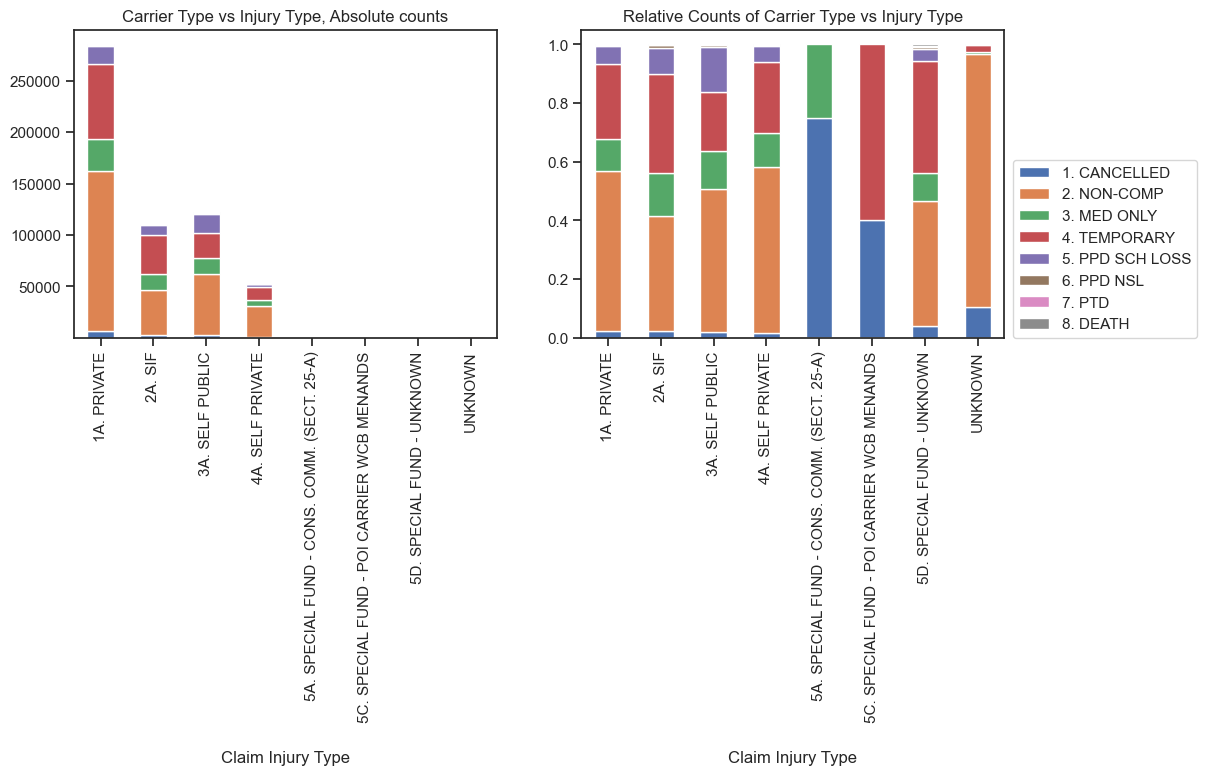

In [580]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Carrier Type'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Carrier Type vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat1 = 'Carrier Type'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Carrier Type vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

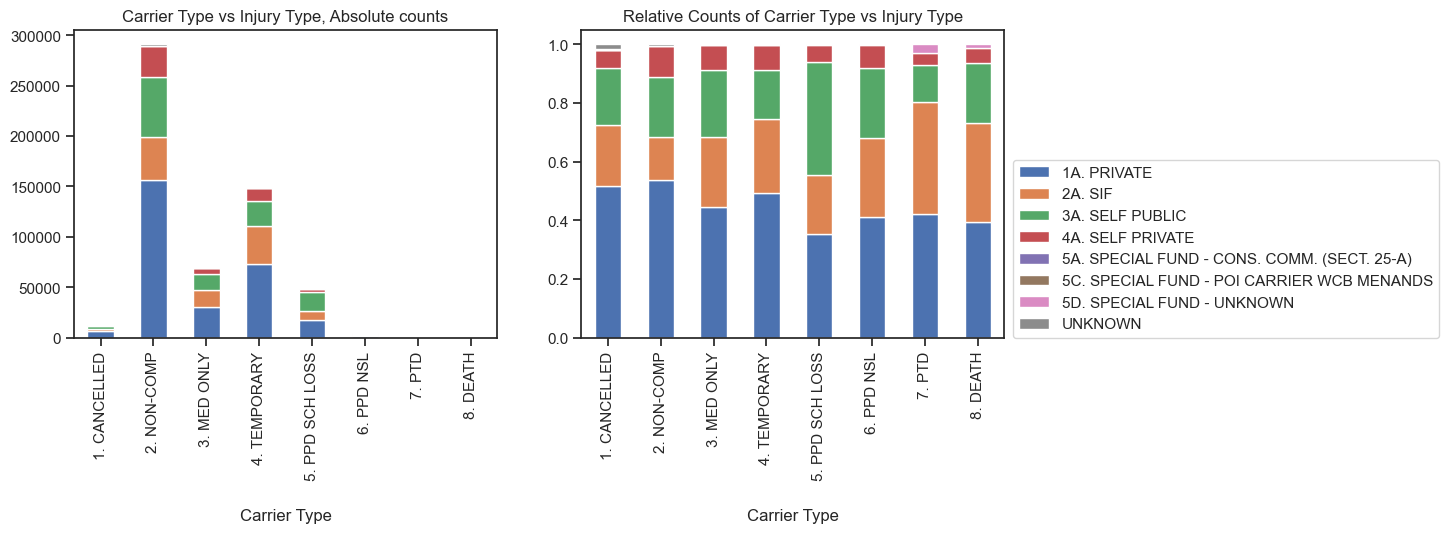

In [581]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Carrier Type'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Carrier Type vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Carrier Type", labelpad=20)

cat2 = 'Carrier Type'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Carrier Type vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Carrier Type",labelpad=20)

plt.show()

**`County of Injury`**

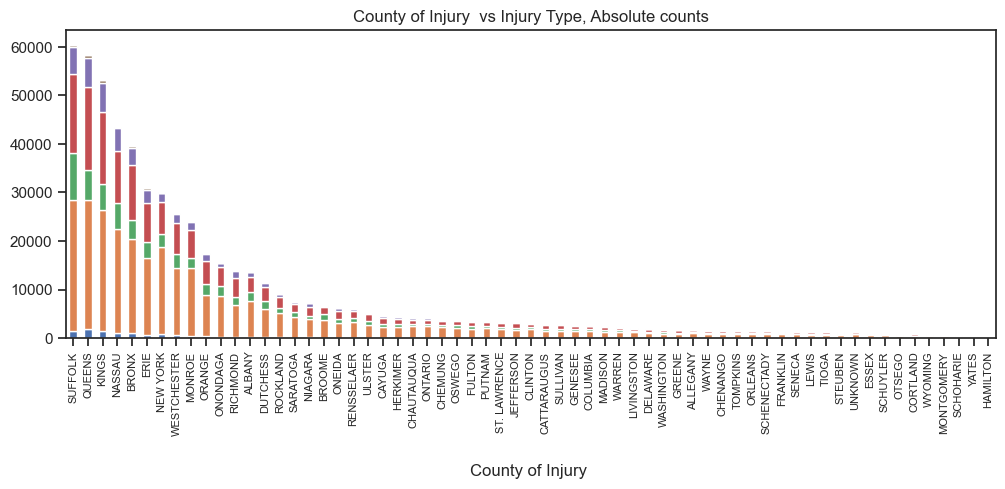

In [582]:
fig, axes = plt.subplots(1,1, figsize=(12,4))

cat1 = 'County of Injury'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df = catpc_df.loc[employees_train["County of Injury"].value_counts(ascending=False).index]
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('County of Injury  vs Injury Type, Absolute counts')
axes.legend([], frameon=False) # hide legend on right subplot
axes.set_xlabel("County of Injury ", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

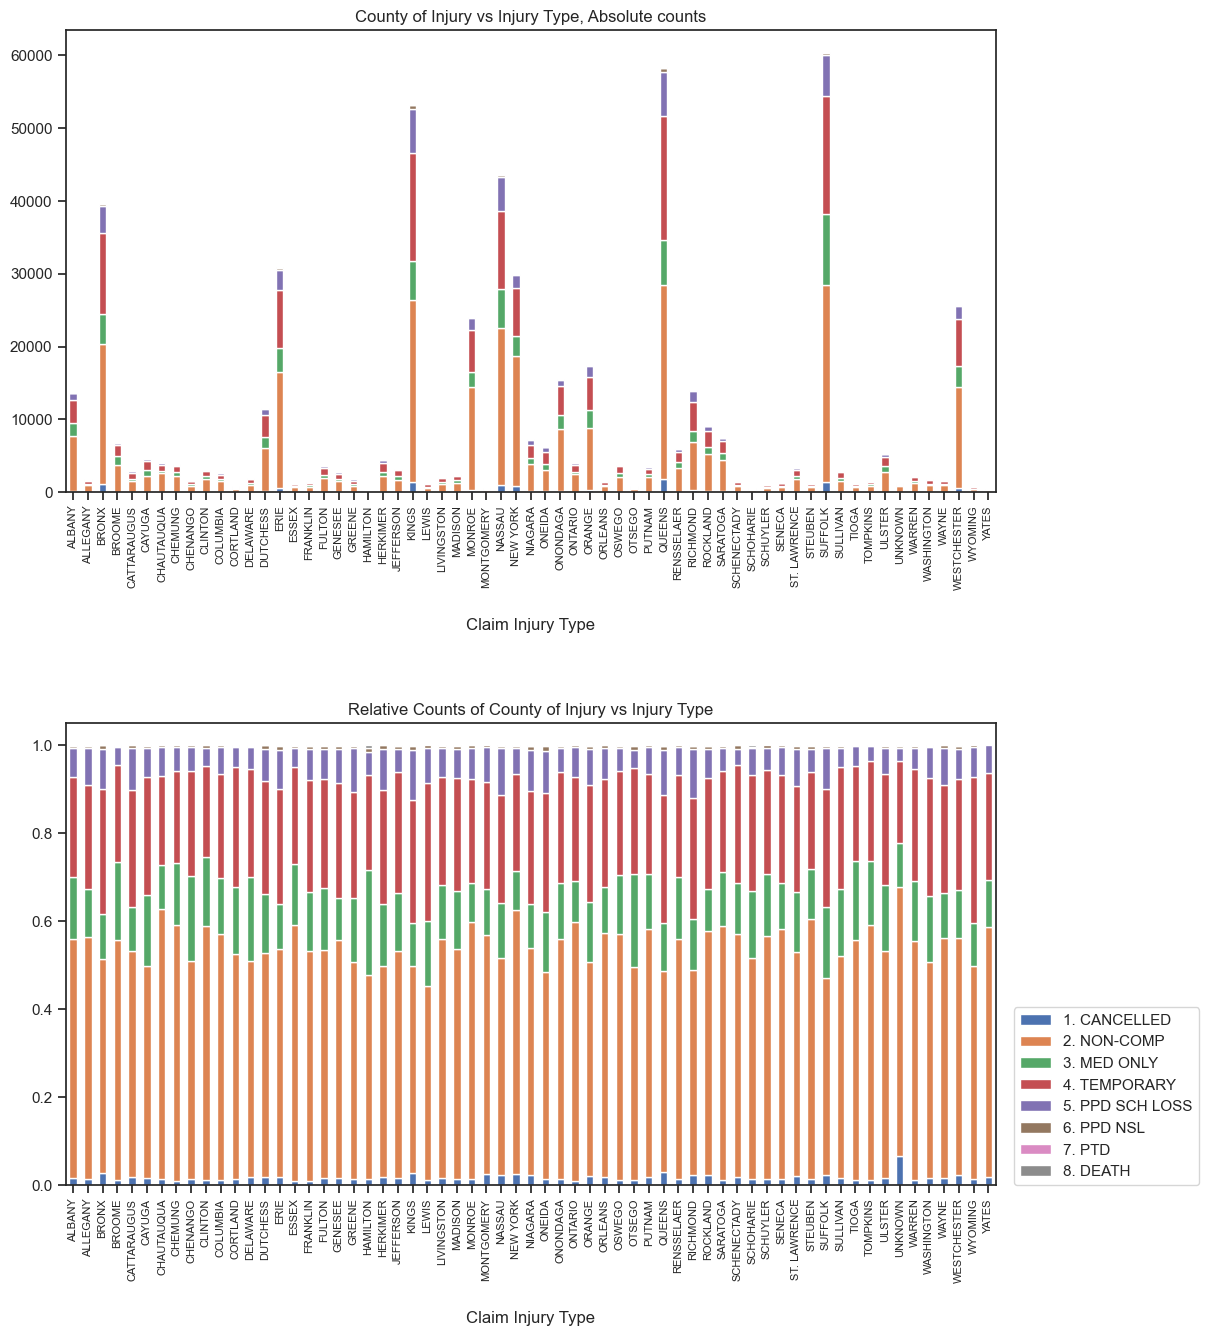

In [583]:
fig, axes = plt.subplots(2,1, figsize=(12,15))

cat1 = 'County of Injury'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('County of Injury vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'County of Injury'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of County of Injury vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**Covid - 19 Indicator**

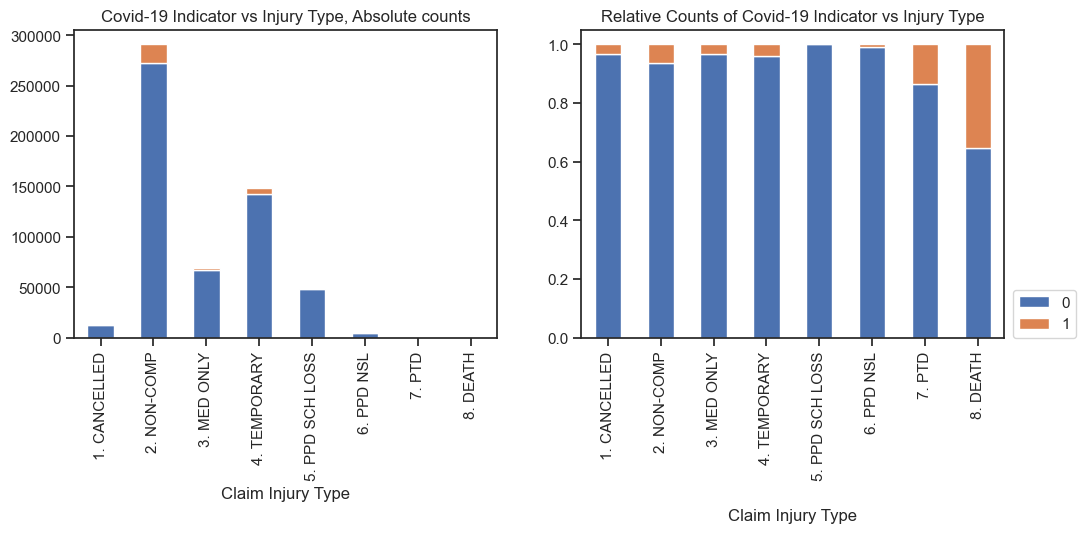

In [584]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'COVID-19 Indicator'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Covid-19 Indicator vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'COVID-19 Indicator'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Covid-19 Indicator vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

**`District Name`**

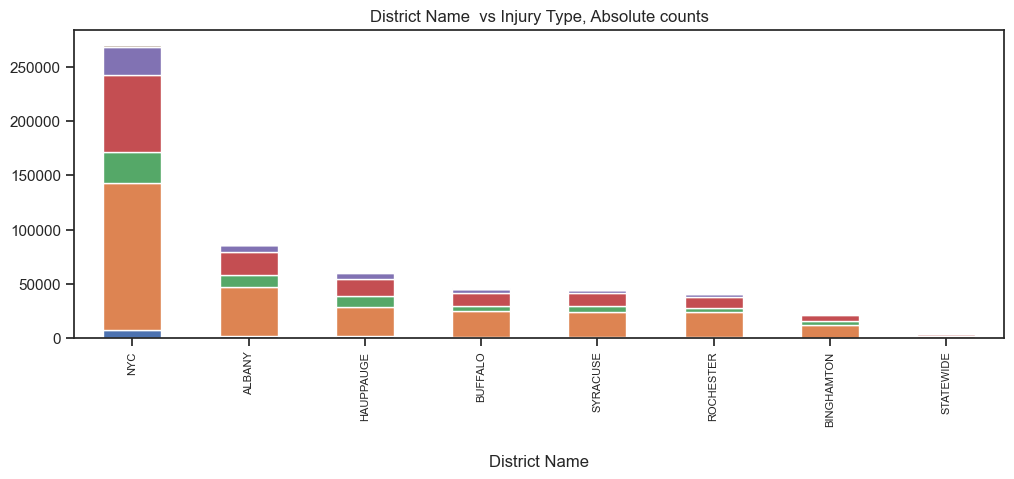

In [585]:
fig, axes = plt.subplots(1,1, figsize=(12,4))

cat1 = 'District Name'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df = catpc_df.loc[employees_train["District Name"].value_counts(ascending=False).index]
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('District Name  vs Injury Type, Absolute counts')
axes.legend([], frameon=False) # hide legend on right subplot
axes.set_xlabel("District Name", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

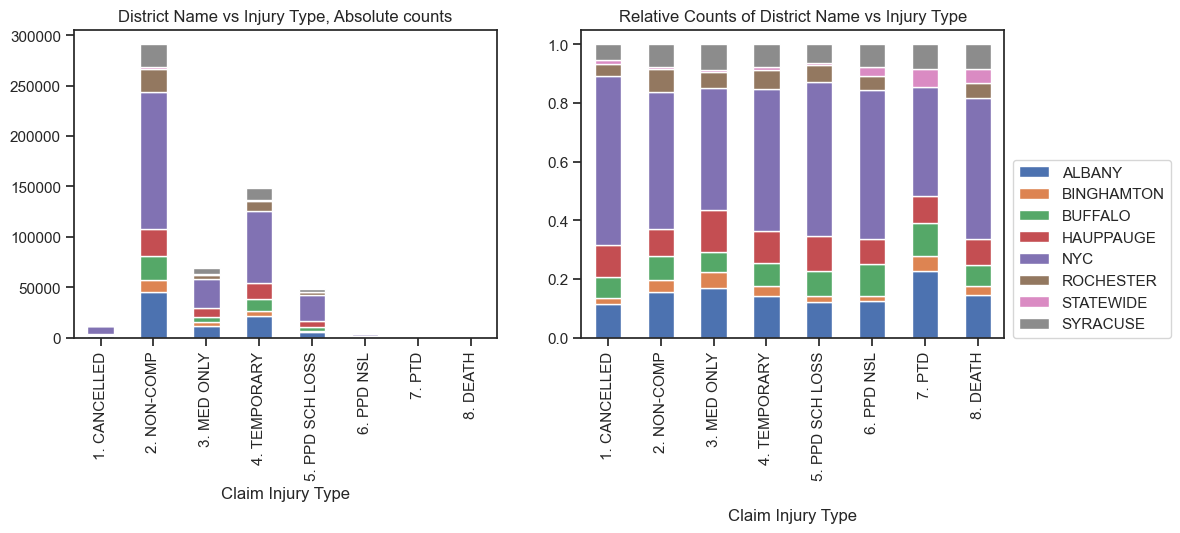

In [586]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'District Name'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('District Name vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'District Name'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of District Name vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

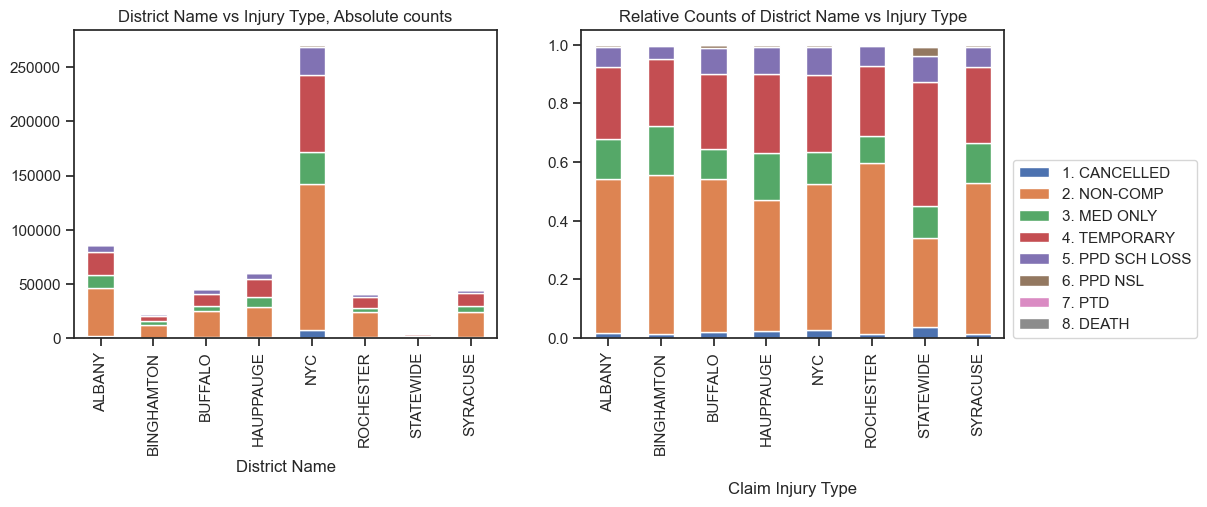

In [587]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'District Name'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('District Name vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat1 = 'District Name'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of District Name vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

**`First Hearing Date`**

In [588]:
employees_train['has_hearing_date'] = employees_train['First Hearing Date'].notnull().astype(int)
frq_claim_fhd = employees_train.groupby("Claim Injury Type")["has_hearing_date"].value_counts()
prp_claim_fhd = employees_train.groupby("Claim Injury Type")["has_hearing_date"].value_counts(normalize=True)*100
claim_fhd = pd.DataFrame({'Frequency': frq_claim_fhd,'Proportion': prp_claim_fhd}).sort_index(level=['Claim Injury Type', 'has_hearing_date'], ascending=[True, False])
claim_fhd

Frequency  Proportion
Claim Injury Type has_hearing_date                       
1. CANCELLED      1                      2195   17.592370
                  0                     10282   82.407630
2. NON-COMP       1                     14241    4.892503
                  0                    276837   95.107497
3. MED ONLY       1                     22219   32.245378
                  0                     46687   67.754622
4. TEMPORARY      1                     76695   51.644030
                  0                     71812   48.355970
5. PPD SCH LOSS   1                     30706   63.599834
                  0                     17574   36.400166
6. PPD NSL        1                      4175   99.145096
                  0                        36    0.854904
7. PTD            1                        97  100.000000
8. DEATH          1                       470  100.000000

In [589]:
employees_train.drop(columns="has_hearing_date", inplace=True)

**Gender**

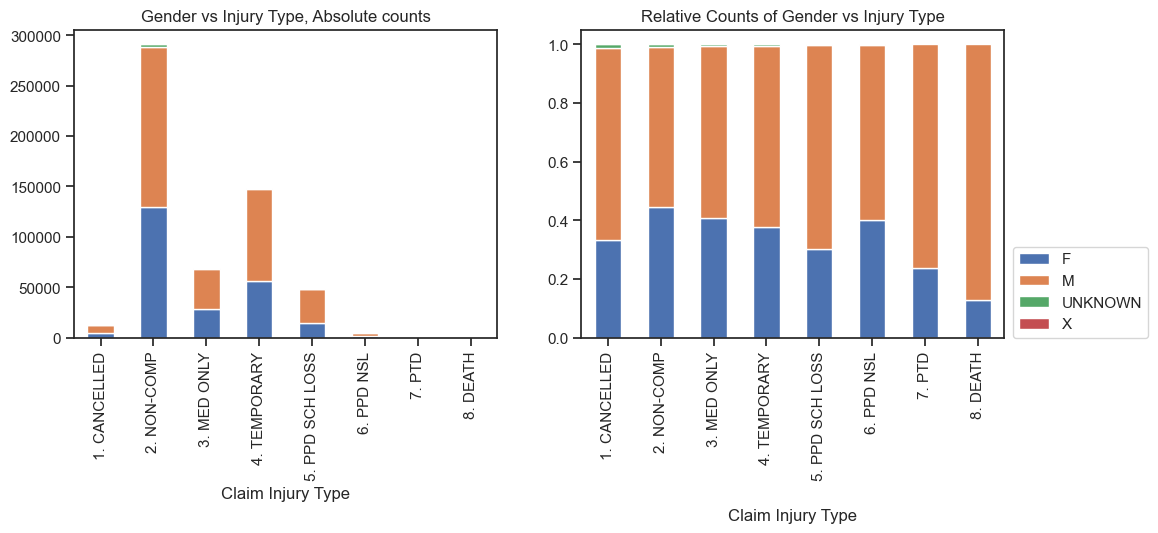

In [590]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Gender'
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Gender vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'Gender'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Gender vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

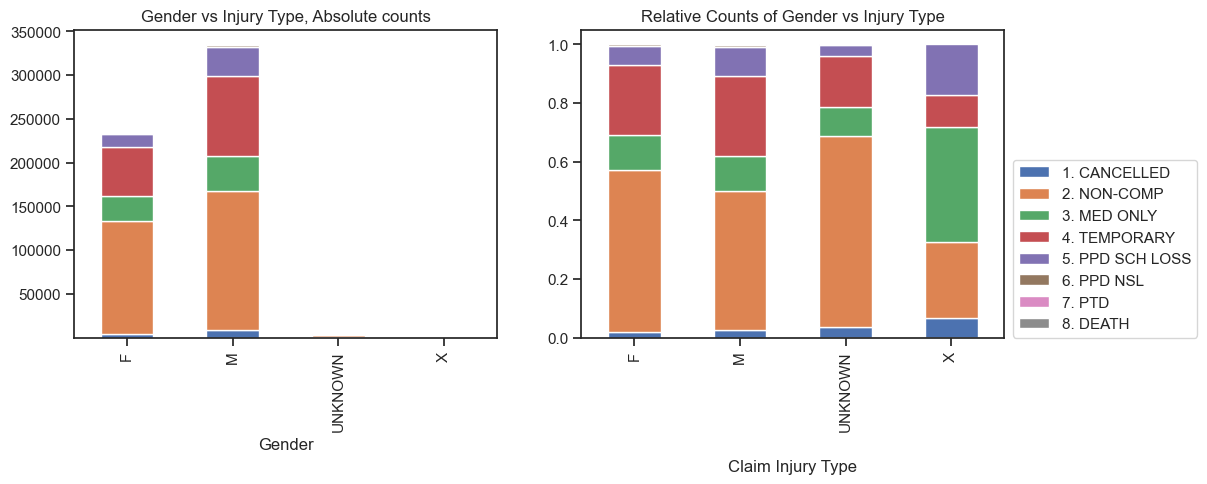

In [591]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Gender'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Gender vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat1 = 'Gender'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Gender vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

**`IME-4 Count`**

In [592]:
employees_train['has_ime'] = employees_train['IME-4 Count'].notnull().astype(int)
frq_claim_ime = employees_train.groupby("Claim Injury Type")["has_ime"].value_counts()
prp_claim_ime = employees_train.groupby("Claim Injury Type")["has_ime"].value_counts(normalize=True)*100
claim_ime = pd.DataFrame({'Frequency': frq_claim_ime,'Proportion': prp_claim_ime}).sort_index(level=['Claim Injury Type', 'has_ime'], ascending=[True, False])
claim_ime

Frequency  Proportion
Claim Injury Type has_ime                       
1. CANCELLED      1              362    2.901338
                  0            12115   97.098662
2. NON-COMP       1             5503    1.890559
                  0           285575   98.109441
3. MED ONLY       1            13793   20.017125
                  0            55113   79.982875
4. TEMPORARY      1            71667   48.258331
                  0            76840   51.741669
5. PPD SCH LOSS   1            37284   77.224524
                  0            10996   22.775476
6. PPD NSL        1             4000   94.989314
                  0              211    5.010686
7. PTD            1               93   95.876289
                  0                4    4.123711
8. DEATH          1              101   21.489362
                  0              369   78.510638

In [593]:
employees_train.drop(columns="has_ime", inplace=True)

**Industry Code**

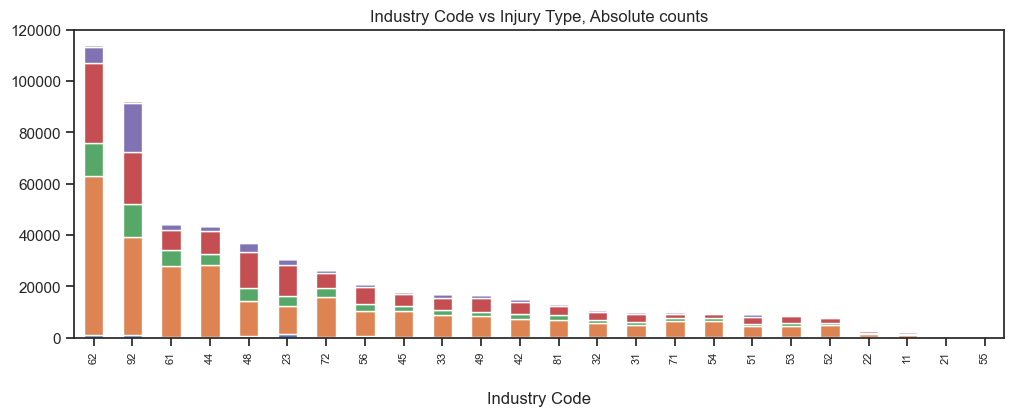

In [594]:
fig, axes = plt.subplots(1,1, figsize=(12,4))

cat1 = 'Industry Code'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df = catpc_df.loc[employees_train["Industry Code"].value_counts(ascending=False).index]
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('Industry Code vs Injury Type, Absolute counts')
axes.legend([], frameon=False) # hide legend on right subplot
axes.set_xlabel("Industry Code", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

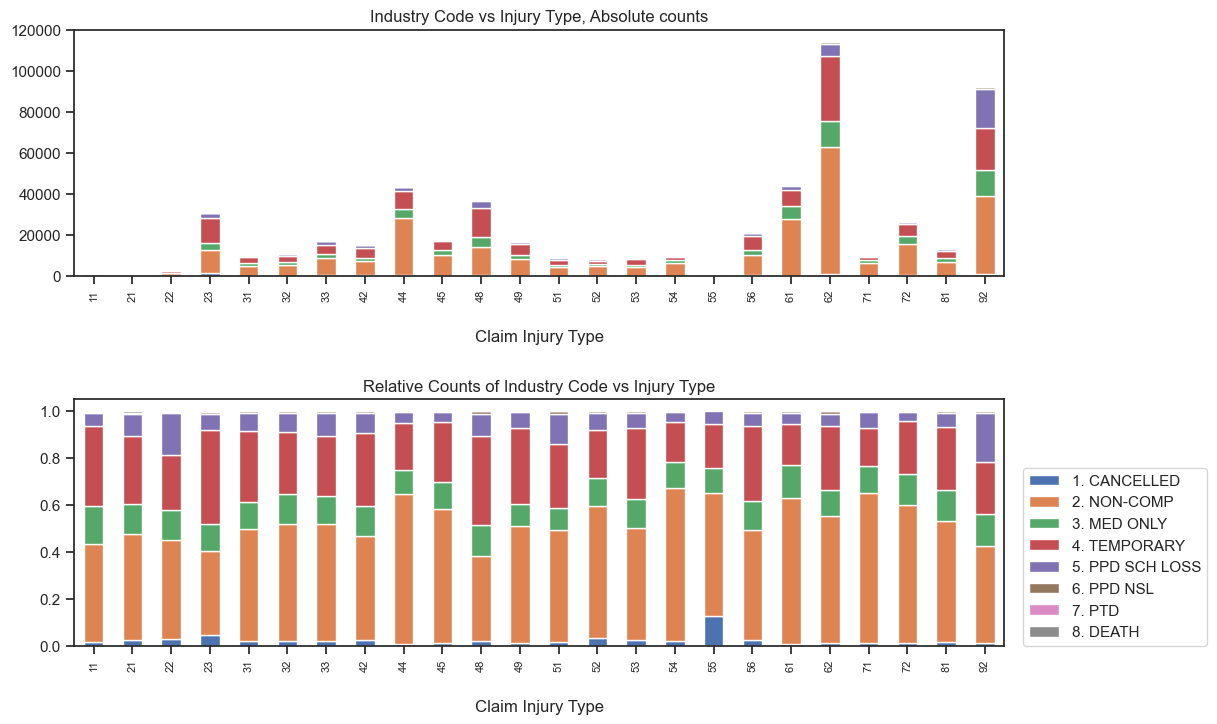

In [595]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

cat1 = 'Industry Code'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Industry Code vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'Industry Code'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Industry Code vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**Medical Fee Region**

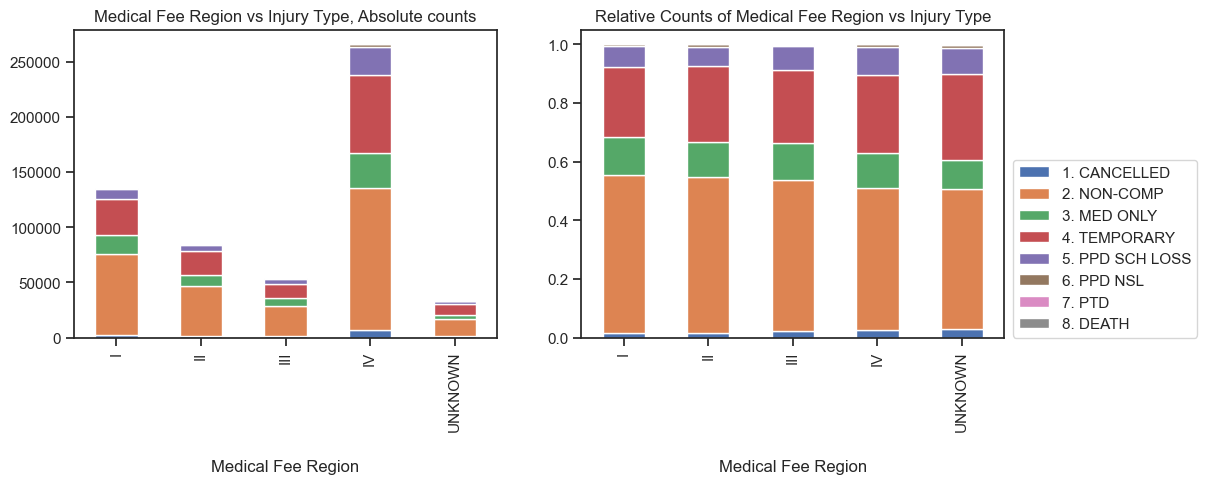

In [596]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = "Medical Fee Region"
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Medical Fee Region vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Medical Fee Region", labelpad=20)

cat1 = 'Medical Fee Region'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Medical Fee Region vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Medical Fee Region",labelpad=20)

plt.show()

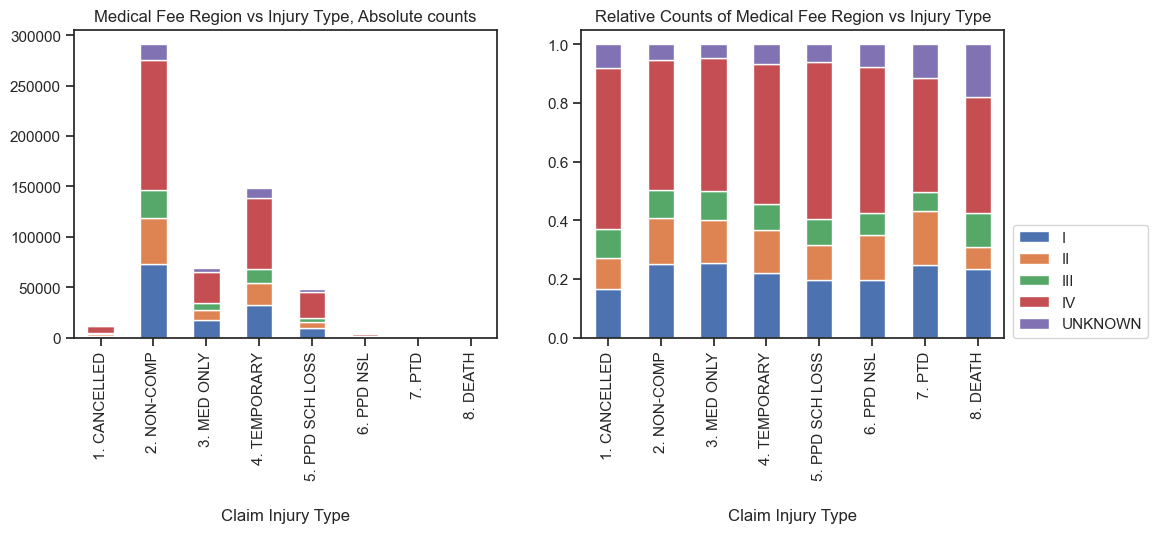

In [597]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = "Medical Fee Region"
cat1 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Medical Fee Region vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'Medical Fee Region'
cat1 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Medical Fee Region vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)

plt.show()

**`WCIO Nature of Injury Code`**

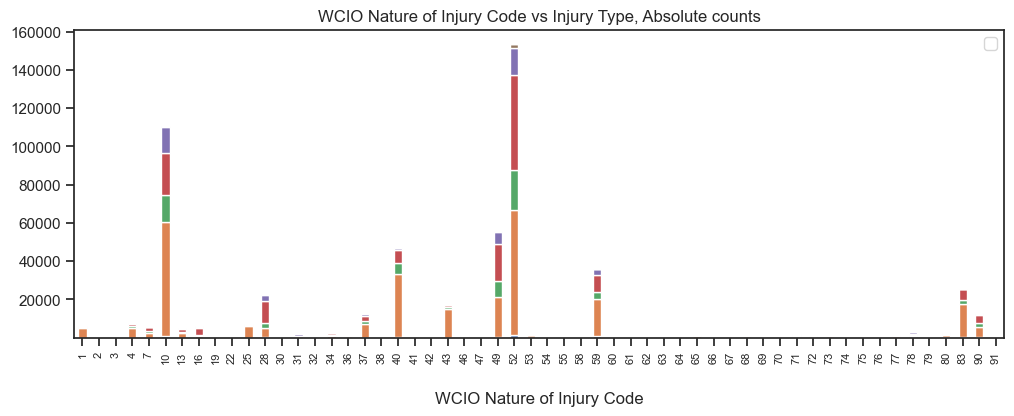

In [598]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

cat1 = 'WCIO Nature of Injury Code'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()

catpc_df = catpc_df.sort_index()

# Plot the data
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('WCIO Nature of Injury Code vs Injury Type, Absolute counts')
axes.legend([], frameon=True)  # hide legend
axes.set_xlabel("WCIO Nature of Injury Code", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

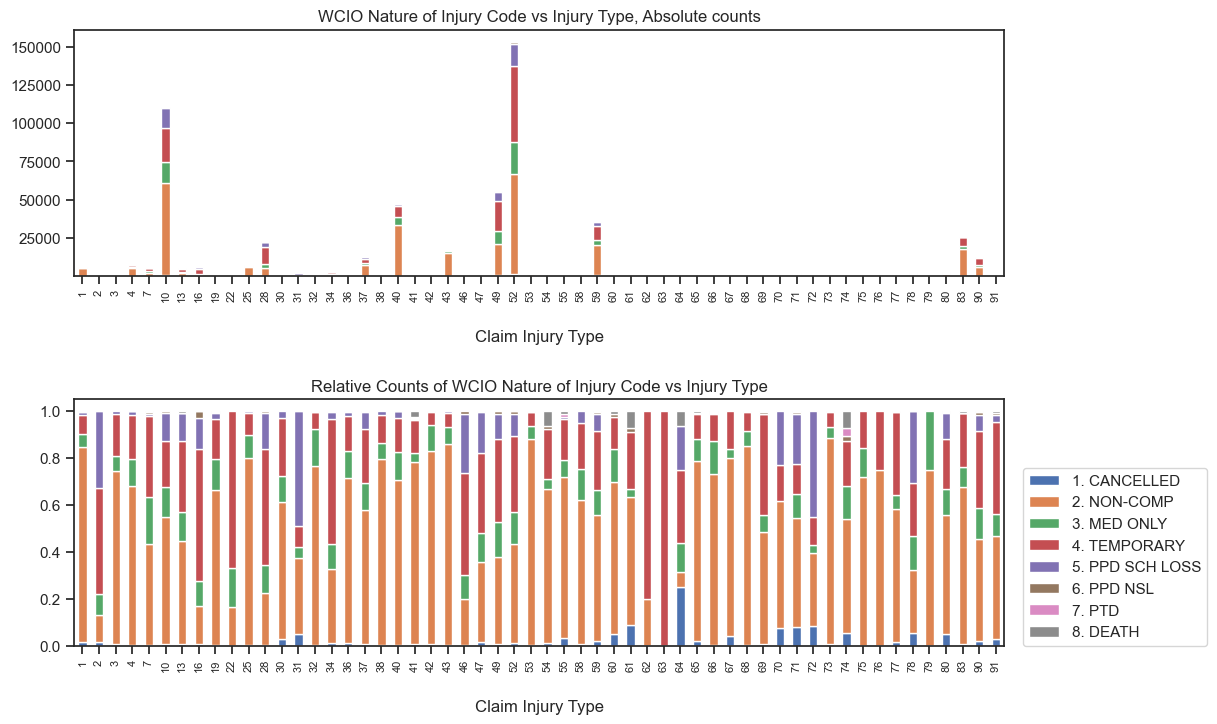

In [599]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

cat1 = 'WCIO Nature of Injury Code'
cat2 = 'Claim Injury Type'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Nature of Injury Code vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'WCIO Nature of Injury Code'
cat2 = 'Claim Injury Type'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Nature of Injury Code vs Injury Type")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [600]:
employees_train[employees_train["Industry Code Description"].isin(["MANUFACTURING","CONSTRUCTION","TRANSPORTATION AND WAREHOUSING"])]["WCIO Nature of Injury Description"].value_counts()

WCIO Nature of Injury Description
STRAIN OR TEAR                                                 30761
SPRAIN OR TEAR                                                 18643
CONTUSION                                                      16325
LACERATION                                                     10612
ALL OTHER SPECIFIC INJURIES, NOC                                9062
FRACTURE                                                        6507
INFLAMMATION                                                    3517
COVID-19                                                        3343
MULTIPLE PHYSICAL INJURIES ONLY                                 2842
FOREIGN BODY                                                    2055
PUNCTURE                                                        1922
DISLOCATION                                                     1775
CRUSHING                                                        1411
HEARING LOSS OR IMPAIRMENT                                      1259


In [601]:
employees_train[employees_train["Industry Code Description"].isin(["MANUFACTURING","CONSTRUCTION","TRANSPORTATION AND WAREHOUSING"])]["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
LOWER BACK AREA                                          12084
SHOULDER(S)                                               9169
KNEE                                                      9150
MULTIPLE                                                  8178
FINGER(S)                                                 7913
MULTIPLE BODY PARTS (INCLUDING BODY                       7235
HAND                                                      6218
ANKLE                                                     5623
FOOT                                                      4171
WRIST                                                     3694
SOFT TISSUE                                               3601
BODY SYSTEMS AND MULTIPLE BODY SYSTEMS                    2848
EYE(S)                                                    2830
LOWER ARM                                                 2689
LOWER LEG                                                 2649
NO PHYSICAL INJURY       

#### Multivariative Analysis for Agreement Reached

In [602]:
employees_train["Agreement Reached"].value_counts(normalize=True)*100

Agreement Reached
0    95.333487
1     4.666513
Name: proportion, dtype: Float64

<Axes: xlabel='Agreement Reached', ylabel='count'>

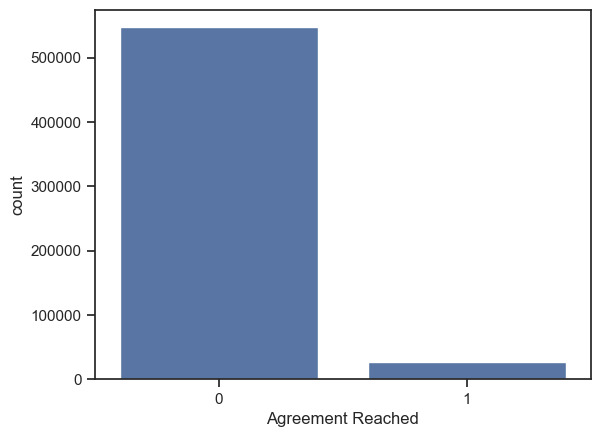

In [603]:
sns.countplot(data= employees_train, x="Agreement Reached")

In [604]:
employees_train.groupby("Agreement Reached").describe(include="object").T

Agreement Reached                                                         0  \
Alternative Dispute Resolution    count                              547239   
                                  unique                                  3   
                                  top                                     N   
                                  freq                               544625   
Carrier Name                      count                              547239   
                                  unique                               2031   
                                  top                  STATE INSURANCE FUND   
                                  freq                               105623   
Carrier Type                      count                              547239   
                                  unique                                  8   
                                  top                           1A. PRIVATE   
                                  freq                               267739   
Claim Injury Type                 count                              547239   
                                  unique                                  8   
                                  top                           2. NON-COMP   
                                  freq                               291078   
County of Injury                  count                              547239   
                                  unique                                 63   
                                  top                               SUFFOLK   
                                  freq                                57362   
District Name                     count                              547239   
                                  unique                                  8   
                                  top                                   NYC   
                                  freq                               256187   
Gender                            count                              547239   
                                  unique                                  4   
                                  top                                     M   
                                  freq                               317697   
Industry Code                     count                              537382   
                                  unique                                 24   
                                  top                                    62   
                                  freq                               109854   
Industry Code Description         count                              537382   
                                  unique                                 20   
                                  top     HEALTH CARE AND SOCIAL ASSISTANCE   
                                  freq                               109854   
Medical Fee Region                count                              547239   
                                  unique                                  5   
                                  top                                    IV   
                                  freq                               252144   
WCIO Cause of Injury Code         count                              531804   
                                  unique                                 77   
                                  top                                    56   
                                  freq                                43578   
WCIO Cause of Injury Description  count                              531804   
                                  unique                                 74   
                                  top                               LIFTING   
                                  freq                                43578   
WCIO Nature of Injury Code        count                              531785   
                                  unique          

**`Age at Injury`**

* It seems there's no differences on the age at injury distribution for each agreement reached

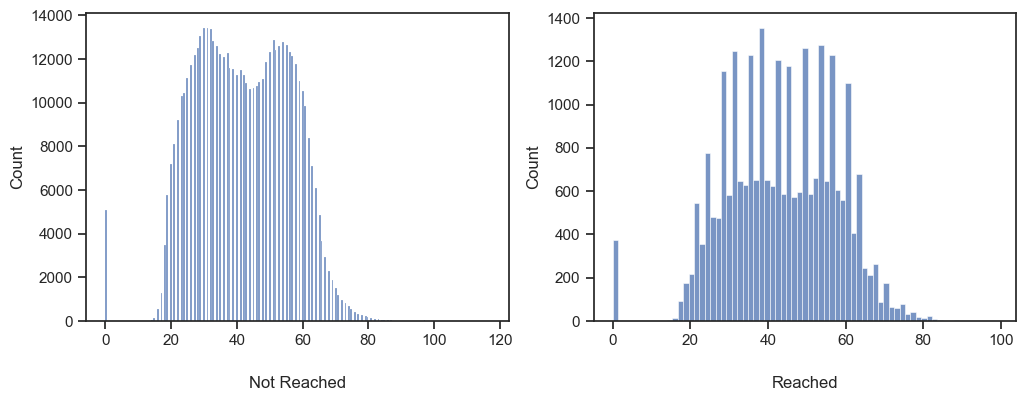

In [605]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(data=employees_train[employees_train["Agreement Reached"] == 0], x="Age at Injury", ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel("Not Reached", labelpad=20)

sns.histplot(data=employees_train[employees_train["Agreement Reached"] == 1], x="Age at Injury", ax=axes[1])
axes[1].set_title("")
axes[1].set_xlabel("Reached",labelpad=20)

plt.show()

In [606]:
employees_train.groupby("Agreement Reached")["Age at Injury"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count       mean        std  min   10%   25%   50%  \
Agreement Reached                                                          
0                  547239.0  42.054092  14.262059  0.0  24.0  31.0  42.0   
1                   26787.0  43.343674  14.085071  0.0  26.0  33.0  43.0   

                    75%   90%   95%    max  
Agreement Reached                           
0                  54.0  61.0  64.0  117.0  
1                  54.0  61.0  65.0   99.0

**`Alternative Dispute Resolution`**

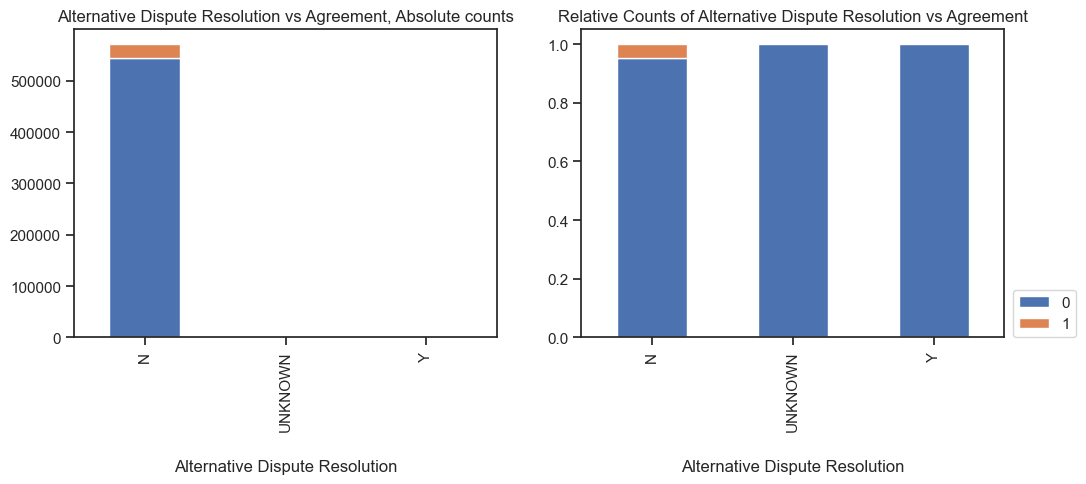

In [607]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Alternative Dispute Resolution'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Alternative Dispute Resolution vs Agreement, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Alternative Dispute Resolution", labelpad=20)

cat1 = 'Alternative Dispute Resolution'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Alternative Dispute Resolution vs Agreement")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Alternative Dispute Resolution",labelpad=20)

plt.show()

In [608]:
employees_train.groupby("Agreement Reached")["Alternative Dispute Resolution"].describe()

count unique top    freq
Agreement Reached                           
0                  547239      3   N  544625
1                   26787      1   N   26787

**`Attorney/Representative`**

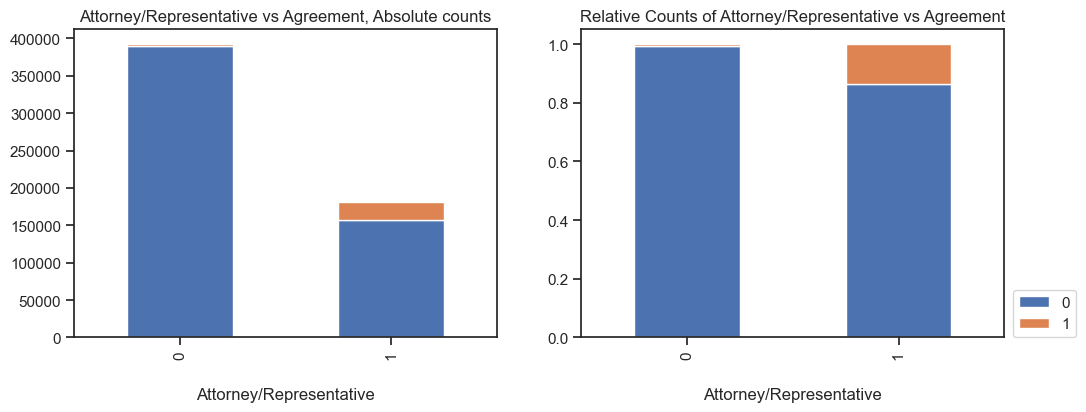

In [609]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Attorney/Representative'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Attorney/Representative vs Agreement, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Attorney/Representative", labelpad=20)

cat1 = 'Attorney/Representative'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Attorney/Representative vs Agreement")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Attorney/Representative",labelpad=20)

plt.show()

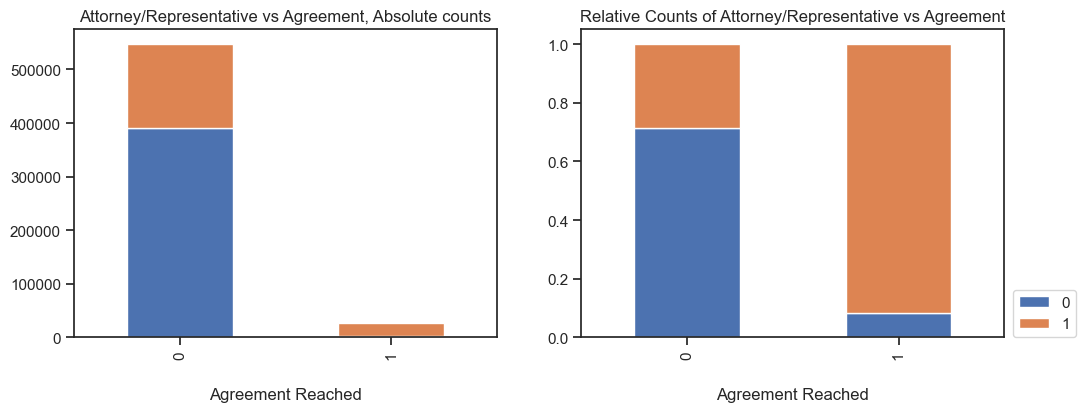

In [610]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Attorney/Representative'
cat1 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Attorney/Representative vs Agreement, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Agreement Reached", labelpad=20)

cat2 = 'Attorney/Representative'
cat1 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Attorney/Representative vs Agreement")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Agreement Reached",labelpad=20)

plt.show()

In [611]:
employees_train.groupby("Agreement Reached")["Attorney/Representative"].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.97,0.99])

count      mean       std  min   5%  10%  25%  50%  75%  \
Agreement Reached                                                               
0                  547239.0  0.287255  0.452482  0.0  0.0  0.0  0.0  0.0  1.0   
1                   26787.0  0.916041  0.277331  0.0  0.0  1.0  1.0  1.0  1.0   

                   90%  97%  99%  max  
Agreement Reached                      
0                  1.0  1.0  1.0  1.0  
1                  1.0  1.0  1.0  1.0

* Less than 10% of the claims with a positive agreement reached had an attorney or a representative.

**`Average Weekly Wage`**

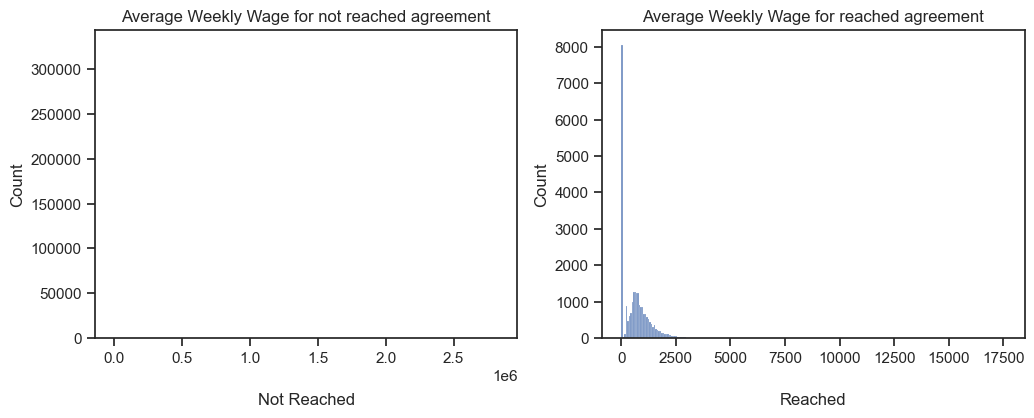

In [612]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(data=employees_train[employees_train["Agreement Reached"] == 0], x="Average Weekly Wage", ax=axes[0])
axes[0].set_title('Average Weekly Wage for not reached agreement')
axes[0].set_xlabel("Not Reached", labelpad=20)

sns.histplot(data=employees_train[employees_train["Agreement Reached"] == 1], x="Average Weekly Wage", ax=axes[1])
axes[1].set_title("Average Weekly Wage for reached agreement")
axes[1].set_xlabel("Reached",labelpad=20)

plt.show()

In [613]:
employees_train.groupby("Agreement Reached")["Average Weekly Wage"].describe(percentiles=[0.05,0.1,0.25,0.4,0.5,0.6,0.75,0.9,0.97,0.99])

count        mean          std  min   5%  10%  25%  \
Agreement Reached                                                          
0                  519940.0  483.528252  6238.423711  0.0  0.0  0.0  0.0   
1                   25435.0  645.630563   648.222024  0.0  0.0  0.0  0.0   

                       40%    50%      60%      75%       90%       97%  \
Agreement Reached                                                         
0                    0.000    0.0    0.000  826.475  1555.851  2296.803   
1                  407.794  600.0  721.458  996.805  1467.186  2079.483   

                        99%        max  
Agreement Reached                       
0                  2978.624  2828079.0  
1                  2615.250    17600.0

* For positive agreement reached, the distributiom of average weekly wage doesn't have as much AWW nulll, and less extreme values

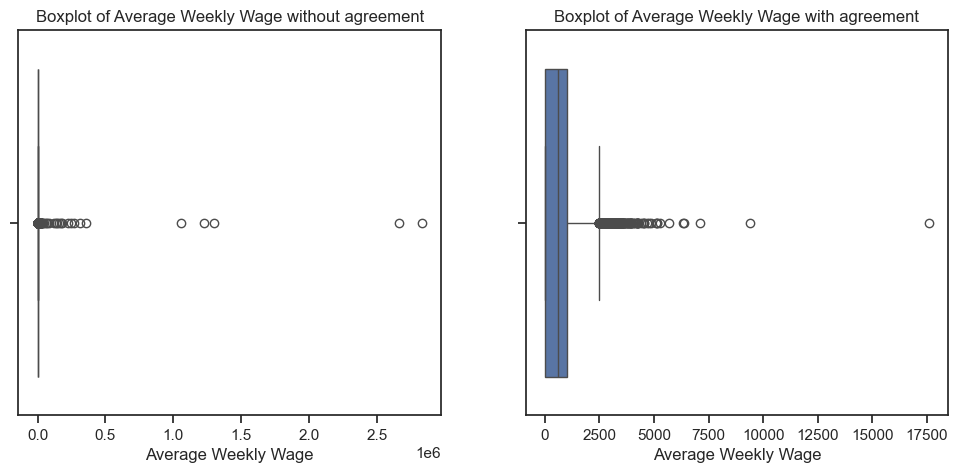

In [614]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.boxplot(data=employees_train[employees_train["Agreement Reached"] == 0], x="Average Weekly Wage", ax=axes[0])
axes[0].set_title("Boxplot of Average Weekly Wage without agreement")

sns.boxplot(data=employees_train[employees_train["Agreement Reached"] == 1], x="Average Weekly Wage", ax=axes[1])
axes[1].set_title("Boxplot of Average Weekly Wage with agreement")


plt.show()

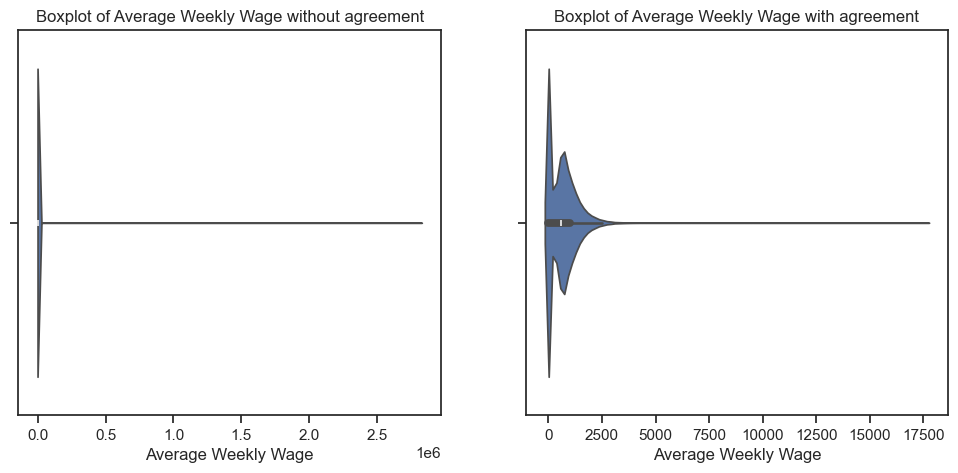

In [615]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.violinplot(data=employees_train[employees_train["Agreement Reached"] == 0], x="Average Weekly Wage", ax=axes[0])
axes[0].set_title("Boxplot of Average Weekly Wage without agreement")

sns.violinplot(data=employees_train[employees_train["Agreement Reached"] == 1], x="Average Weekly Wage", ax=axes[1])
axes[1].set_title("Boxplot of Average Weekly Wage with agreement")


plt.show()

In [616]:
employees_train.groupby(["Agreement Reached","Attorney/Representative"])["Average Weekly Wage"].describe(percentiles=[0.1,0.15,0.25,0.4,0.5,0.75,0.8,0.9,0.95,0.99])

count         mean          std  \
Agreement Reached Attorney/Representative                                       
0                 0                        370524.0   247.061115  5599.175709   
                  1                        149416.0  1069.922946  7563.127670   
1                 0                          2132.0   311.576041   589.896165   
                  1                         23303.0   676.193334   644.724538   

                                           min  10%  15%       25%    40%  \
Agreement Reached Attorney/Representative                                   
0                 0                        0.0  0.0  0.0    0.0000    0.0   
                  1                        0.0  0.0  0.0  311.1625  778.8   
1                 0                        0.0  0.0  0.0    0.0000    0.0   
                  1                        0.0  0.0  0.0    0.0000  480.0   

                                             50%        75%       80%  \
Agreement Reached Attorney/Representative                               
0                 0                          0.0     0.0000   250.000   
                  1                        986.1  1553.5875  1714.000   
1                 0                          0.0   500.2575   646.216   
                  1                        623.4  1009.0500  1129.606   

                                                90%        95%        99%  \
Agreement Reached Attorney/Representative                                   
0                 0                         949.797  1411.0000  2453.2655   
                  1                        2115.075  2508.2425  3556.6550   
1                 0                        1091.178  1553.8205  2523.2665   
                  1                        1491.300  1830.0730  2615.7890   

                                                  max  
Agreement Reached Attorney/Representative              
0                 0                        2659398.00  
                  1                        2828079.00  
1                 0                           4870.89  
                  1                          17600.00

* The workers whose claims without agreement and without attorney/representative, have at least 75% with an average weekly wage, compared to the ones that had an attorney where less than 25% have a null average weekly wage

* The workers whose claims have a positive agreement without attorney have at least 50% with a null AWW, however this is the only subcategory where the AWW doesn't have extreme values. Comparing to the positive agreements that have an attorney, the AWW median, mean seems higher compared to the last one

* By analysing the percentiles, the first category (AR - 0, A/R - 0) has the majority of the AWW null, the 99th percentile is 2453 and has extreme values, above 2 million dollares. The second category (AR - 0, A/R - 1) is the category with lowest % of workers with null AWW, less than 25%, and the highest values for each percentile here represented, with the median at 986 dollares, the 99th at 3556 and also extreme values. This might suggest that workers that had an attorney but didn't get an agreement were maybe in industries that payed more, but with less possibility to get an agreement outside the WCB. The third category (AR - 1 , A/R - 0), were claims that had an agreement outside the WCB but didn't have an attorney presented. At least 50% of these workers had a null AWW, and the other half had values from 500.26 to 4870, the only category without extreme values, but with the lowest number of claims. The last category (AR - 1, A/T - 1) has the higest mean, with at least 25% with null AWW, a 99th percentil of 2615.80 and extreme values of 17 600.

* In general, the workers with positive A/R tend to have higer AWW compared to the ones with null AWW

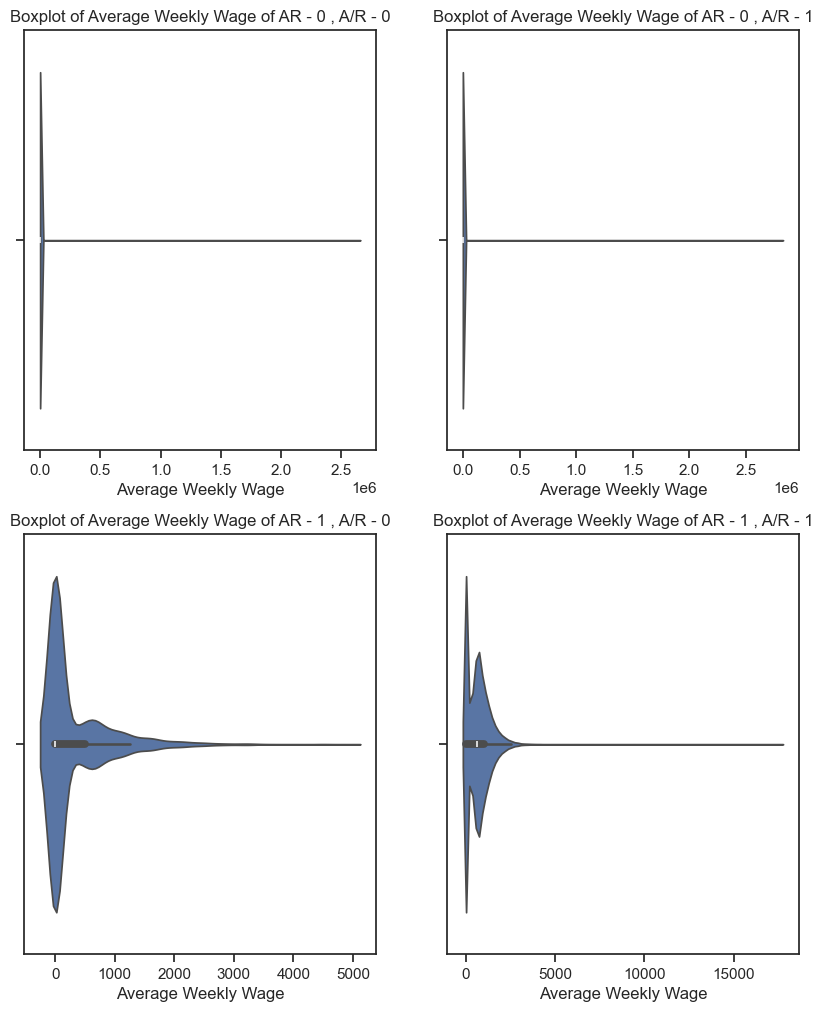

In [617]:
fig, axes = plt.subplots(2,2, figsize=(10, 12))

sns.violinplot(data=employees_train[(employees_train["Agreement Reached"] == 0) & (employees_train["Attorney/Representative"] == 0)], x="Average Weekly Wage", ax=axes[0,0])
axes[0,0].set_title("Boxplot of Average Weekly Wage of AR - 0 , A/R - 0")

sns.violinplot(data=employees_train[(employees_train["Agreement Reached"] == 0) & (employees_train["Attorney/Representative"] == 1)], x="Average Weekly Wage", ax=axes[0,1])
axes[0,1].set_title("Boxplot of Average Weekly Wage of AR - 0 , A/R - 1")

sns.violinplot(data=employees_train[(employees_train["Agreement Reached"] == 1) & (employees_train["Attorney/Representative"] == 0)], x="Average Weekly Wage", ax=axes[1,0])
axes[1,0].set_title("Boxplot of Average Weekly Wage of AR - 1 , A/R - 0")

sns.violinplot(data=employees_train[(employees_train["Agreement Reached"] == 1) & (employees_train["Attorney/Representative"] == 1)], x="Average Weekly Wage", ax=axes[1,1])
axes[1,1].set_title("Boxplot of Average Weekly Wage of AR - 1 , A/R - 1")



plt.show()

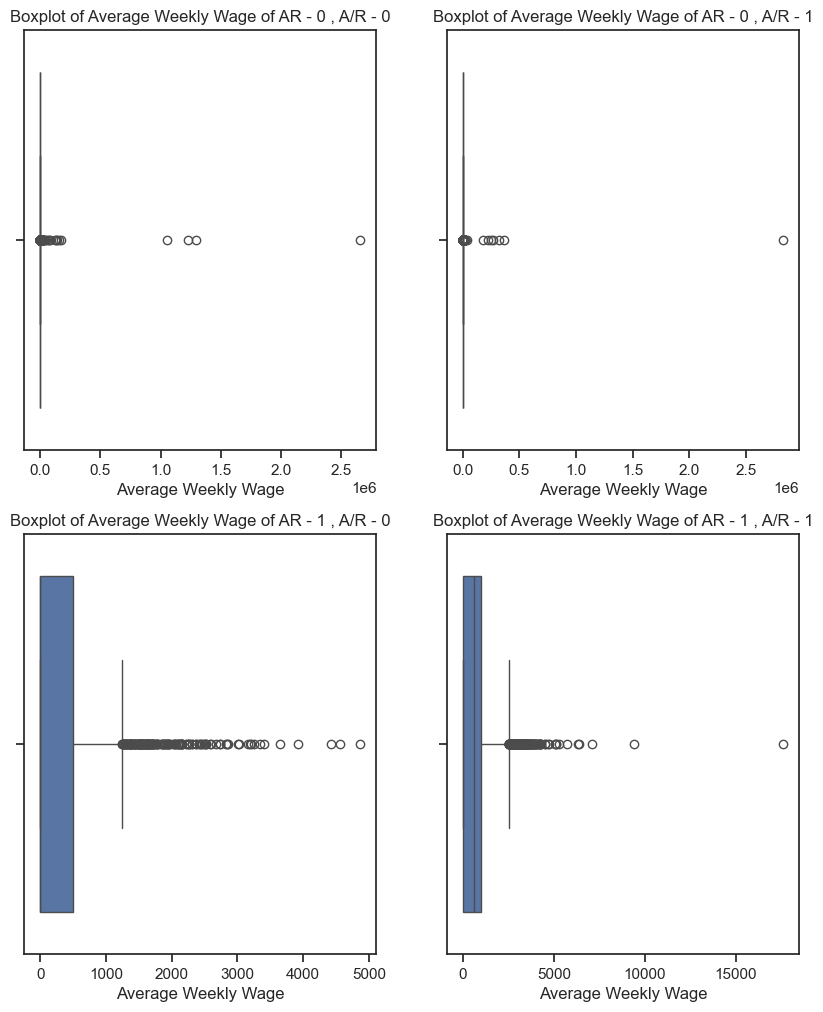

In [618]:
fig, axes = plt.subplots(2,2, figsize=(10, 12))

sns.boxplot(data=employees_train[(employees_train["Agreement Reached"] == 0) & (employees_train["Attorney/Representative"] == 0)], x="Average Weekly Wage", ax=axes[0,0])
axes[0,0].set_title("Boxplot of Average Weekly Wage of AR - 0 , A/R - 0")

sns.boxplot(data=employees_train[(employees_train["Agreement Reached"] == 0) & (employees_train["Attorney/Representative"] == 1)], x="Average Weekly Wage", ax=axes[0,1])
axes[0,1].set_title("Boxplot of Average Weekly Wage of AR - 0 , A/R - 1")

sns.boxplot(data=employees_train[(employees_train["Agreement Reached"] == 1) & (employees_train["Attorney/Representative"] == 0)], x="Average Weekly Wage", ax=axes[1,0])
axes[1,0].set_title("Boxplot of Average Weekly Wage of AR - 1 , A/R - 0")

sns.boxplot(data=employees_train[(employees_train["Agreement Reached"] == 1) & (employees_train["Attorney/Representative"] == 1)], x="Average Weekly Wage", ax=axes[1,1])
axes[1,1].set_title("Boxplot of Average Weekly Wage of AR - 1 , A/R - 1")



plt.show()

**`Birth  Year`**

In [619]:
employees_train.groupby("Agreement Reached")["Birth Year"].describe()

count         mean         std  min     25%     50%  \
Agreement Reached                                                           
0                  519495.0  1889.727947  408.496395  0.0  1965.0  1977.0   
1                   25453.0  1826.347071   520.96023  0.0  1962.0  1972.0   

                      75%     max  
Agreement Reached                  
0                  1989.0  2018.0  
1                  1985.0  2006.0

**`C-3 Date`**

In [620]:
employees_train['has_c3_date'] = employees_train['C-3 Date'].notnull().astype(int)
frq_ar_c3 = employees_train.groupby("Agreement Reached")["has_c3_date"].value_counts()
prp_ar_c3 = employees_train.groupby("Agreement Reached")["has_c3_date"].value_counts(normalize=True)*100
ar_c3 = pd.DataFrame({'Frequency': frq_ar_c3,'Proportion': prp_ar_c3}).sort_index(level=['Agreement Reached', 'has_c3_date'], ascending=[True, False])
ar_c3

Frequency  Proportion
Agreement Reached has_c3_date                       
0                 1               168517   30.794041
                  0               378722   69.205959
1                 1                18728   69.914511
                  0                 8059   30.085489

* It seems that claims without agreement have 70%  without C-3 Date, which means, almost 70% without agreement doesn't send the Employee Claim Form, that is exactly the contrary situation of the claims with a positive agreement reached, where almost 70% did send the C-3 document.

In [621]:
employees_train.groupby(["Agreement Reached","Attorney/Representative","has_c3_date"])["Average Weekly Wage"].describe(percentiles=[0.1,0.15,0.25,0.4,0.5,0.75,0.8,0.9,0.95,0.99])

count         mean  \
Agreement Reached Attorney/Representative has_c3_date                          
0                 0                       0            331107.0   227.393583   
                                          1             39417.0   412.270479   
                  1                       0             28670.0   967.391637   
                                          1            120746.0  1094.268040   
1                 0                       0              1749.0   292.175729   
                                          1               383.0   400.169112   
                  1                       0              5881.0   517.588978   
                                          1             17422.0   729.732090   

                                                               std  min  10%  \
Agreement Reached Attorney/Representative has_c3_date                          
0                 0                       0            5913.008862  0.0  0.0   
                                          1             985.673863  0.0  0.0   
                  1                       0            2405.358146  0.0  0.0   
                                          1            8331.026576  0.0  0.0   
1                 0                       0             575.000312  0.0  0.0   
                                          1             647.068611  0.0  0.0   
                  1                       0             642.644982  0.0  0.0   
                                          1             636.583587  0.0  0.0   

                                                       15%    25%      40%  \
Agreement Reached Attorney/Representative has_c3_date                        
0                 0                       0            0.0    0.0    0.000   
                                          1            0.0    0.0    0.000   
                  1                       0            0.0  325.0  727.076   
                                          1            0.0  300.0  795.060   
1                 0                       0            0.0    0.0    0.000   
                                          1            0.0    0.0    0.000   
                  1                       0            0.0    0.0    0.000   
                                          1            0.0  250.0  550.200   

                                                            50%        75%  \
Agreement Reached Attorney/Representative has_c3_date                        
0                 0                       0               0.000     0.0000   
                                          1               0.000   717.9700   
                  1                       0             900.825  1414.6175   
                                          1            1002.090  1597.9950   
1                 0                       0               0.000   458.9900   
                                          1               0.000   632.2950   
                  1                       0             315.210   878.8600   
                                          1             667.990  1050.9850   

                                                            80%       90%  \
Agreement Reached Attorney/Representative has_c3_date                       
0                 0                       0               0.000   872.900   
                                          1             899.878  1382.122   
                  1                       0            1535.842  1892.503   
                                          1            1755.250  2162.000   
1                 0                       0             621.748  1043.212   
                                          1             800.000  1259.080   
                  1                       0            1003.330  1360.000   
                                          1            1174.818  1519.457   

                                                             95%        99%  \
Agreement Reached Attorney/Representative ha

In [622]:
employees_train.drop(columns="has_c3_date", inplace=True)

**`Carrier Name`**

In [623]:
frq_ar_cn = employees_train.groupby("Carrier Name")["Agreement Reached"].value_counts()
prp_ar_cn = employees_train.groupby("Carrier Name")["Agreement Reached"].value_counts(normalize=True)*100
ar_cn = pd.DataFrame({'Frequency': frq_ar_cn,'Proportion': prp_ar_cn}).sort_index(level=['Carrier Name', 'Agreement Reached'], ascending=[True, True])

In [624]:
ar_cn

Frequency  Proportion
Carrier Name                  Agreement Reached                       
A I U INSURANCE COMPANY       0                      10536   95.452075
                              1                        502    4.547925
ABF FREIGHT SYSTEM, INC.      0                        102     79.6875
                              1                         26     20.3125
ABF FREIGHT SYSTEMS INC DEL   0                         10       100.0
...                                                    ...         ...
ZURICH AMERICAN INSURANCE     1                          1    2.439024
ZURICH AMERICAN INSURANCE CO  0                       2751   96.121593
                              1                        111    3.878407
ZURICH AMERICAN INSURANCE CO. 0                       1981   95.746738
                              1                         88    4.253262

[2682 rows x 2 columns]

In [625]:
ar_cn_filtered = ar_cn.loc[(slice(None), 1), :]
ar_cn_sorted = ar_cn_filtered.sort_values(by='Proportion', ascending=False)
ar_cn_sorted.head(40)

Frequency  Proportion
Carrier Name                   Agreement Reached                       
GREENE COUNTY                  1                          1       100.0
AIRBORNE EXPRESS, INC.         1                          1       100.0
UPSTATE NIAGA COOPERATIVES INC 1                          5       100.0
CAROLINA FREIGHT CARRIERS      1                         11       100.0
L T V STEEL COMPANY,  INC.     1                          1       100.0
MIDDLETOWN CITY OF             1                          5       100.0
NY BUS OPERATORS COMP TRUST    1                          1       100.0
GREAT ATLANTIC & PACIFIC TEA   1                          1       100.0
LYNCOURT UNION FREE SCHOOL     1                          4       100.0
EXCELSIOR INSURANCE CO         1                          2       100.0
HEALTHSTAR NETWORK INC.        1                          5       100.0
HEALTHSTAR NETWORK INC         1                          5       100.0
STEUBEN COUNTY SELF INS PLAN   1                          1       100.0
NYS WCB (LIABLE CARRIER IS 06) 1                          3       100.0
GOLUB CORP                     1                          1       100.0
UPSTATE NIAGARA COOPERATIVE    1                          8   88.888889
ERIE COUNTY MEDICAL CENTER     1                          4        80.0
CALEDONIA MUMFORD CENTRAL      1                          4        80.0
DPWN HOLDINGS (USA) INC.       1                         17   77.272727
CAPITAL DISTRICT TRANS AUTH    1                          3        75.0
GUIDEONE INSURANCE COMPANY     1                         10   66.666667
BETHLEHEM STEEL CORPORATION    1                          4   66.666667
ILLINOIS NATIONAL INS CO       1                         64        64.0
YORK CSD                       1                          6        60.0
DE RUYTER CENTRAL              1                          3        60.0
ACE FIRE UNDERWRITERS          1                          4   57.142857
BELLEVILLE HENDERSON CENTRAL   1                          7   53.846154
WAUSAU BUSINESS INSURANCE CO   1                          1        50.0
CLIFFSTAR CORPORATION          1                          1        50.0
EAST ROCHESTER UNION FREE      1                          1        50.0
HAMMONDSPORT CSD               1                          1        50.0
TULLY CENTRAL SCHOOL DISTRICT  1                          3        50.0
TARGET CORPORATION             1                          4        50.0
LE ROY CENTRAL SCHOOL DISTRICT 1                          2        50.0
ERIE COUNTY MEDICAL CTR. CORP  1                          1        50.0
SACKETTS HARBOR CENTRAL        1                          1        50.0
SENECA INSURANCE COMPANY INC   1                         14   48.275862
LIBERTY MUTUAL FIRE INS CO     1                        635    47.70849
CITY OF MIDDLETOWN             1                          3   42.857143
NATIONWIDE MUTUAL FIRE INS CO  1                          7   41.176471

**`Carrier Type`**

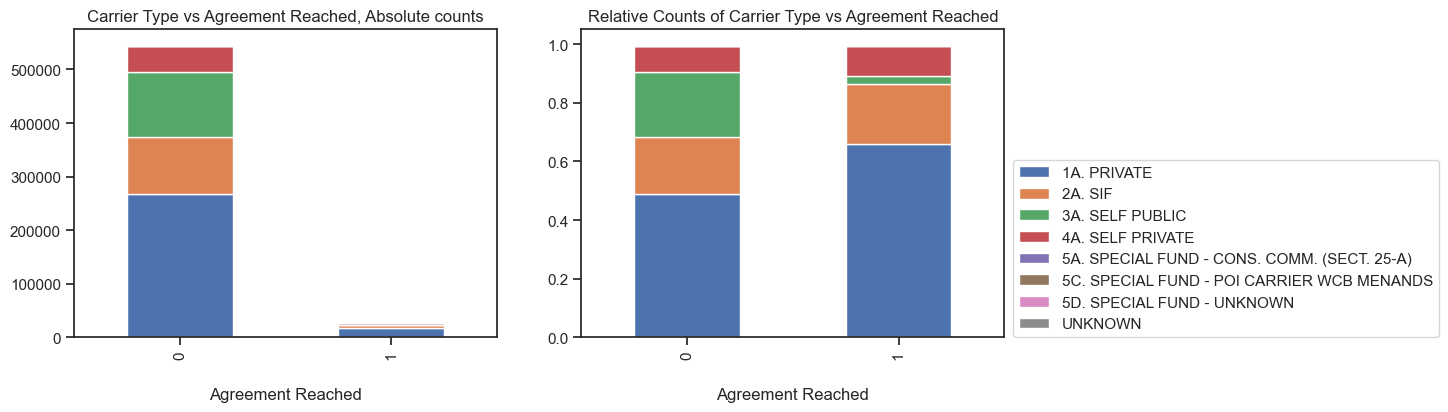

In [626]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'Carrier Type'
cat1 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Carrier Type vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Agreement Reached", labelpad=20)

cat2 = 'Carrier Type'
cat1 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Carrier Type vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Agreement Reached",labelpad=20)

plt.show()

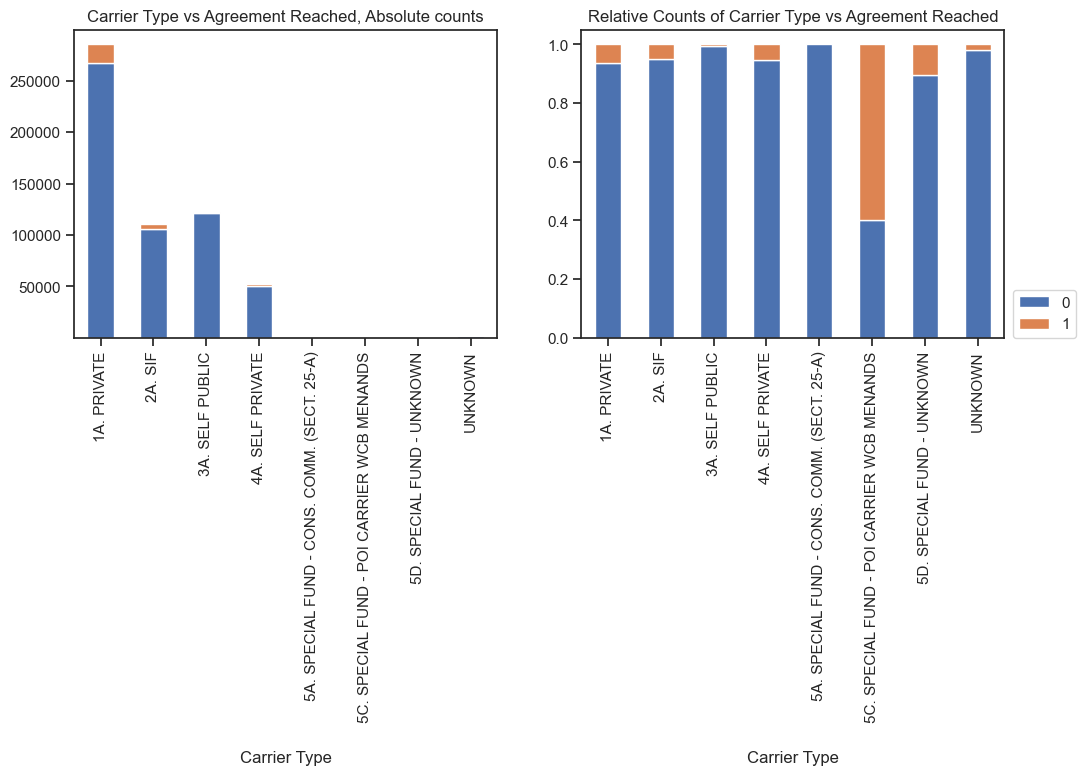

In [627]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Carrier Type'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Carrier Type vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Carrier Type", labelpad=20)

cat1 = 'Carrier Type'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Carrier Type vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Carrier Type",labelpad=20)

plt.show()

**`Claim Injury Type`**

In [628]:
frq_two_targets = employees_train.groupby("Claim Injury Type")["Agreement Reached"].value_counts()
prp_two_targets = employees_train.groupby("Claim Injury Type")["Agreement Reached"].value_counts(normalize=True)*100
two_targets = pd.DataFrame({'Frequency': frq_two_targets,'Proportion': prp_two_targets}).sort_index(level=['Claim Injury Type', 'Agreement Reached'], ascending=[True, False])
two_targets

Frequency  Proportion
Claim Injury Type Agreement Reached                       
1. CANCELLED      1                          4    0.032059
                  0                      12473   99.967941
2. NON-COMP       0                     291078       100.0
3. MED ONLY       0                      68906       100.0
4. TEMPORARY      1                      26017    17.51904
                  0                     122490    82.48096
5. PPD SCH LOSS   1                        318    0.658658
                  0                      47962   99.341342
6. PPD NSL        1                        387    9.190216
                  0                       3824   90.809784
7. PTD            1                         12   12.371134
                  0                         85   87.628866
8. DEATH          1                         49   10.425532
                  0                        421   89.574468

**`County of Injury`**

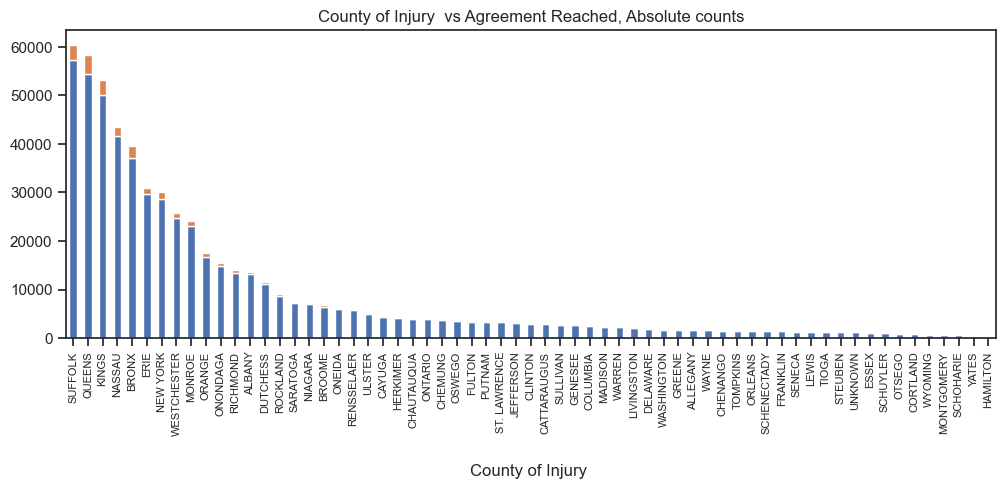

In [629]:
fig, axes = plt.subplots(1,1, figsize=(12,4))

cat1 = 'County of Injury'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df = catpc_df.loc[employees_train["County of Injury"].value_counts(ascending=False).index]
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('County of Injury  vs Agreement Reached, Absolute counts')
axes.legend([], frameon=False) # hide legend on right subplot
axes.set_xlabel("County of Injury ", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

**`COVID-19 Indicator`**

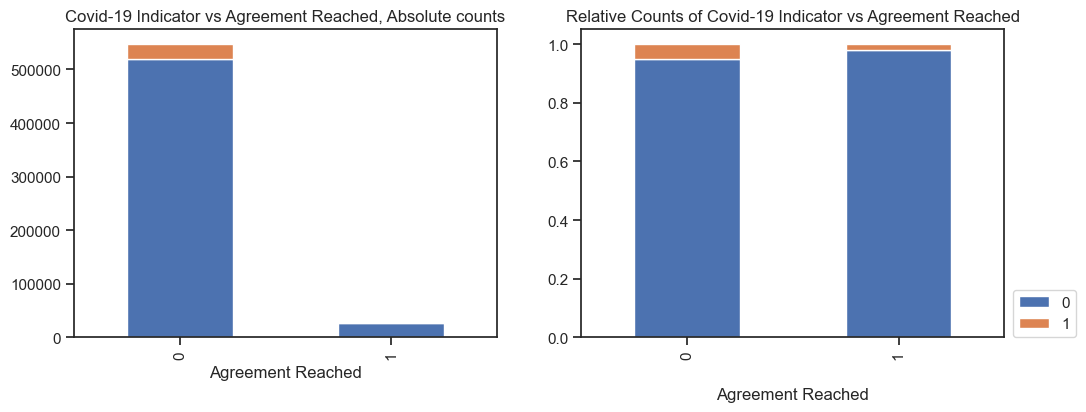

In [630]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'COVID-19 Indicator'
cat1 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Covid-19 Indicator vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
#axes[0].set_xlabel("Claim Injury Type", labelpad=20)

cat2 = 'COVID-19 Indicator'
cat1 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Covid-19 Indicator vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Agreement Reached",labelpad=20)

plt.show()

**`DistricT Name`**

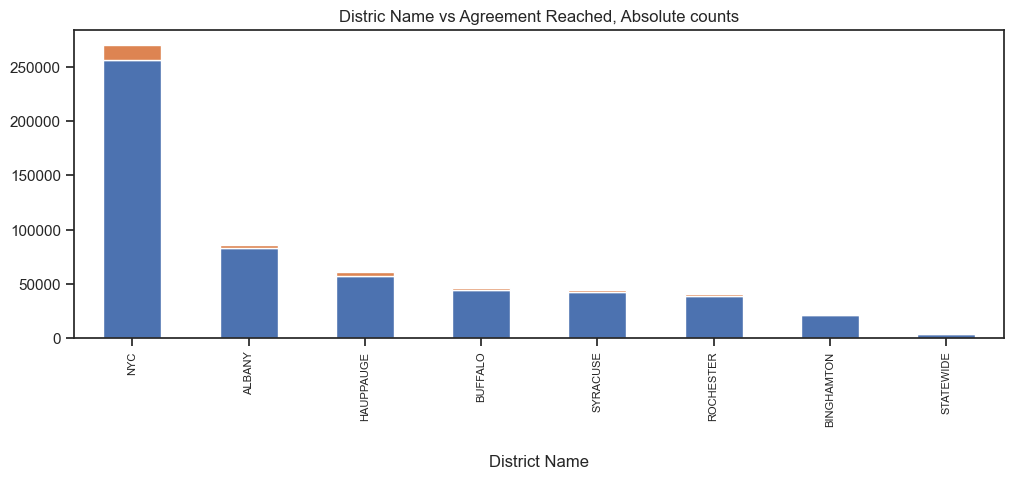

In [631]:
fig, axes = plt.subplots(1,1, figsize=(12,4))

cat1 = 'District Name'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df = catpc_df.loc[employees_train["District Name"].value_counts(ascending=False).index]
catpc_df.plot.bar(stacked=True, ax=axes)
axes.set_title('Distric Name vs Agreement Reached, Absolute counts')
axes.legend([], frameon=False) # hide legend on right subplot
axes.set_xlabel("District Name", labelpad=20)

plt.xticks(fontsize=8)
plt.show()

**`First Hearing Date`**

In [632]:
employees_train['has_fhd_date'] = employees_train['First Hearing Date'].notnull().astype(int)

In [633]:
frq_ar_fhd = employees_train.groupby("Agreement Reached")["has_fhd_date"].value_counts()
prp_ar_fhd = employees_train.groupby("Agreement Reached")["has_fhd_date"].value_counts(normalize=True)*100
ar_fhd = pd.DataFrame({'Frequency': frq_ar_fhd,'Proportion': prp_ar_fhd}).sort_index(level=['Agreement Reached', 'has_fhd_date'], ascending=[True, False])
ar_fhd

Frequency  Proportion
Agreement Reached has_fhd_date                       
0                 1                130423   23.832914
                  0                416816   76.167086
1                 1                 20375   76.063016
                  0                  6412   23.936984

* There's a cleary difference here, 76% of the claims with null agreement didnt have the first hearing date, compared to the 76% of the claims with positive agreement that had a first hearing.

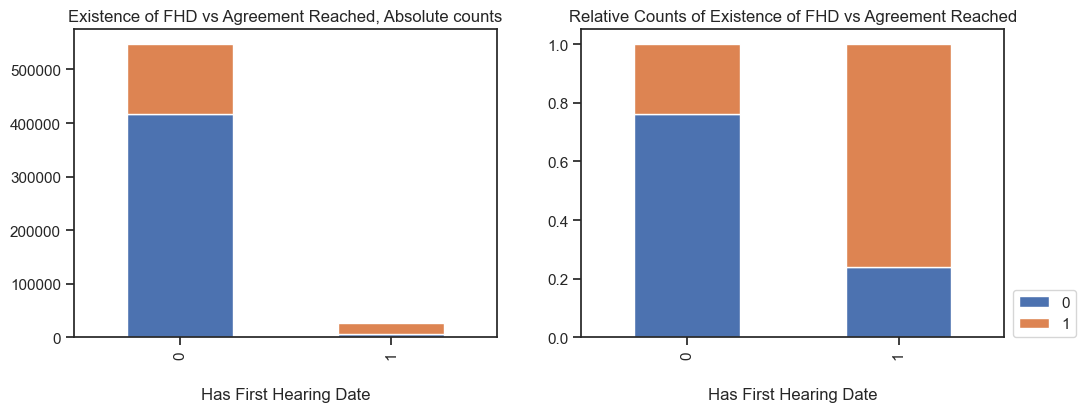

In [634]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat2 = 'has_fhd_date'
cat1 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Existence of FHD vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Has First Hearing Date", labelpad=20)

cat2 = 'has_fhd_date'
cat1 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Existence of FHD vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Has First Hearing Date",labelpad=20)

plt.show()

In [635]:
employees_train.drop(columns="has_fhd_date", inplace=True)

**`Gender`**

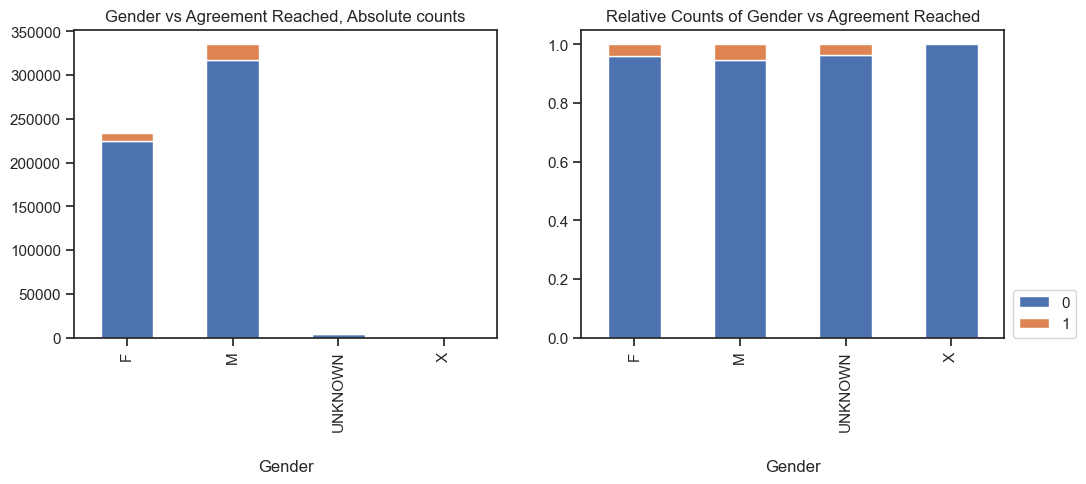

In [636]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'Gender'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Gender vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Gender", labelpad=20)

cat1 = 'Gender'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Gender vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Gender",labelpad=20)

plt.show()

In [637]:
frq_ar_gender = employees_train.groupby("Agreement Reached")["Gender"].value_counts()
prp_ar_gender = employees_train.groupby("Agreement Reached")["Gender"].value_counts(normalize=True)*100
ar_gender = pd.DataFrame({'Frequency': frq_ar_gender,'Proportion': prp_ar_gender}).sort_index(level=['Agreement Reached', 'Gender'], ascending=[True, False])
ar_gender

Frequency  Proportion
Agreement Reached Gender                        
0                 X               46    0.008406
                  UNKNOWN       4545    0.830533
                  M           317697   58.054525
                  F           224951   41.106537
1                 UNKNOWN        166    0.619704
                  M            17521   65.408594
                  F             9100   33.971703

**`IME-4 Count`**

In [638]:
employees_train['has_ime'] = employees_train['IME-4 Count'].notnull().astype(int)
frq_ar_ime = employees_train.groupby("Agreement Reached")["has_ime"].value_counts()
prp_ar_ime = employees_train.groupby("Agreement Reached")["has_ime"].value_counts(normalize=True)*100
ar_ime = pd.DataFrame({'Frequency': frq_ar_ime,'Proportion': prp_ar_ime}).sort_index(level=['Agreement Reached', 'has_ime'], ascending=[True, False])
ar_ime

Frequency  Proportion
Agreement Reached has_ime                       
0                 1           114141   20.857614
                  0           433098   79.142386
1                 1            18662   69.668123
                  0             8125   30.331877

* We can see that almost 80% of claims without agreement didn't have any IME, compared to the positive agreement claims whose almost 70% did input an IME.

<Axes: xlabel='Agreement Reached', ylabel='percent'>

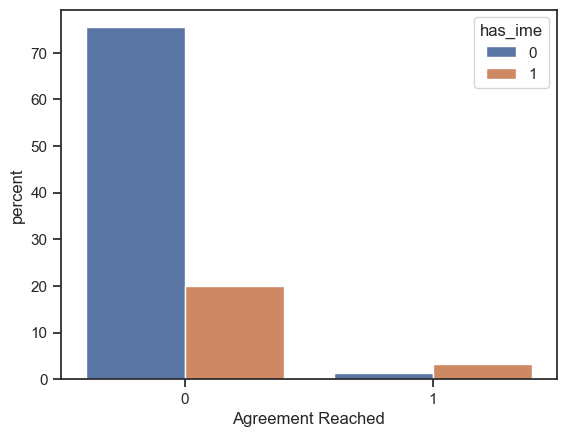

In [639]:
sns.countplot(employees_train, x="Agreement Reached", hue="has_ime", stat="percent")

In [640]:
employees_train.groupby("Agreement Reached")["IME-4 Count"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count      mean       std  min  10%  25%  50%  75%  90%  \
Agreement Reached                                                               
0                  114141.0  3.103136   2.79046  1.0  1.0  1.0  2.0  4.0  6.0   
1                   18662.0  3.844658  2.998139  1.0  1.0  2.0  3.0  5.0  8.0   

                    95%   99%   max  
Agreement Reached                    
0                   9.0  14.0  73.0  
1                  10.0  14.0  33.0

In [641]:
employees_train.drop(columns="has_ime", inplace=True)

**`Industry Code`**

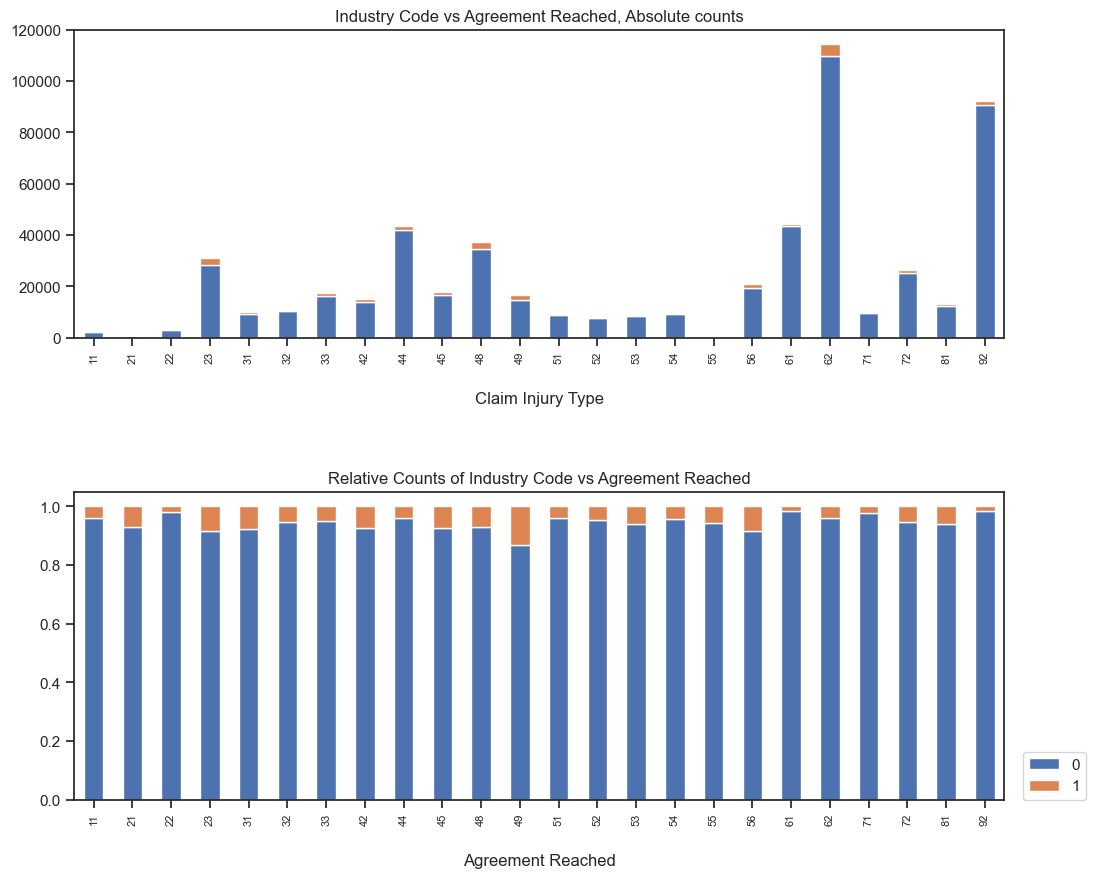

In [642]:
fig, axes = plt.subplots(2,1, figsize=(12,10))

cat1 = 'Industry Code'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Industry Code vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'Industry Code'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Industry Code vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Agreement Reached",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`Medical Fee Region`**

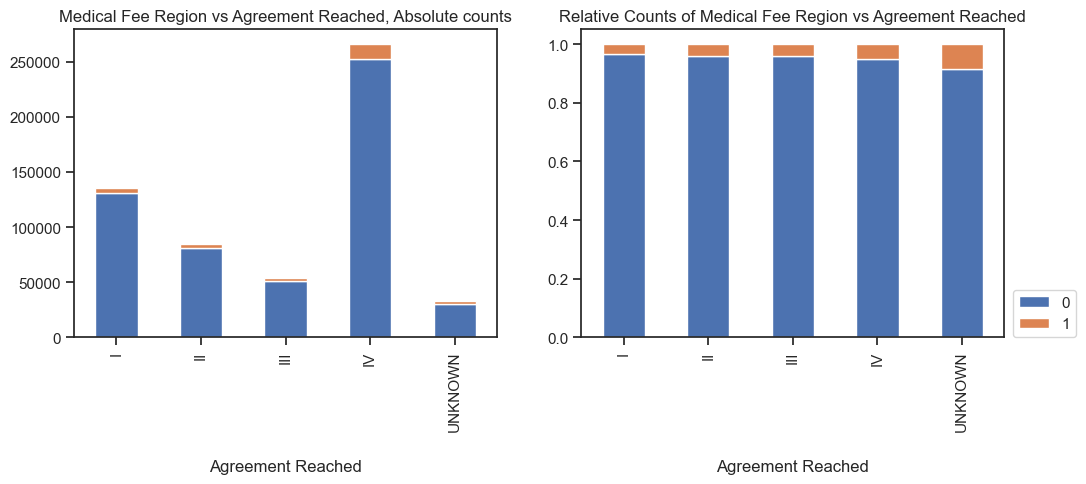

In [643]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = "Medical Fee Region"
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Medical Fee Region vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Agreement Reached", labelpad=20)

cat1 = 'Medical Fee Region'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of Medical Fee Region vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Agreement Reached",labelpad=20)

plt.show()

In [644]:
employees_train.groupby("Agreement Reached")["Medical Fee Region"].describe()

count unique top    freq
Agreement Reached                           
0                  547239      5  IV  252144
1                   26787      5  IV   13837

In [645]:
frq_ar_mfr = employees_train.groupby("Agreement Reached")["Medical Fee Region"].value_counts()
prp_ar_mfr = employees_train.groupby("Agreement Reached")["Medical Fee Region"].value_counts(normalize=True)*100
ar_mfr = pd.DataFrame({'Frequency': frq_ar_mfr,'Proportion': prp_ar_mfr}).sort_index(level=['Agreement Reached', 'Medical Fee Region'], ascending=[True, False])
ar_mfr

Frequency  Proportion
Agreement Reached Medical Fee Region                       
0                 UNKNOWN                 30625    5.596275
                  IV                     252144   46.075663
                  III                     51527    9.415813
                  II                      81548   14.901716
                  I                      131395   24.010533
1                 UNKNOWN                  2848   10.632023
                  IV                      13837   51.655654
                  III                      2127    7.940419
                  II                       3485   13.010042
                  I                        4490   16.761862

**`WCIO Cause of Injury Code`**

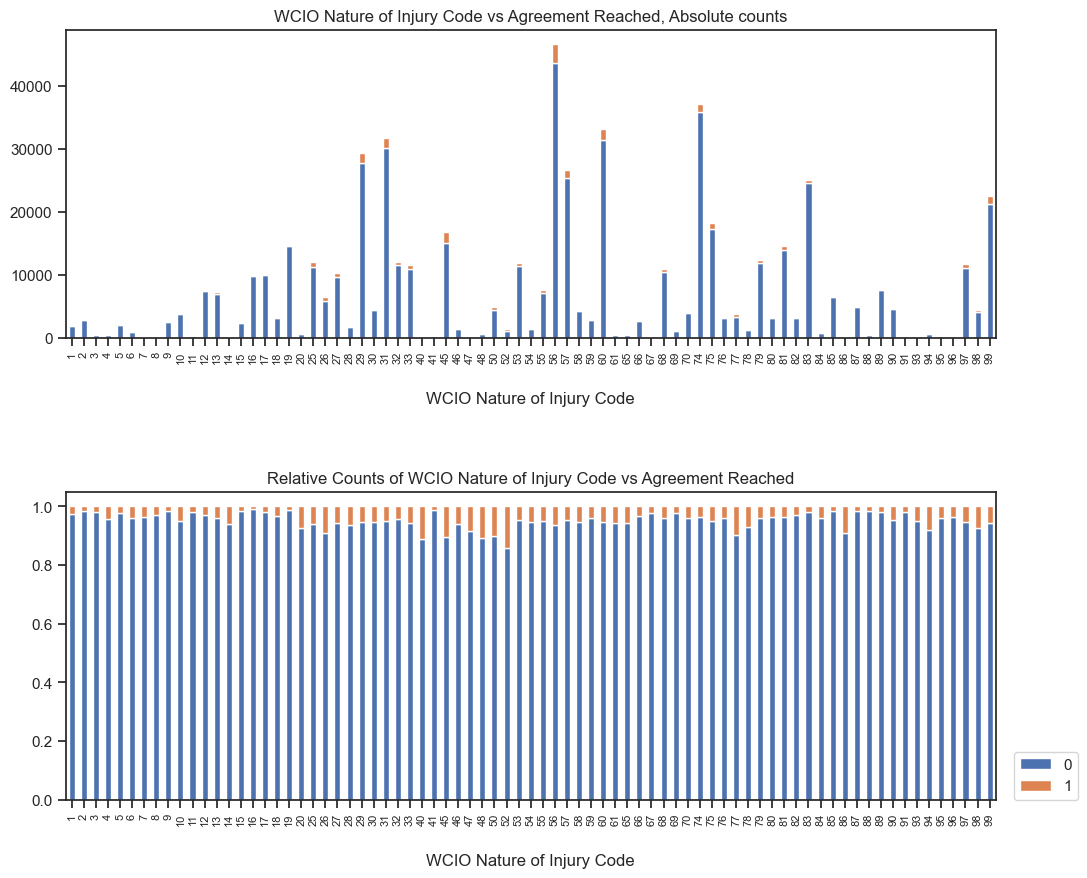

In [646]:
fig, axes = plt.subplots(2,1, figsize=(12,10))

cat1 = 'WCIO Cause of Injury Code'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Nature of Injury Code vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("WCIO Nature of Injury Code", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'WCIO Cause of Injury Code'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Nature of Injury Code vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("WCIO Nature of Injury Code",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`WCIO Nature of Injury Code`**

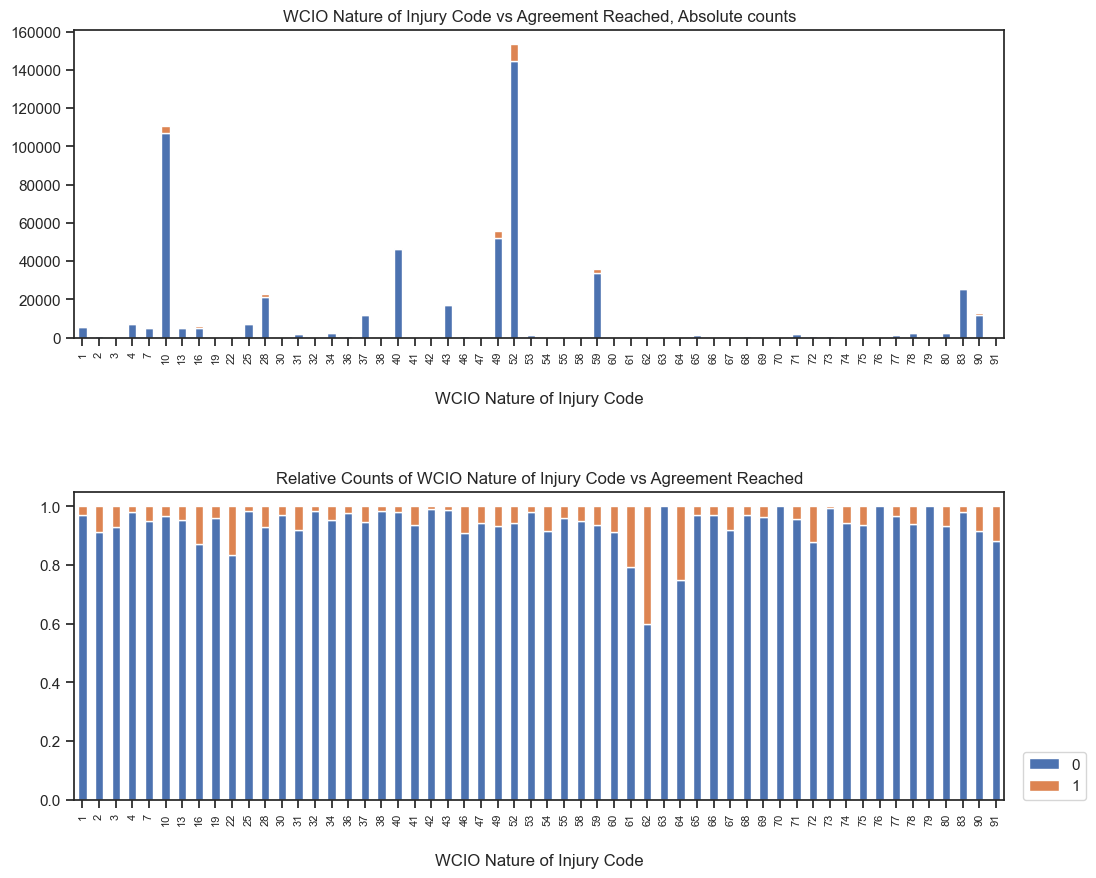

In [647]:
fig, axes = plt.subplots(2,1, figsize=(12,10))

cat1 = 'WCIO Nature of Injury Code'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Nature of Injury Code vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("WCIO Nature of Injury Code", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'WCIO Nature of Injury Code'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Nature of Injury Code vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("WCIO Nature of Injury Code",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`WCIO Part Of Body Description`**

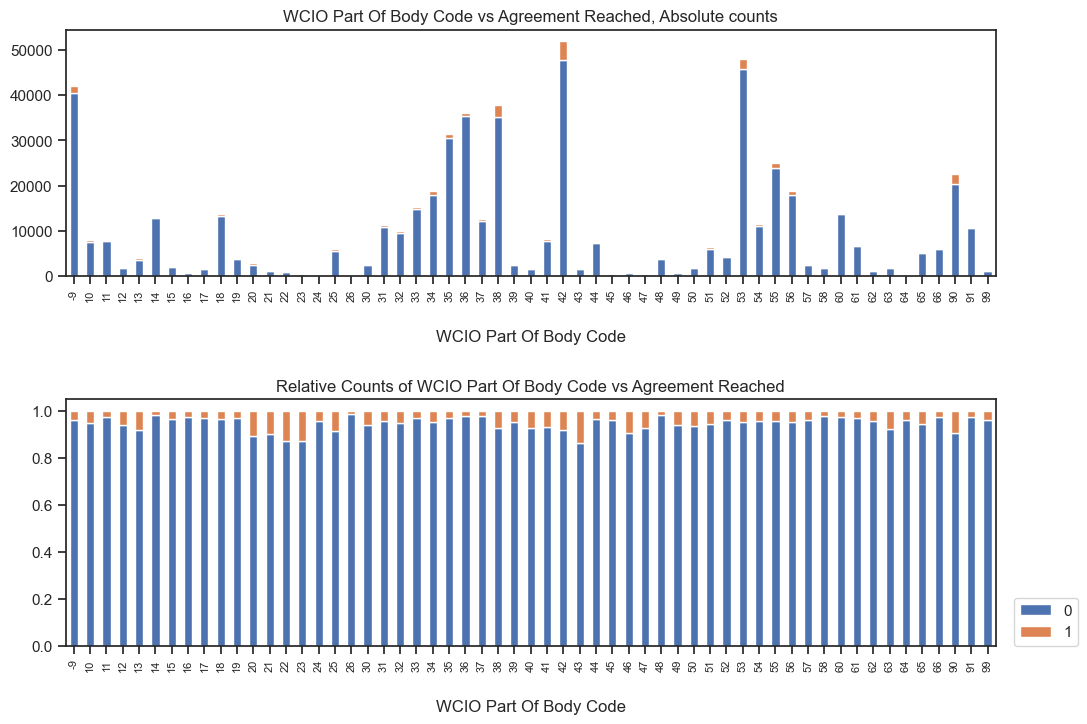

In [648]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

cat1 = 'WCIO Part Of Body Code'
cat2 = 'Agreement Reached'

catpc_df = employees_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Part Of Body Code vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("WCIO Part Of Body Code", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

cat1 = 'WCIO Part Of Body Code'
cat2 = 'Agreement Reached'

catpc_df2 = employees_train.groupby([cat1, cat2])[cat2].size() / employees_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Part Of Body Code vs Agreement Reached")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("WCIO Part Of Body Code",labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`Number of Dependents`**

In [649]:
frq_ar_nd = employees_train.groupby("Agreement Reached")["Number of Dependents"].value_counts()
prp_ar_nd = employees_train.groupby("Agreement Reached")["Number of Dependents"].value_counts(normalize=True)*100
ar_nd = pd.DataFrame({'Frequency': frq_ar_nd,'Proportion': prp_ar_nd}).sort_index(level=['Agreement Reached', 'Number of Dependents'], ascending=[True, False])
ar_nd

Frequency  Proportion
Agreement Reached Number of Dependents                       
0                 6                         78766   14.393346
                  5                         78277   14.303988
                  4                         78124   14.276029
                  3                         78490   14.342911
                  2                         77723   14.202752
                  1                         77959   14.245878
                  0                         77900   14.235097
1                 6                          3887    14.51077
                  5                          3798   14.178519
                  4                          3780   14.111323
                  3                          3809   14.219584
                  2                          3884   14.499571
                  1                          3864   14.424908
                  0                          3765   14.055325

#### Patterns

**`Speaman Correlation`**

In [650]:
numeric_features=["Age at Injury","Birth Year","IME-4 Count","Number of Dependents","Agreement Reached"]

<Axes: >

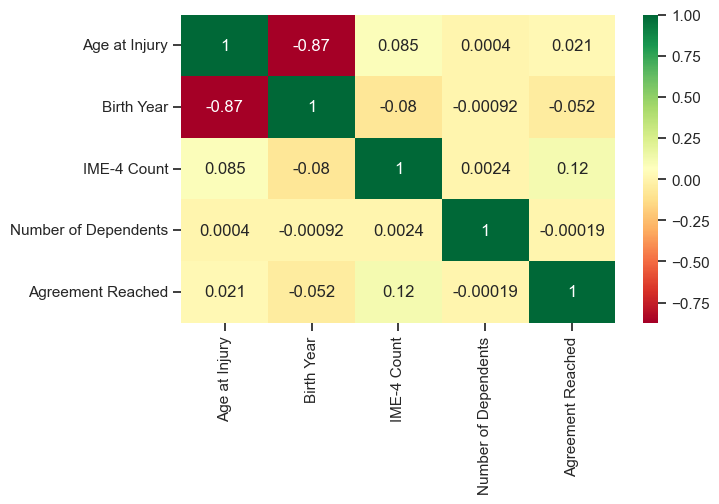

In [651]:
plt.figure(figsize=(7,4))
sns.heatmap(employees_train[numeric_features].corr(method='spearman'), annot=True, cmap="RdYlGn")

<a class="anchor" id="3">

# Data Exporting
    
</a>

In [652]:
overview(employees_train)

Column            Type  Unique  Missing  \
0                       Accident Date  datetime64[ms]    5540     3689   
1                       Age at Injury           Int64     108        0   
2      Alternative Dispute Resolution          object       3        0   
3                       Assembly Date  datetime64[ms]     897        0   
4             Attorney/Representative           Int64       2        0   
5                 Average Weekly Wage         float64  120025    28651   
6                          Birth Year           Int64     108    29078   
7                            C-2 Date  datetime64[ms]    2476    14560   
8                            C-3 Date  datetime64[ms]    1649   386781   
9                        Carrier Name          object    2046        0   
10                       Carrier Type          object       8        0   
11                  Claim Injury Type          object       8        0   
12                   County of Injury          object      63        0   
13                 COVID-19 Indicator           Int64       2        0   
14                      District Name          object       8        0   
15                 First Hearing Date  datetime64[ms]    1095   423228   
16                             Gender          object       4        0   
17                        IME-4 Count           Int64      42   441223   
18                      Industry Code          object      25     9958   
19          Industry Code Description          object      21     9958   
20                 Medical Fee Region          object       5        0   
21          WCIO Cause of Injury Code          object      78    15640   
22   WCIO Cause of Injury Description          object      75    15640   
23         WCIO Nature of Injury Code          object      57    15657   
24  WCIO Nature of Injury Description          object      57    15657   
25             WCIO Part Of Body Code          object      58    17082   
26      WCIO Part Of Body Description          object      55    17082   
27                           Zip Code  string[python]   10061    28637   
28                  Agreement Reached           Int64       2        0   
29               Number of Dependents           Int64       7        0   

    Percentage Missing  
0                 0.64  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 4.99  
6                 5.07  
7                 2.54  
8                67.38  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13                0.00  
14                0.00  
15               73.73  
16                0.00  
17               76.86  
18                1.73  
19                1.73  
20                0.00  
21                2.72  
22                2.72  
23                2.73  
24                2.73  
25                2.98  
26                2.98  
27                4.99  
28                0.00  
29                0.00

In [653]:
full_dataset = employees_train.copy()

In [654]:
full_dataset.to_csv('../Data/employees_train_eda_all.csv', index=True)


In [655]:
employees_train_no_ar = employees_train.drop(columns=["Agreement Reached"])

In [656]:
employees_train_no_ar.to_csv('../Data/employees_train_eda.csv', index=True)

In [657]:
employees_test.to_csv('../Data/employees_test_eda.csv', index=True)